# **Notebook resources**

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 5.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import scipy.stats as stats

import re
import os

In [4]:
# SET CUSTOM MODULES FOLDER
import sys
sys.path.append('/content/drive/MyDrive/Kschool_TFM/src/modules/')

# CUSTOM MODULES
#import model_funcs as mf
import viz_funcs as vf
import other_funcs as of

In [5]:
datasets_folder = '/content/drive/MyDrive/Kschool_TFM/datasets'

In [6]:
df = pd.read_csv(f'{datasets_folder}{os.sep}dataset-02-cleaning.csv')

In [7]:
df.dtypes

id                       int64
propertyType            object
title                   object
price                  float64
size                   float64
hasParking             float64
roomNumber             float64
bathNumber             float64
hasSwimmingPool        float64
hasTerrace             float64
hasGarden              float64
hasLift                float64
hasAirco               float64
isGoodCondition        float64
isNeedsRenovating      float64
isNewDevelopment       float64
energyCertification     object
heatingType             object
floor                    int64
district                object
dataset                 object
hasHeatingInfo         float64
price_m2               float64
room_bath_rate         float64
size_time_baths        float64
dtype: object

In [8]:
df['id'] = df['id'].astype(str)
df['floor'] = df['floor'].astype(str)

# **Visualization & Analysis**

## **Price distribution and skewness**

We will now look at the distribution of the dependent variable, the price, to see what we are dealing with.

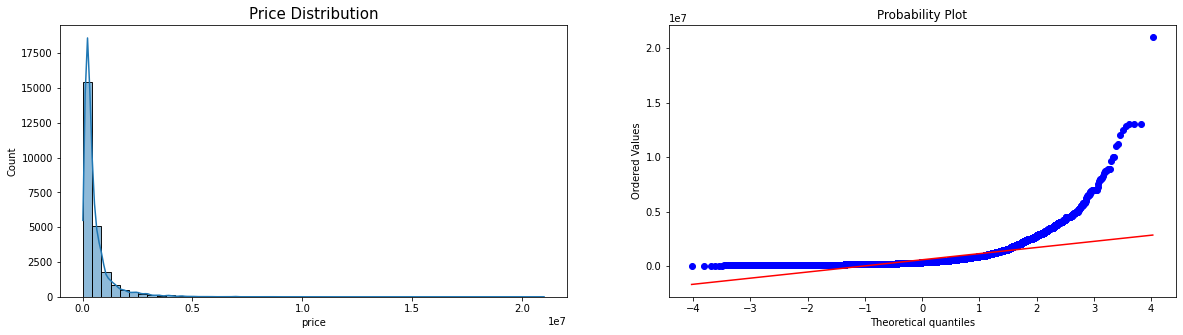

In [9]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

axes[0].set_title(f"Price Distribution",fontsize=15)
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=axes[0]);

axes[1].set_title(f"Probability Plot",fontsize=15)
stats.probplot(df['price'], dist="norm", plot=axes[1]);

Focus on price over 2 million euros:

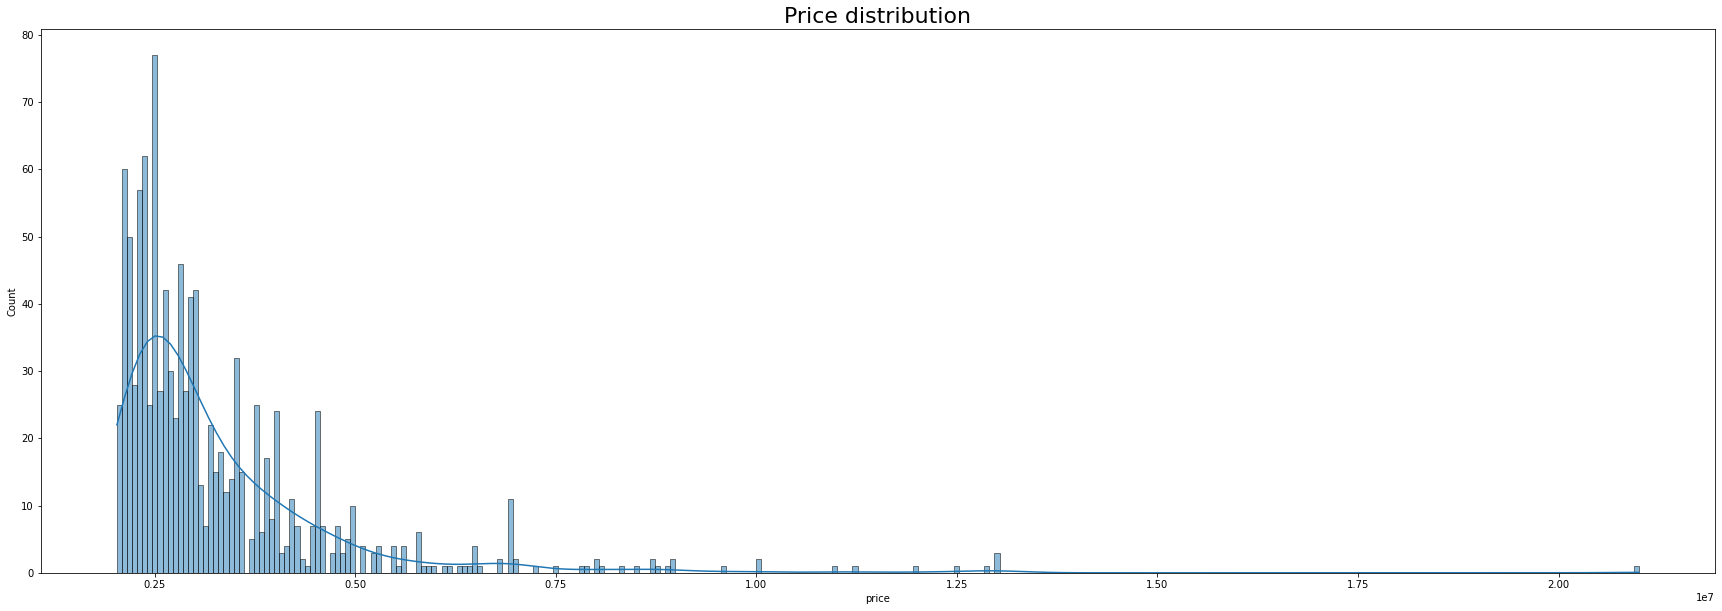

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (30,10))
ax.set_title('Price distribution', fontsize = 22)
sns.histplot(data = df[df['price'] > 2000000].sort_values('price'), x = 'price' , bins = 300, kde=True);

In the probability graph and in the one above, we observe that there is only one property above 20 million euros, far away from the rest. We will eliminate it as it represents an outlier compared to the rest of the prices in our distribution.

In [11]:
df = df[df['price']<2e7]

In [12]:
df['price'].sort_values(ascending=False).head(5)

4551     13000000.0
2647     13000000.0
6189     13000000.0
13876    12900000.0
1301     12500000.0
Name: price, dtype: float64

Having a clear view of the price distribution, we can see that it presents a positive skewness that we must analyse whether it is appropriate to transform.



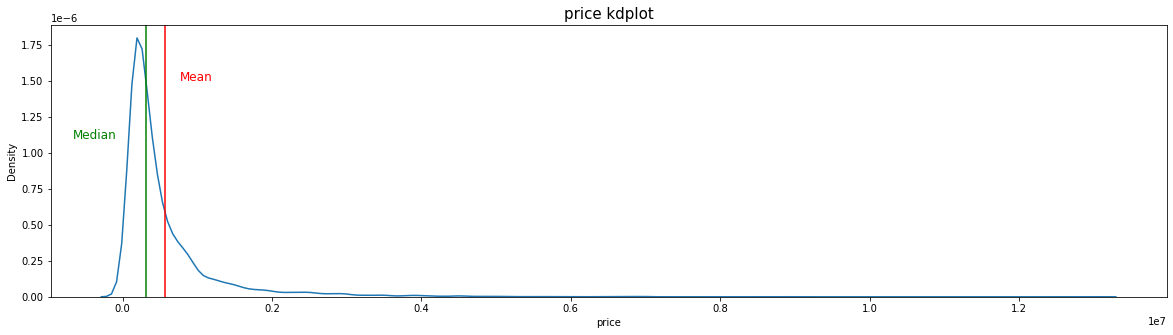

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.set_title(f"price kdplot",fontsize=15)
sns.kdeplot(x=df['price'], ax=ax);
plt.axvline(df['price'].mean(),color='r')
plt.text(df['price'].mean()+200000,0.0000015,s='Mean',color='r',fontsize='12');
plt.axvline(df['price'].median(),color='g')
plt.text(df['price'].median()-990000,0.0000011,s='Median',color='g',fontsize='12');

We can see how the average shifts to the right due to the large weight of high prices in the distribution.

In [14]:
print(f'Price skew: {df["price"].skew()}')
print(f'Price kurtosis: {df["price"].kurt()}')

Price skew: 4.895400720399632
Price kurtosis: 41.64358765456973


In [15]:
print(f"Records right of the mean: {df[df['price'] > df['price'].mean()]['id'].count()}")
print(f"Records left of the mean: {df[df['price'] < df['price'].mean()]['id'].count()}")

Records right of the mean: 6964
Records left of the mean: 17691


In [16]:
print(f"Difference between max price and mean price: {(df['price'].max()-df['price'].mean()).round(2)}")
print(f"Differente between mean price and min price: {(df['price'].mean()-df['price'].min()).round(2)}")

Difference between max price and mean price: 12433766.92
Differente between mean price and min price: 554333.08


As we can see, the price has a high positive skewness or right tail skewness of almost 4.9, which corroborates what we have already seen in the graph. We find an asymmetric distribution with respect to the mean with a large number of very different values to the right of the mean.

With respect to the kurtosis, we find still very high numbers in price, being a leptokurtic distribution which indicates that there is a large concentration of records around the mean, the kurtosis being a normal distribution 3.

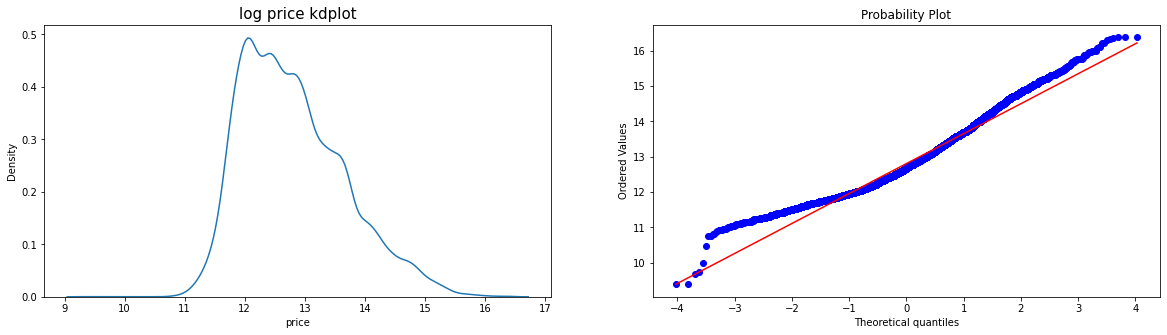

In [17]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

axes[0].set_title(f"log price kdplot",fontsize=15)
sns.kdeplot(x=np.log1p(df['price']), ax=axes[0]);

axes[1].set_title(f"log price kdplot",fontsize=15)
stats.probplot(np.log1p(df['price']), dist="norm", plot=axes[1]);

## **Analysis of extremes**

The project aims to cover residential properties. We must assume that there will be properties that, due to their features, or simply by human decision, have an extreme price that causes the positive skewness we have seen in the previous section.

Next we will look a little deeper into the distribution to see which values cause the asymmetry, in case they could affect the model in the future.

First, we separate the data into quantiles so that we can explore the data at the extremes. We will set the outer limits at the bottom 10% and the top 90%.

In [18]:
df_desc = df.describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).round()
df_desc

price     size  hasParking  roomNumber  bathNumber  \
count     24655.0  24655.0     24655.0     24655.0     24655.0   
mean     566233.0    121.0         0.0         3.0         2.0   
std      747824.0    116.0         0.0         1.0         1.0   
min       11900.0     21.0         0.0         0.0         1.0   
10%      135000.0     50.0         0.0         1.0         1.0   
25%      185000.0     64.0         0.0         2.0         1.0   
50%      320000.0     90.0         0.0         3.0         2.0   
75%      630000.0    133.0         1.0         3.0         2.0   
90%     1224600.0    220.0         1.0         4.0         3.0   
99%     3800000.0    601.0         1.0         7.0         6.0   
max    13000000.0   2400.0         1.0        18.0        16.0   

       hasSwimmingPool  hasTerrace  hasGarden  hasLift  hasAirco  \
count          24655.0     24655.0    24655.0  24655.0   24655.0   
mean               0.0         0.0        0.0      1.0       1.0   
std                0.0         0.0        0.0      0.0       0.0   
min                0.0         0.0        0.0      0.0       0.0   
10%                0.0         0.0        0.0      0.0       0.0   
25%                0.0         0.0        0.0      0.0       0.0   
50%                0.0         0.0        0.0      1.0       1.0   
75%                0.0         1.0        0.0      1.0       1.0   
90%                1.0         1.0        1.0      1.0       1.0   
99%                1.0         1.0        1.0      1.0       1.0   
max                1.0         1.0        1.0      1.0       1.0   

       isGoodCondition  isNeedsRenovating  isNewDevelopment  hasHeatingInfo  \
count          24655.0            24655.0           24655.0         24655.0   
mean               1.0                0.0               0.0             0.0   
std                0.0                0.0               0.0             0.0   
min                0.0                0.0               0.0             0.0   
10%                0.0                0.0               0.0             0.0   
25%                1.0                0.0               0.0             0.0   
50%                1.0                0.0               0.0             0.0   
75%                1.0                0.0               0.0             0.0   
90%                1.0                1.0               0.0             0.0   
99%                1.0                1.0               1.0             1.0   
max                1.0                1.0               1.0             1.0   

       price_m2  room_bath_rate  size_time_baths  
count   24655.0         24655.0          24655.0  
mean     4254.0             2.0             65.0  
std      2187.0             1.0             25.0  
min       168.0             0.0              5.0  
10%      2000.0             1.0             40.0  
25%      2615.0             1.0             50.0  
50%      3812.0             2.0             61.0  
75%      5287.0             2.0             75.0  
90%      7112.0             3.0             92.0  
99%     11492.0             4.0            144.0  
max     25000.0             5.0            701.0

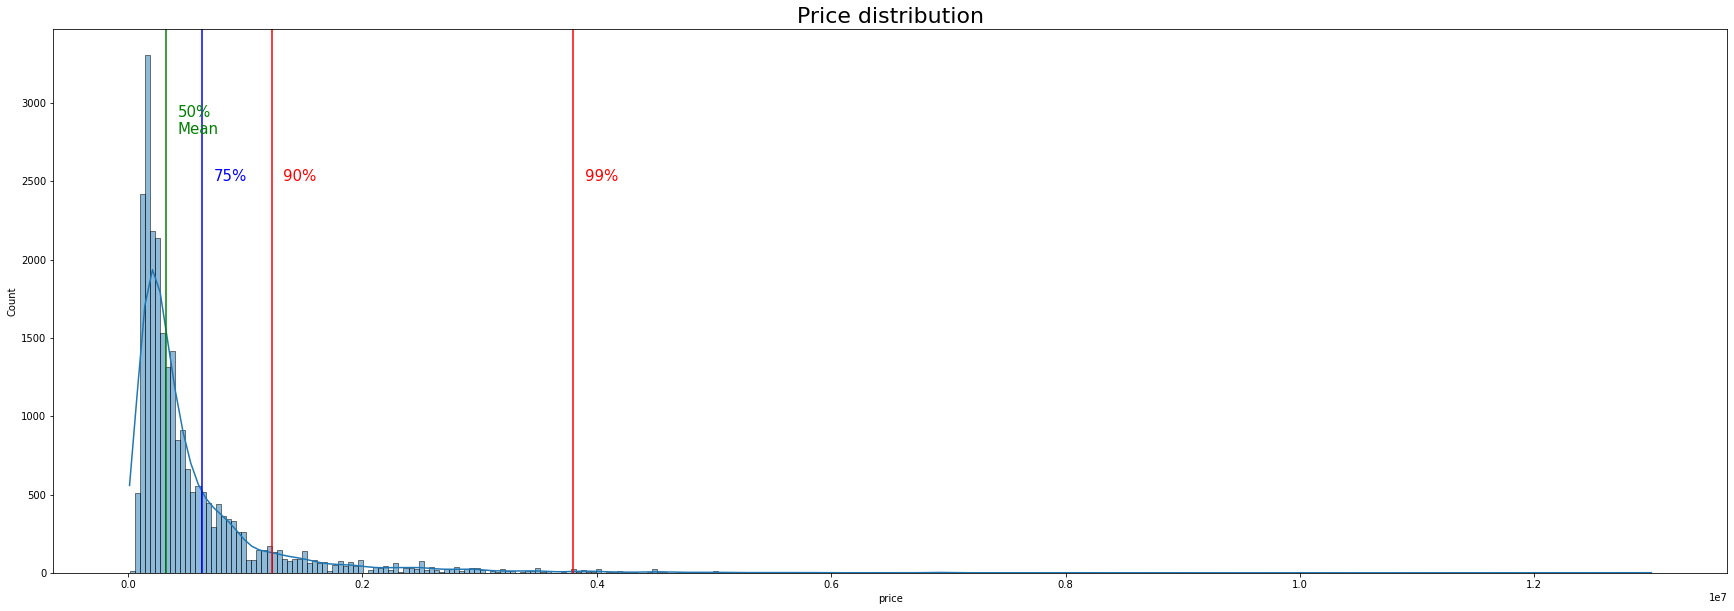

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (30,10))
ax.set_title('Price distribution', fontsize = 22)
sns.histplot(data = df[df['price'] > 0].sort_values('price'), x = 'price' , bins = 300, kde=True);
plt.axvline(df_desc.loc['90%']['price'],color='r')
plt.text(df_desc.loc['90%']['price']+100000,2500,s='90%',color='r',fontsize='15');
plt.axvline(df_desc.loc['99%']['price'],color='r')
plt.text(df_desc.loc['99%']['price']+100000,2500,s='99%',color='r',fontsize='15');
plt.axvline(df_desc.loc['75%']['price'],color='b')
plt.text(df_desc.loc['75%']['price']+100000,2500,s='75%',color='b',fontsize='15');
plt.axvline(df_desc.loc['50%']['price'],color='g')
plt.text(df_desc.loc['50%']['price']+100000,2800,s='50%\nMean',color='g',fontsize='15');

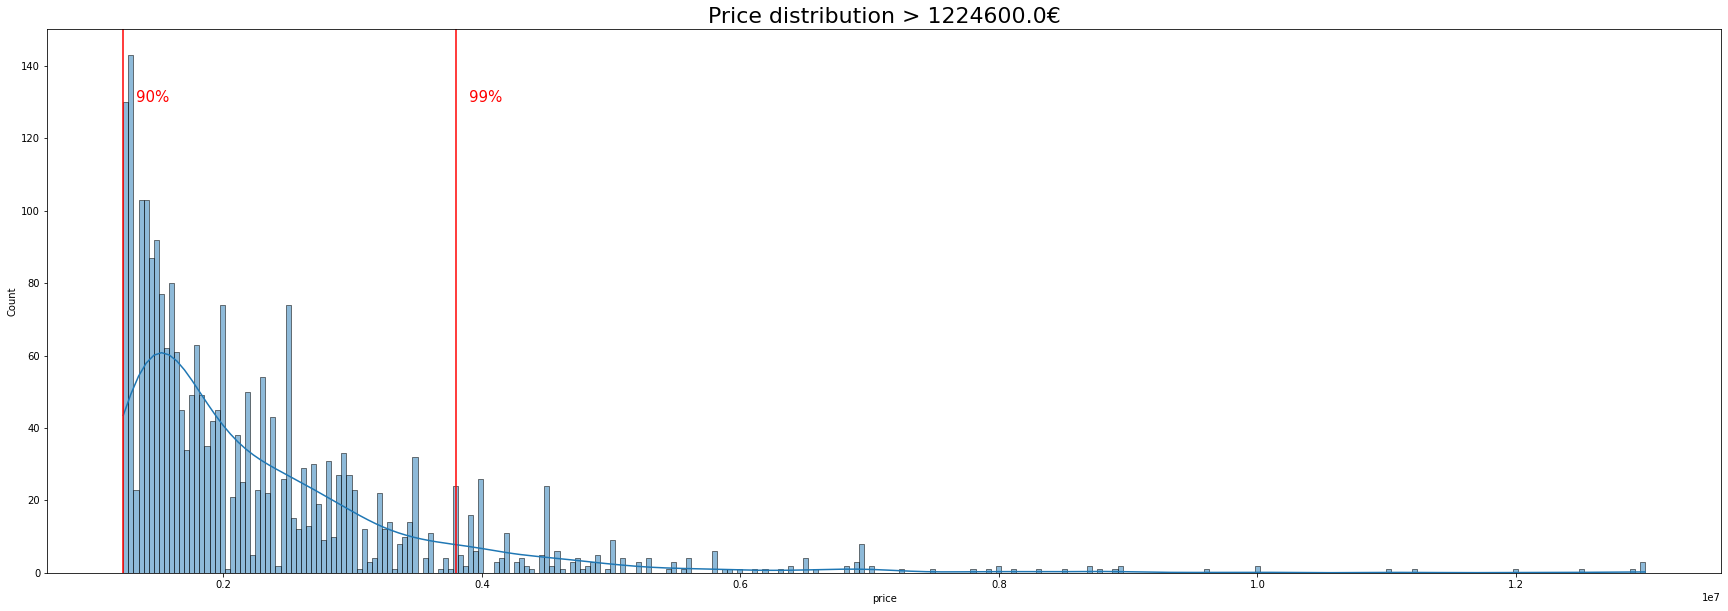

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (30,10))
ax.set_title(f'Price distribution > {df_desc.loc["90%"]["price"]}€', fontsize = 22)
sns.histplot(data = df[df['price'] > df_desc.loc['90%']['price']].sort_values('price'), x = 'price' , bins = 300, kde=True);
plt.axvline(df_desc.loc['90%']['price'],color='r')
plt.text(df_desc.loc['90%']['price']+100000,130,s='90%',color='r',fontsize='15');
plt.axvline(df_desc.loc['99%']['price'],color='r')
plt.text(df_desc.loc['99%']['price']+100000,130,s='99%',color='r',fontsize='15');

In [21]:
df.loc[df['price'] > df_desc.loc['90%']['price'], 'propertyType'].value_counts()

piso          1569
chalet         517
atico          205
duplex         172
loft             2
casa rural       1
Name: propertyType, dtype: int64

It can be observed, logically, that there are quite a few villas that exceed 90%, something we can also expect from duplexes and penthouses. With regard to flats, this is the most frequent property type and we should analyse it.

Where are the flats that exceed the 90% quantile? As expected, in the upper-middle and high class districts of Madrid: Barrio de Salamanca, Chamberí, Chamartín Centro, Retiro and Moncloa.

In [22]:
df.loc[(df['price'] > df_desc.loc['90%']['price']) & (df['propertyType'] == 'piso'), 'district'].value_counts()

Barrio de Salamanca    643
Chamberí               277
Chamartin              243
Centro                 164
Retiro                  84
Moncloa                 78
Tetuán                  38
Ciudad Lineal           22
Hortaleza               14
Fuencarral               4
Arganzuela               1
Barajas                  1
Name: district, dtype: int64

But what are their features?

In [23]:
df[(df['price'] > df_desc.loc['90%']['price']) & (df['propertyType'] == 'piso')].describe().round().T

count       mean        std        min        25%  \
price              1569.0  2180667.0  1087487.0  1225000.0  1450000.0   
size               1569.0      276.0      108.0       93.0      200.0   
hasParking         1569.0        1.0        1.0        0.0        0.0   
roomNumber         1569.0        4.0        1.0        1.0        3.0   
bathNumber         1569.0        4.0        1.0        1.0        3.0   
hasSwimmingPool    1569.0        0.0        0.0        0.0        0.0   
hasTerrace         1569.0        0.0        0.0        0.0        0.0   
hasGarden          1569.0        0.0        0.0        0.0        0.0   
hasLift            1569.0        1.0        0.0        0.0        1.0   
hasAirco           1569.0        1.0        0.0        0.0        0.0   
isGoodCondition    1569.0        1.0        0.0        0.0        0.0   
isNeedsRenovating  1569.0        0.0        0.0        0.0        0.0   
isNewDevelopment   1569.0        0.0        0.0        0.0        0.0   
hasHeatingInfo     1569.0        0.0        0.0        0.0        0.0   
price_m2           1569.0     8103.0     2391.0     2500.0     6349.0   
room_bath_rate     1569.0        1.0        0.0        0.0        1.0   
size_time_baths    1569.0       79.0       31.0       21.0       60.0   

                         50%        75%         max  
price              1850000.0  2500000.0  12500000.0  
size                   250.0      323.0      1100.0  
hasParking               1.0        1.0         1.0  
roomNumber               4.0        5.0        17.0  
bathNumber               4.0        4.0        16.0  
hasSwimmingPool          0.0        0.0         1.0  
hasTerrace               0.0        1.0         1.0  
hasGarden                0.0        0.0         1.0  
hasLift                  1.0        1.0         1.0  
hasAirco                 1.0        1.0         1.0  
isGoodCondition          1.0        1.0         1.0  
isNeedsRenovating        0.0        0.0         1.0  
isNewDevelopment         0.0        0.0         1.0  
hasHeatingInfo           0.0        0.0         1.0  
price_m2              7737.0     9570.0     21192.0  
room_bath_rate           1.0        1.0         5.0  
size_time_baths         74.0       90.0       432.0

The most relevant thing we can see here is that there are properties with 17 bedrooms and 16 bathrooms, something we will have to analyse further on.

Now, let's look at the lower end.

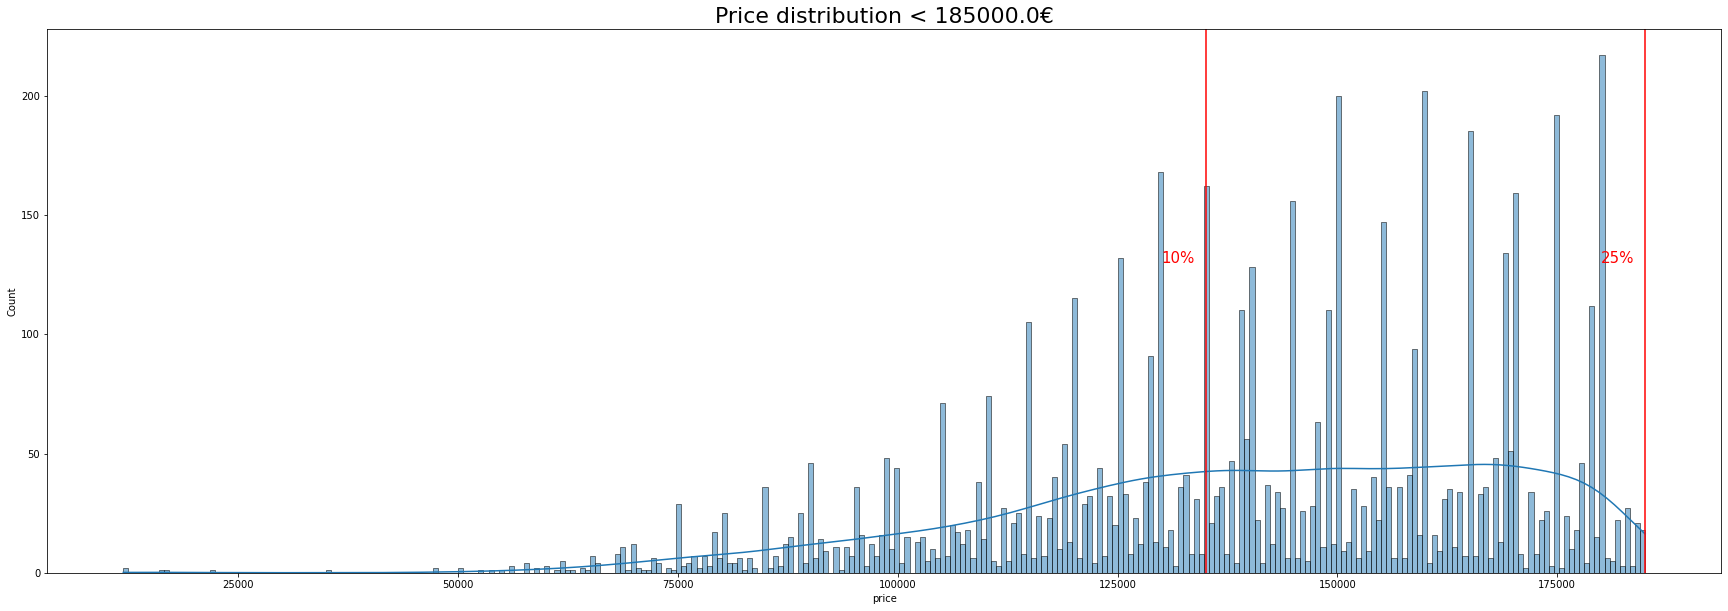

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (30,10))
ax.set_title(f'Price distribution < {df_desc.loc["25%"]["price"]}€', fontsize = 22)
sns.histplot(data = df[df['price'] < df_desc.loc['25%']['price']].sort_values('price'), x = 'price' , bins = 300, kde=True);
plt.axvline(df_desc.loc['25%']['price'],color='r')
plt.text(df_desc.loc['25%']['price']-5000,130,s='25%',color='r',fontsize='15');
plt.axvline(df_desc.loc['10%']['price'],color='r')
plt.text(df_desc.loc['10%']['price']-5000,130,s='10%',color='r',fontsize='15');

We can see that values below the 25% quantile are more similar than those above 90%.

In [25]:
df.loc[df['price'] < df_desc.loc['10%']['price'], 'propertyType'].value_counts()

piso       2104
estudio     144
atico        24
duplex       18
loft         18
chalet       17
Name: propertyType, dtype: int64

If we look at the type of properties that are concentrated at the lower edge, chalets, penthouses and duplexes stand out.

In [26]:
# Chalet
df.loc[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'chalet'),'district'].value_counts()

Puente de Vallecas    8
Tetuán                3
Usera                 2
San Blas              1
Carabanchel           1
Vicálvaro             1
Centro                1
Name: district, dtype: int64

In [27]:
# Chalet
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'chalet')].describe().round().T

count      mean      std      min      25%       50%  \
price               17.0  104122.0  30505.0  22000.0  87300.0  115000.0   
size                17.0      71.0     35.0     33.0     48.0      66.0   
hasParking          17.0       0.0      0.0      0.0      0.0       0.0   
roomNumber          17.0       2.0      1.0      1.0      2.0       2.0   
bathNumber          17.0       1.0      1.0      1.0      1.0       1.0   
hasSwimmingPool     17.0       0.0      0.0      0.0      0.0       0.0   
hasTerrace          17.0       0.0      0.0      0.0      0.0       0.0   
hasGarden           17.0       0.0      0.0      0.0      0.0       0.0   
hasLift             17.0       0.0      0.0      0.0      0.0       0.0   
hasAirco            17.0       0.0      0.0      0.0      0.0       0.0   
isGoodCondition     17.0       1.0      1.0      0.0      0.0       1.0   
isNeedsRenovating   17.0       0.0      1.0      0.0      0.0       0.0   
isNewDevelopment    17.0       0.0      0.0      0.0      0.0       0.0   
hasHeatingInfo      17.0       0.0      0.0      0.0      0.0       0.0   
price_m2            17.0    1761.0    723.0    183.0   1489.0    1894.0   
room_bath_rate      17.0       2.0      1.0      1.0      2.0       2.0   
size_time_baths     17.0      56.0     19.0     33.0     40.0      52.0   

                        75%       max  
price              123000.0  134000.0  
size                   82.0     172.0  
hasParking              0.0       1.0  
roomNumber              3.0       4.0  
bathNumber              1.0       3.0  
hasSwimmingPool         0.0       1.0  
hasTerrace              0.0       1.0  
hasGarden               0.0       1.0  
hasLift                 0.0       0.0  
hasAirco                0.0       1.0  
isGoodCondition         1.0       1.0  
isNeedsRenovating       1.0       1.0  
isNewDevelopment        0.0       0.0  
hasHeatingInfo          0.0       1.0  
price_m2             2255.0    2986.0  
room_bath_rate          2.0       4.0  
size_time_baths        66.0      95.0

In [28]:
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'chalet')]

id propertyType  \
958    100123116       chalet   
1880    97295802       chalet   
5631    98473971       chalet   
5822    97951674       chalet   
8085    97118126       chalet   
8421    96322586       chalet   
8673    98060291       chalet   
8690    98408053       chalet   
11756   95863720       chalet   
15919  100171219       chalet   
16869  100105960       chalet   
18818  164909632       chalet   
20848  165001501       chalet   
22121  162813138       chalet   
22642  165751139       chalet   
22819  165581812       chalet   
24328  176381104       chalet   

                                                   title     price   size  \
958               chalet adosado en venta en calle vedra  133000.0   95.0   
1880   casa o chalet independiente en venta en calle ...  123000.0   68.0   
5631   casa o chalet independiente en venta en calle ...   75000.0   37.0   
5822           chalet pareado en venta en calle infiesto  115000.0   51.0   
8085     chalet adosado en venta en calle pozohalcón s/n  122000.0   80.0   
8421   casa o chalet independiente en venta en entrevías   61000.0   82.0   
8673             casa o chalet en venta en puerta bonita   87300.0   41.0   
8690   casa o chalet independiente en venta en calle ...   75000.0   33.0   
11756     chalet adosado en venta en calle maría ignacia  121000.0   48.0   
15919               chalet adosado en venta en vedra, 16  130400.0   78.0   
16869          chalet adosado en venta en calle benamejí  134000.0   90.0   
18818                             Casa o chalet en venta  121000.0   52.0   
20848                             Casa o chalet en venta   22000.0  120.0   
22121          Casa o chalet en venta en Leonor González  125000.0   66.0   
22642             Casa o chalet en venta en Julio Merino  107500.0   36.0   
22819                 Casa o chalet en venta en Cordovin  112875.0   54.0   
24328  Casa o chalet en venta en Retor Joaquín Martín...  105000.0  172.0   

       hasParking  roomNumber  bathNumber  hasSwimmingPool  hasTerrace  ...  \
958           0.0         2.0         1.0              0.0         1.0  ...   
1880          0.0         4.0         1.0              0.0         0.0  ...   
5631          0.0         2.0         1.0              0.0         0.0  ...   
5822          0.0         1.0         1.0              0.0         0.0  ...   
8085          0.0         3.0         2.0              0.0         0.0  ...   
8421          0.0         2.0         1.0              0.0         0.0  ...   
8673          0.0         2.0         1.0              0.0         0.0  ...   
8690          0.0         2.0         1.0              0.0         0.0  ...   
11756         0.0         2.0         1.0              0.0         0.0  ...   
15919         0.0         4.0         2.0              0.0         1.0  ...   
16869         0.0         2.0         1.0              0.0         0.0  ...   
18818         0.0         2.0         1.0              0.0         1.0  ...   
20848         0.0         3.0         2.0              0.0         0.0  ...   
22121         0.0         2.0         1.0              0.0         0.0  ...   
22642         0.0         2.0         1.0              0.0         0.0  ...   
22819         0.0         3.0         1.0              0.0         0.0  ...   
24328         1.0         3.0         3.0              1.0         1.0  ...   

       isNewDevelopment  energyCertification             heatingType  floor  \
958                 0.0              NO INFO  no info/no calefacción      0   
1880                0.0                    G  no info/no calefacción      0   
5631                0.0              NO INFO  no info/no calefacción      0   
5822                0.0              NO INFO  no info/no calefacción      0   
8085                0.0              NO INFO  no info/no calefacción      0   
8421                0.0              NO INFO  no info/no calefacción      0   
8673                0.0              NO INFO  no info/no

Most of them are small townhouses located in modest neighbourhoods such as Puente de Vallecas.

In [29]:
# Ático
df.loc[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'atico'), 'district'].value_counts()

Centro                6
Villa de Vallecas     6
Puente de Vallecas    4
Villaverde            4
Carabanchel           3
San Blas              1
Name: district, dtype: int64

In [30]:
# Ático
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'atico')].describe().round().T

count      mean      std      min       25%       50%  \
price               24.0  113102.0  16887.0  77000.0  104650.0  118500.0   
size                24.0      48.0     15.0     23.0      32.0      49.0   
hasParking          24.0       0.0      0.0      0.0       0.0       0.0   
roomNumber          24.0       1.0      1.0      0.0       0.0       1.0   
bathNumber          24.0       1.0      0.0      1.0       1.0       1.0   
hasSwimmingPool     24.0       0.0      0.0      0.0       0.0       0.0   
hasTerrace          24.0       1.0      1.0      0.0       0.0       1.0   
hasGarden           24.0       0.0      0.0      0.0       0.0       0.0   
hasLift             24.0       0.0      0.0      0.0       0.0       0.0   
hasAirco            24.0       0.0      1.0      0.0       0.0       0.0   
isGoodCondition     24.0       1.0      0.0      0.0       1.0       1.0   
isNeedsRenovating   24.0       0.0      0.0      0.0       0.0       0.0   
isNewDevelopment    24.0       0.0      0.0      0.0       0.0       0.0   
hasHeatingInfo      24.0       0.0      0.0      0.0       0.0       0.0   
price_m2            24.0    2692.0   1106.0   1185.0    1899.0    2423.0   
room_bath_rate      24.0       1.0      1.0      0.0       0.0       1.0   
size_time_baths     24.0      45.0     15.0     23.0      31.0      47.0   

                        75%       max  
price              123500.0  134900.0  
size                   59.0      72.0  
hasParking              0.0       1.0  
roomNumber              1.0       3.0  
bathNumber              1.0       2.0  
hasSwimmingPool         0.0       1.0  
hasTerrace              1.0       1.0  
hasGarden               0.0       0.0  
hasLift                 1.0       1.0  
hasAirco                1.0       1.0  
isGoodCondition         1.0       1.0  
isNeedsRenovating       0.0       1.0  
isNewDevelopment        0.0       0.0  
hasHeatingInfo          0.0       1.0  
price_m2             3255.0    5098.0  
room_bath_rate          1.0       3.0  
size_time_baths        58.0      72.0

In [31]:
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'atico')]

id propertyType  \
978     99840015        atico   
1365    98267056        atico   
4740    98950092        atico   
4810   100152483        atico   
6961    95510693        atico   
10035   95799040        atico   
12294  100082676        atico   
12566   95806445        atico   
14065   98145538        atico   
14435   98860942        atico   
14740   99484282        atico   
14749   97348726        atico   
14825   96788162        atico   
14988   97460195        atico   
15758   96844498        atico   
16140   97228072        atico   
16870   96544174        atico   
18159   95364305        atico   
19340  164858783        atico   
20357  164881480        atico   
21850  164025062        atico   
22522  165555231        atico   
23795  176219031        atico   
24516  176306362        atico   

                                                   title     price  size  \
978             ático en venta en calle saturnino tejera  120000.0  59.0   
1365       ático en venta en avenida de la albufera, 117  123000.0  48.0   
4740                       ático en venta en cabestreros  103600.0  31.0   
4810   ático en venta en carretera villaverde a vallecas   77000.0  65.0   
6961   ático en venta en carretera de villaverde a va...  119000.0  66.0   
10035               ático en venta en calle de benimamet  110000.0  57.0   
12294                ático en venta en calle peña rivera  118000.0  40.0   
12566  ático en venta en ensanche de vallecas - la gavia   89000.0  50.0   
14065       ático en venta en calle melquiades biencinto  107000.0  47.0   
14435      ático en venta en avenida de la albufera, 115  134900.0  50.0   
14740                   ático en venta en salsipuedes, 7  122000.0  47.0   
14749  ático en venta en carretera villaverde a vallecas   89000.0  64.0   
14825         ático en venta en calle de la colegiata, 5  120000.0  32.0   
14988         ático en venta en calle de los cabestreros  100000.0  31.0   
15758             ático en venta en calle del amparo, 67  132000.0  30.0   
16140                   ático en venta en pico cebollera  117260.0  23.0   
16870           ático en venta en calle de san carlos, 5  110000.0  23.0   
18159             ático en venta en lavapiés-embajadores  105000.0  24.0   
19340          Ático en venta en Calle de Salsipuedes, 7  134700.0  59.0   
20357   Ático en venta en Calle de la Duquesa de Tamames  125000.0  55.0   
21850                                     Ático en venta  130000.0  72.0   
22522          Ático en venta en Calle de Salsipuedes, 7  129000.0  47.0   
23795  Ático en venta en Carretera de Villaverde a Va...   77000.0  60.0   
24516            Ático en venta en Calle de María Zurita  122000.0  60.0   

       hasParking  roomNumber  bathNumber  hasSwimmingPool  hasTerrace  ...  \
978           0.0         2.0         1.0              0.0         1.0  ...   
1365          0.0         1.0         1.0              0.0         0.0  ...   
4740          0.0         1.0         1.0              0.0         0.0  ...   
4810          0.0         0.0         2.0              1.0         1.0  ...   
6961          0.0         1.0         1.0              1.0         1.0  ...   
10035         0.0         3.0         1.0              0.0         1.0  ...   
12294         0.0         0.0         1.0              0.0         1.0  ...   
12566         0.0         0.0         1.0              0.0         0.0  ...   
14065         0.0         1.0         1.0              0.0         1.0  ...   
14435         0.0         1.0         1.0              0.0         0.0  ...   
14740         0.0         1.0         1.0              0.0         1.0  ...   
14749         0.0         1.0         1.0              1.0         0.0  ...   
14825         0.0         0.0         1.0              0.0         0.0  ...   
14988         0.0         1.0         1.0              0.0         0.0  ...   
15758         0.0         0.0         1.0              0.0         0.0  ...   
16140         0.0      

There seems to be nothing unusual, they are small penthouses located in districts such as Centro, Vallecas or Carabanchel.

In [32]:
# Dúplex
df.loc[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'duplex'), 'district'].value_counts()

Puente de Vallecas    6
Tetuán                4
Villaverde            4
Carabanchel           1
Retiro                1
Usera                 1
Ciudad Lineal         1
Name: district, dtype: int64

In [33]:
# Dúplex
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'duplex')].describe().round().T

count      mean      std      min      25%       50%  \
price               18.0  102167.0  22661.0  47500.0  93375.0  101400.0   
size                18.0      57.0     27.0     21.0     34.0      60.0   
hasParking          18.0       0.0      0.0      0.0      0.0       0.0   
roomNumber          18.0       1.0      1.0      0.0      0.0       1.0   
bathNumber          18.0       1.0      1.0      1.0      1.0       1.0   
hasSwimmingPool     18.0       0.0      0.0      0.0      0.0       0.0   
hasTerrace          18.0       0.0      0.0      0.0      0.0       0.0   
hasGarden           18.0       0.0      0.0      0.0      0.0       0.0   
hasLift             18.0       0.0      0.0      0.0      0.0       0.0   
hasAirco            18.0       0.0      1.0      0.0      0.0       0.0   
isGoodCondition     18.0       1.0      0.0      0.0      1.0       1.0   
isNeedsRenovating   18.0       0.0      0.0      0.0      0.0       0.0   
isNewDevelopment    18.0       0.0      0.0      0.0      0.0       0.0   
hasHeatingInfo      18.0       0.0      0.0      0.0      0.0       0.0   
price_m2            18.0    2195.0   1096.0    836.0   1421.0    1892.0   
room_bath_rate      18.0       1.0      1.0      0.0      0.0       1.0   
size_time_baths     18.0      42.0     16.0     21.0     31.0      36.0   

                        75%       max  
price              121350.0  130000.0  
size                   75.0     110.0  
hasParking              0.0       1.0  
roomNumber              2.0       3.0  
bathNumber              2.0       3.0  
hasSwimmingPool         0.0       0.0  
hasTerrace              0.0       1.0  
hasGarden               0.0       1.0  
hasLift                 1.0       1.0  
hasAirco                1.0       1.0  
isGoodCondition         1.0       1.0  
isNeedsRenovating       0.0       1.0  
isNewDevelopment        0.0       0.0  
hasHeatingInfo          0.0       1.0  
price_m2             2912.0    4333.0  
room_bath_rate          2.0       2.0  
size_time_baths        54.0      72.0

In [34]:
df[(df['price'] < df_desc.loc['10%']['price']) & (df['propertyType'] == 'duplex')]

id propertyType  \
645     98436146       duplex   
3396    98350019       duplex   
5270    98740246       duplex   
7139   100126822       duplex   
9148    96360756       duplex   
9910    98700685       duplex   
10894   97777565       duplex   
12866   99972251       duplex   
14190   98343768       duplex   
14854   99306317       duplex   
15154   94851544       duplex   
15157   98248137       duplex   
16583   98084367       duplex   
17605   99607013       duplex   
18349   98346257       duplex   
18557  160782752       duplex   
21842  164831387       duplex   
22630  165758809       duplex   

                                                   title     price   size  \
645                    dúplex en venta en sanz raso, 380   75000.0   65.0   
3396                 dúplex en venta en calle de leñeros   78500.0   21.0   
5270           dúplex en venta en calle de los andaluces  130000.0   84.0   
7139                     dúplex en venta en calle cañete  122000.0   72.0   
9148          dúplex en venta en calle puerto de almansa   97800.0   76.0   
9910       dúplex en venta en calle ambrosio vallejo, 19  106000.0   55.0   
10894     dúplex en venta en calle laguna del marquesado  102800.0   70.0   
12866                         dúplex en venta en adelfas  130000.0   30.0   
14190           dúplex en venta en calle nicolás sánchez  130000.0   70.0   
14854    dúplex en venta en calle del monte perdido, 150   47500.0   24.0   
15154  dúplex en venta en calle de la sierra de los f...   97500.0   35.0   
15157  dúplex en venta en calle laguna del marquesado...  119400.0   85.0   
16583          dúplex en venta en calle de luis ruiz, 21  115000.0   52.0   
17605                     dúplex en venta en calle mirto  122000.0   35.0   
18349      dúplex en venta en calle sargento barriga, 76   76000.0   89.0   
18557     Dúplex en venta en Calle de Sierra de Filabres   97500.0   33.0   
21842     Dúplex en venta en Calle de Bravo Murillo, 173  100000.0   25.0   
22630                                    Dúplex en venta   92000.0  110.0   

       hasParking  roomNumber  bathNumber  hasSwimmingPool  hasTerrace  ...  \
645           0.0         1.0         1.0              0.0         0.0  ...   
3396          0.0         2.0         1.0              0.0         0.0  ...   
5270          0.0         3.0         3.0              0.0         0.0  ...   
7139          0.0         2.0         1.0              0.0         0.0  ...   
9148          0.0         1.0         2.0              0.0         0.0  ...   
9910          0.0         0.0         1.0              0.0         0.0  ...   
10894         1.0         0.0         2.0              0.0         1.0  ...   
12866         0.0         1.0         1.0              0.0         0.0  ...   
14190         0.0         2.0         1.0              0.0         0.0  ...   
14854         0.0         0.0         1.0              0.0         0.0  ...   
15154         0.0         2.0         1.0              0.0         0.0  ...   
15157         0.0         0.0         2.0              0.0         1.0  ...   
16583         0.0         1.0         1.0              0.0         0.0  ...   
17605         0.0         2.0         1.0              0.0         0.0  ...   
18349         0.0         0.0         2.0              0.0         0.0  ...   
18557         0.0         2.0         1.0              0.0         0.0  ...   
21842         0.0         1.0         1.0              0.0         0.0  ...   
22630         0.0         2.0         2.0              0.0         0.0  ...   

       isNewDevelopment  energyCertification             heatingType  floor  \
645                 0.0              NO INFO  no info/no calefacción      0   
3396                0.0                    G  no info/no calefacción     -1   
5270                0.0              NO INFO  no info/no calefacción      1   
7139                0.0                    D  no info/no calefacción      0   
9148                0.0  

It is striking to find duplexes without rooms, but it is possible that they are two-storey houses without walls, given their size, which is usually small.



---



Finally, after verifying that there are properties with very high prices that may compromise the prediction of the model and, given that our objective is to cover properties that should not be categorized as luxury ones or destined to investiment purposes, we decided to eliminate all properties having the top 10% price.

In [35]:
print(f"We currently have {df.shape[0]} records")
print(f"We would lose the top {df[df['price'] > df_desc.loc['90%']['price']].shape[0]} records according to price")
print(f"We would keep {df[df['price'] <= df_desc.loc['90%']['price']].shape[0]} records")

We currently have 24655 records
We would lose the top 2466 records according to price
We would keep 22189 records


We feel safe doing this as we would actually keep 90% of the records, loosing a small amount of properties that might negatively affect the model.

In [36]:
df = df[df['price'] <= df_desc.loc['90%']['price']]

Let's also create a logarithmic transformation of the price to better understand its relationships with the independent features

In [37]:
# df['log_price'] = df['price'].apply(np.log1p)

## **Correlation analysis**

### Pearson correlation

Let's see if there is any correlation among the different features using Pearson correlation

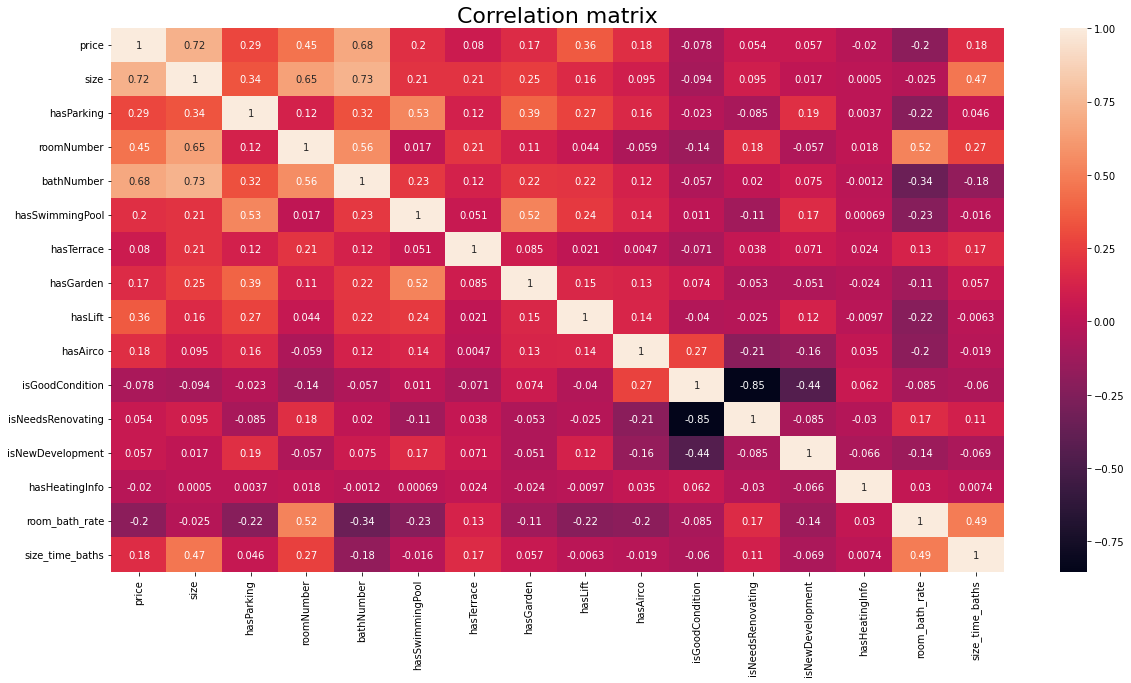

In [38]:
vf.plot_correlation_matrix(df.drop('price_m2',axis=1))

At a first glance at the matrix, there does not appear to be a strong relationship between the features, the most notable being between "isGoodCondition" and "isNeedRenovating" (-0.85) that is quite normal considering that one excludes the other.

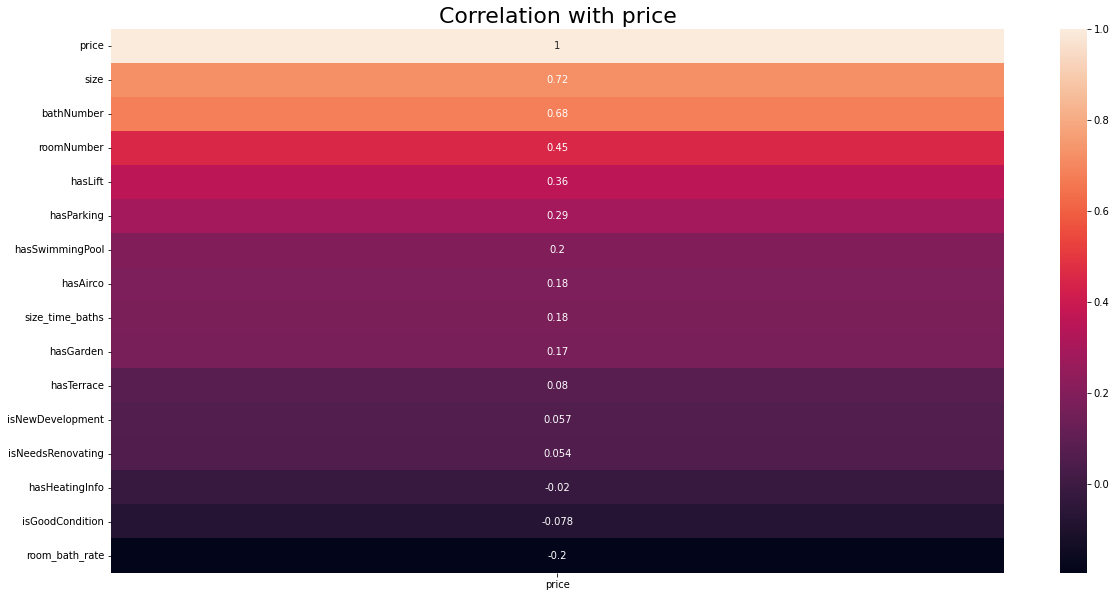

In [39]:
vf.plot_feature_correlation_matrix(df.drop('price_m2',axis=1),'price')

The relationship of features with price denotes that size, number of bathrooms and number of rooms affect price. log_price and price_m2 have analytical purposes only.

### Spearman's rank correlation



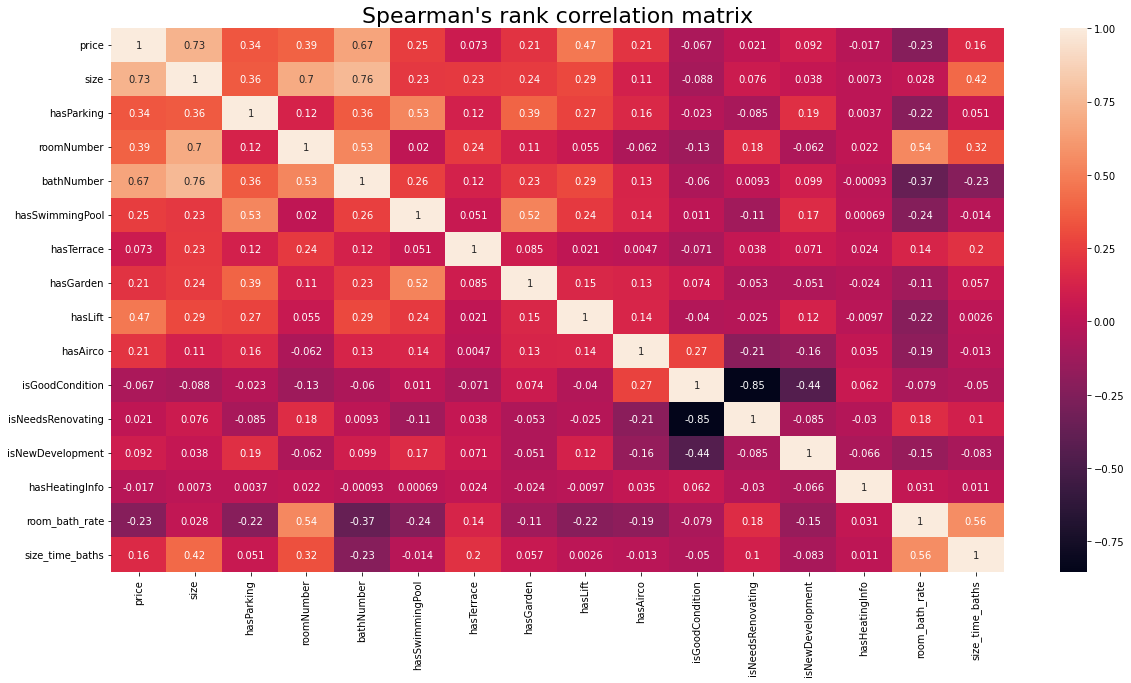

In [40]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.set_title('Spearman\'s rank correlation matrix', fontsize=22)
sns.heatmap(df.drop('price_m2',axis=1).corr('spearman'), annot=True, ax=ax);

Spearman's rank correlation shows similar results except for the hasLift feature and hasParking (which seem more relevant now) but also for roomNumber (which, on the contrary, seems less relevant).

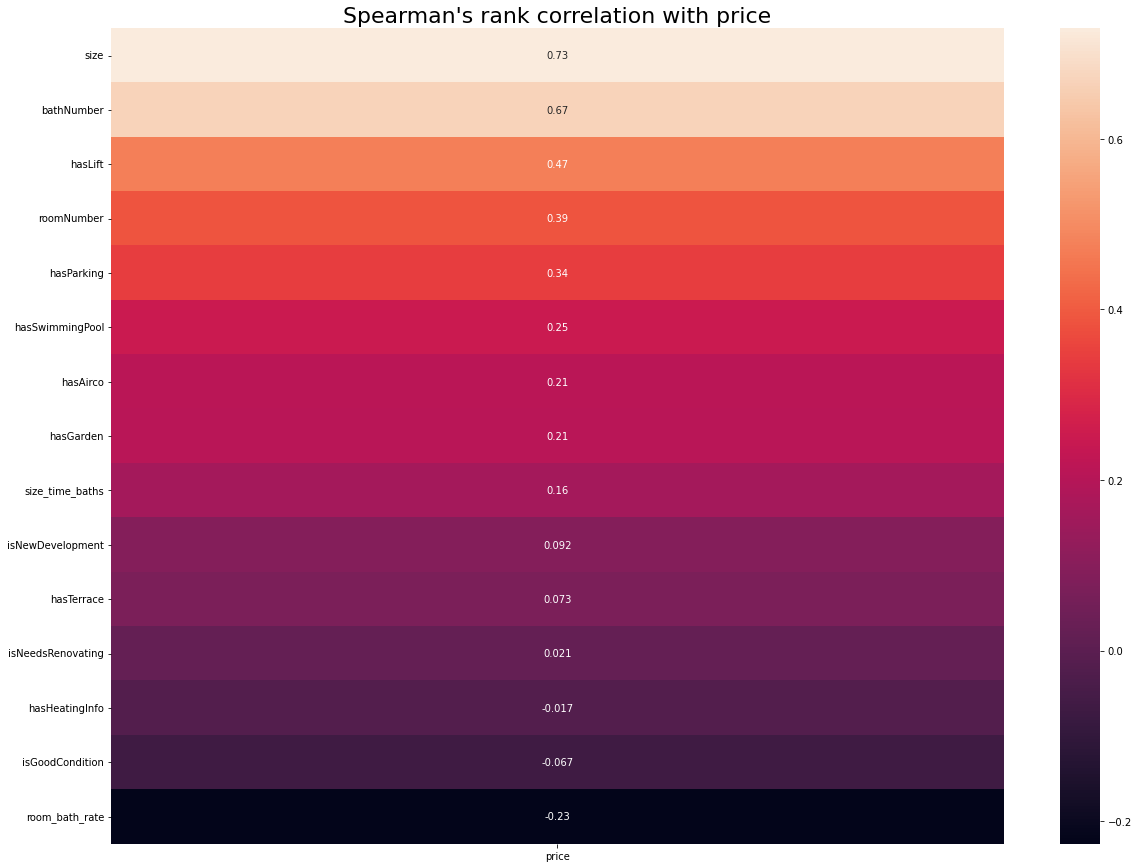

In [41]:
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_title('Spearman\'s rank correlation with price', fontsize=22)
corr_with_price = df.corr('spearman')[['price']].sort_values('price',ascending=False)
corr_with_price = corr_with_price.drop([index for index in corr_with_price.index if 'price' in index])
sns.heatmap(corr_with_price, annot=True, ax=ax);

### Comparison

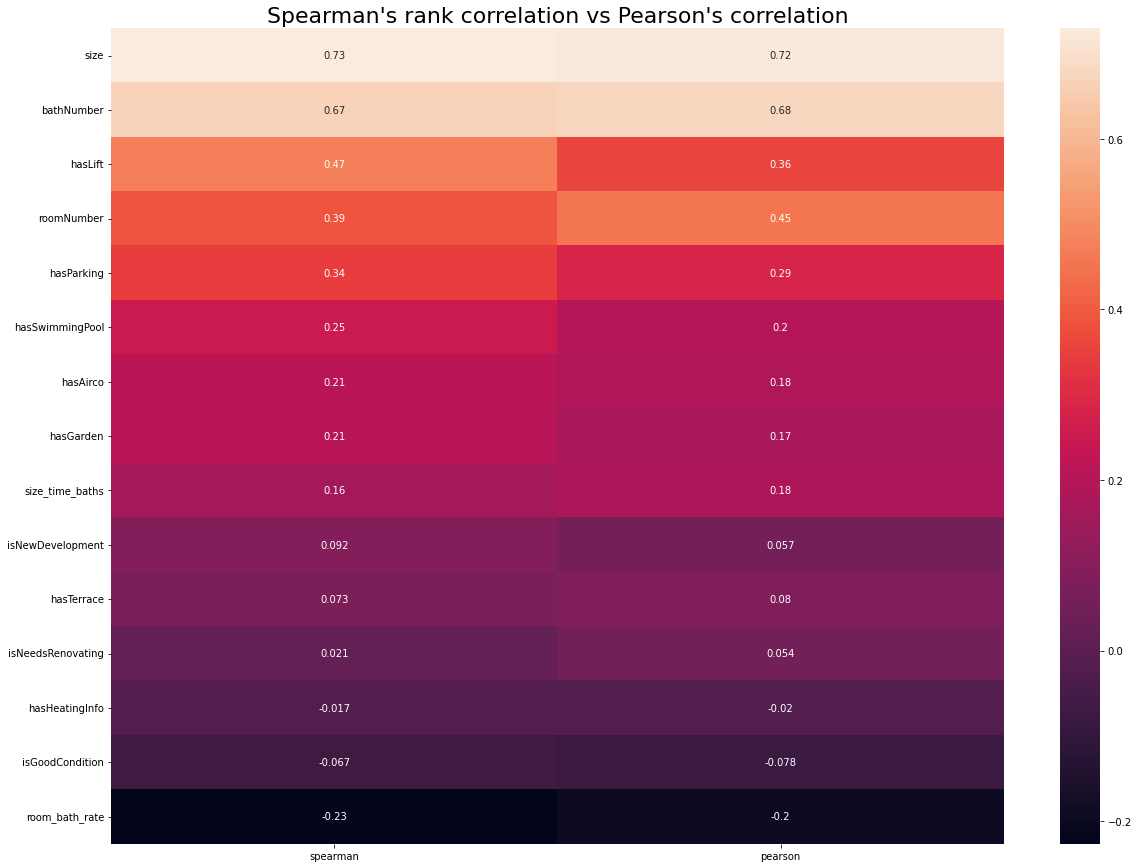

In [42]:
corr_with_price.columns = ['spearman']
corr_with_price['pearson'] = df.corr()[['price']].drop([index for index in corr_with_price.index if 'price' in index])
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_title('Spearman\'s rank correlation vs Pearson\'s correlation', fontsize=22)
sns.heatmap(corr_with_price, annot=True, ax=ax);

## **Correlation analysis: numerical features**

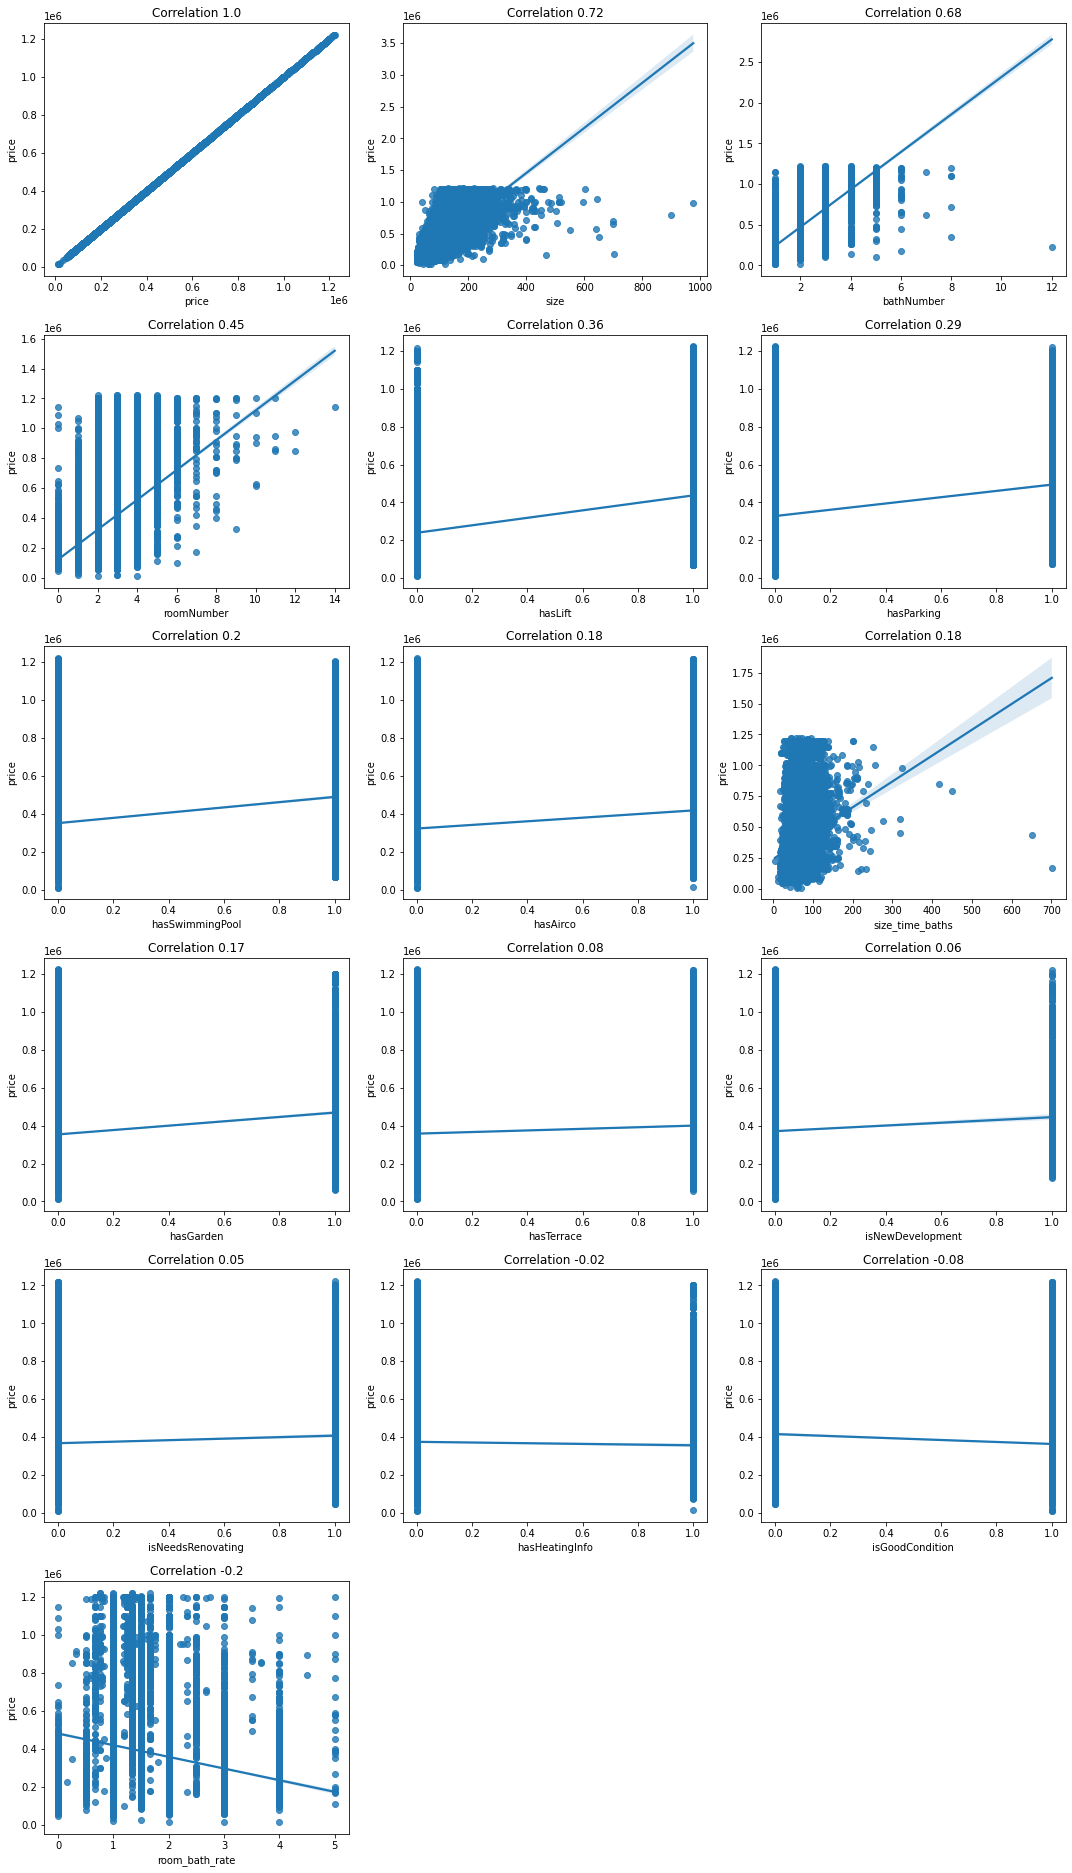

In [43]:
vf.regplot_correlations(df.drop('price_m2',axis=1),'price')

### **Between price and size**

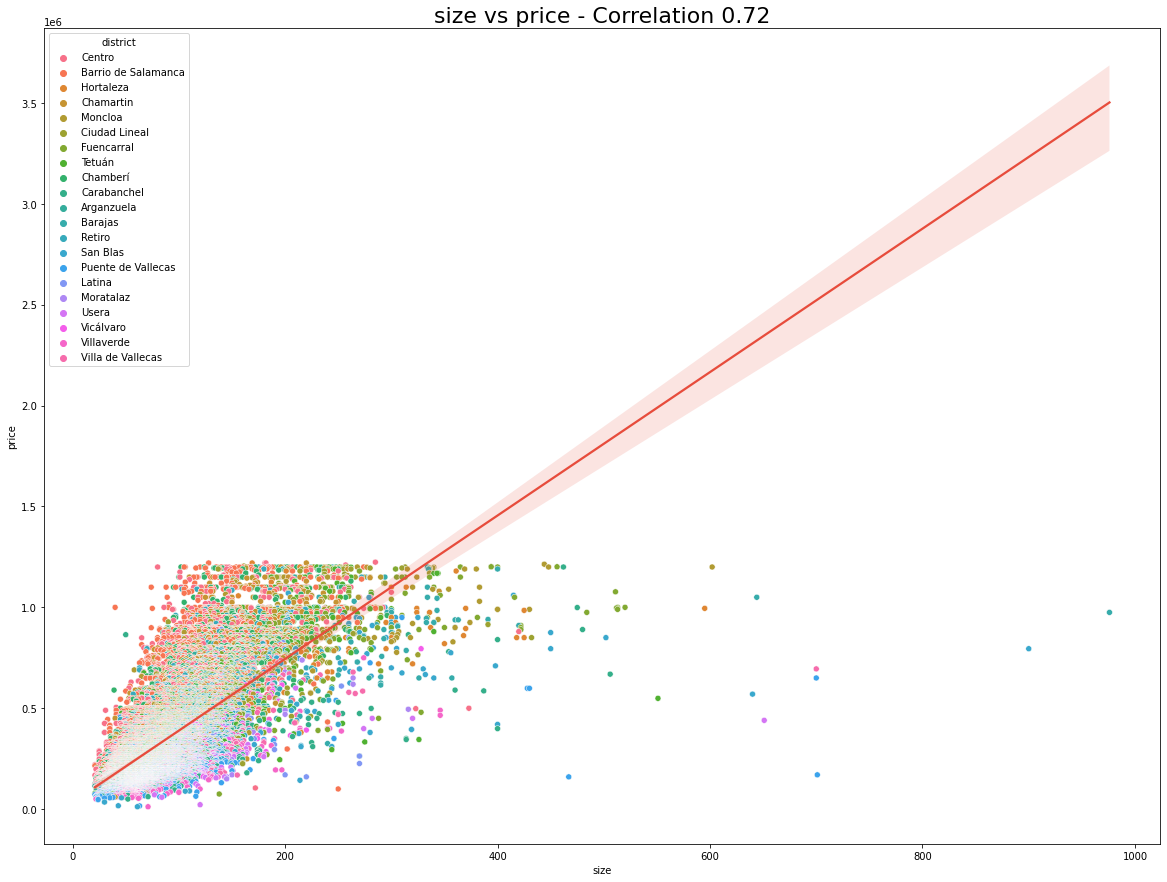

In [44]:
vf.regplot_correlations(df.sort_values('price',ascending=False),'size','price',hue='district')

It looks like there is a strong correlation between size and price but, according to colors, this correlation scales differently depending on the district. For districts like Chamberí, Salamanca and Retiro, the price per m2 tends to be higher than in districts like Hortaleza, Vicálvaro, Ciudad Lineal.

This will be analyzed further on when dealing with categorical features.

### **Between price and bathNumber**

There is also a curious correlation between bathNumber and price. This could be something important but it is necessary to take a look at the potential intercorrelation between bathnumber and size.

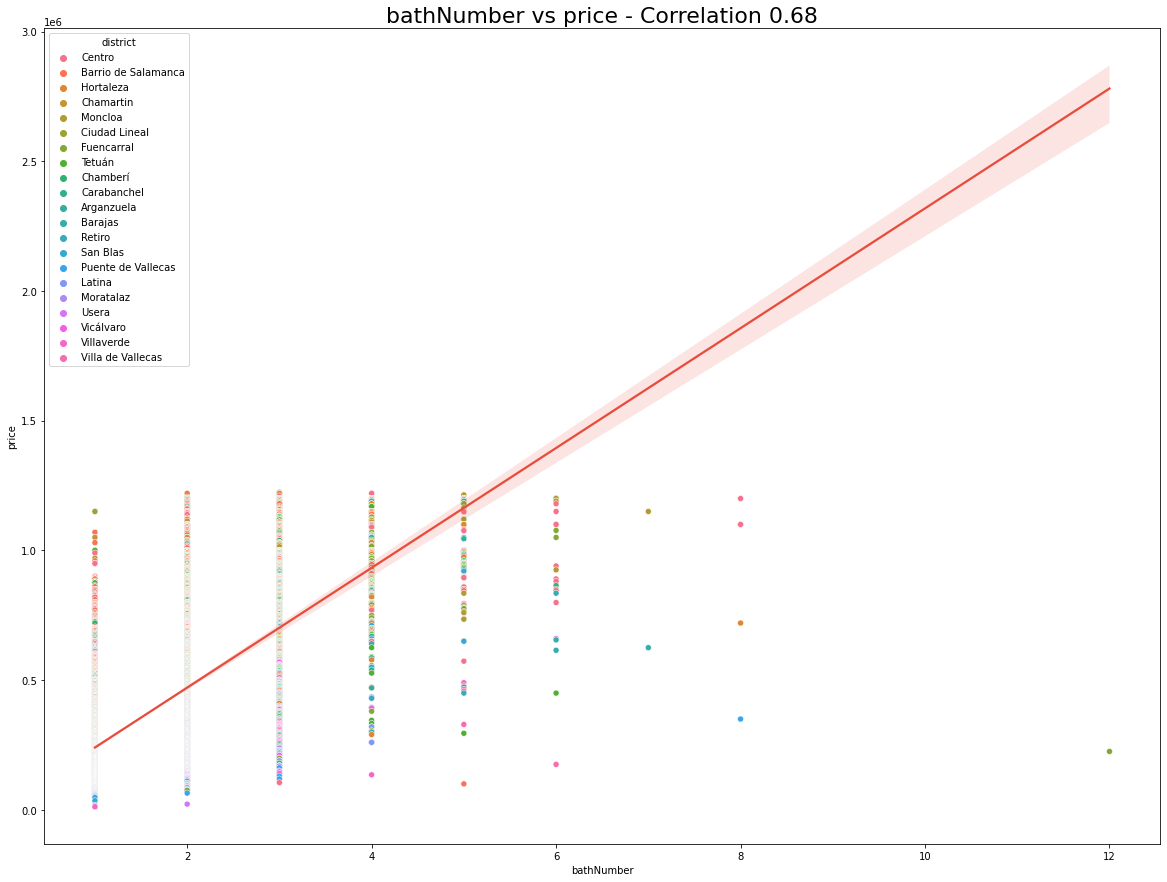

In [45]:
vf.regplot_correlations(df.sort_values('price',ascending=False),'bathNumber','price',hue='district')

In [46]:
df[['bathNumber','roomNumber','price']].groupby('bathNumber').agg({'roomNumber':['mean','max','min','count'],'price':'mean'})

roomNumber                            price
                 mean   max  min  count           mean
bathNumber                                            
1.0          2.000828   5.0  0.0  12071  233345.450915
2.0          2.910505  10.0  0.0   8034  471960.836445
3.0          3.824691  12.0  0.0   1620  783288.343827
4.0          4.477564  14.0  1.0    312  900049.064103
5.0          5.233333  11.0  3.0    120  930539.325000
6.0          6.583333  10.0  5.0     24  909254.166667
7.0          8.500000  10.0  7.0      2  887500.000000
8.0          7.800000   8.0  7.0      5  894000.000000
12.0         2.000000   2.0  2.0      1  225000.000000

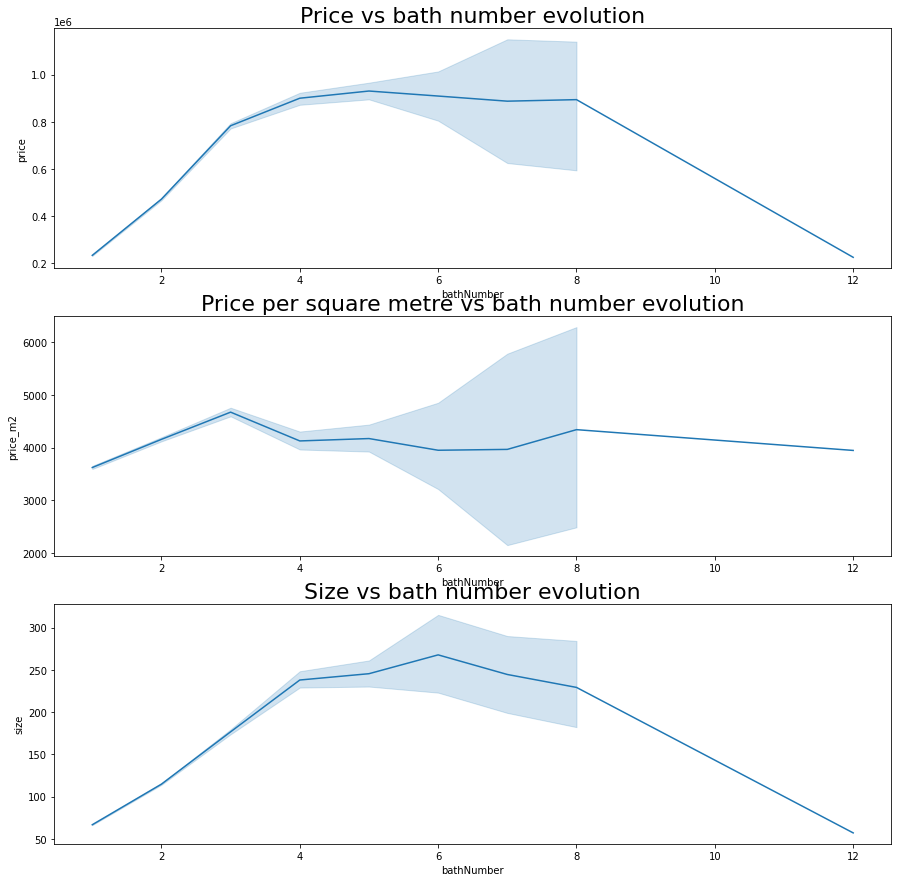

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))
axes[0].set_title('Price vs bath number evolution', fontsize=22)
sns.lineplot(data=df, x='bathNumber', y='price', ax=axes[0])

axes[1].set_title('Price per square metre vs bath number evolution', fontsize=22)
sns.lineplot(data=df, x='bathNumber', y='price_m2', ax=axes[1]);

axes[2].set_title('Size vs bath number evolution', fontsize=22)
sns.lineplot(data=df, x='bathNumber', y='size', ax=axes[2]);

In [48]:
df[df['bathNumber']==12]

id propertyType                             title     price  \
19638  165008518         piso  Piso en venta en Plaza Corcubion  225000.0   

       size  hasParking  roomNumber  bathNumber  hasSwimmingPool  hasTerrace  \
19638  57.0         0.0         2.0        12.0              0.0         1.0   

       ...  isNewDevelopment  energyCertification             heatingType  \
19638  ...               0.0                    E  no info/no calefacción   

       floor    district   dataset hasHeatingInfo price_m2 room_bath_rate  \
19638      7  Fuencarral  fotocasa            0.0  3947.37       0.166667   

      size_time_baths  
19638            4.75  

[1 rows x 25 columns]

In [49]:
df[['bathNumber','roomNumber','price','price_m2']].groupby('roomNumber').agg({'bathNumber':['mean','max','min','count'],'price':'mean','price_m2':'mean'})

bathNumber                          price     price_m2
                 mean   max  min count          mean         mean
roomNumber                                                       
0.0          1.110644   3.0  1.0   714  2.125368e+05  4472.752773
1.0          1.052219   4.0  1.0  3313  2.524272e+05  4534.827416
2.0          1.397732  12.0  1.0  6791  3.241794e+05  4060.836914
3.0          1.597982   5.0  1.0  7731  3.608149e+05  3434.791961
4.0          2.232659   5.0  1.0  2768  5.804399e+05  3891.950741
5.0          3.026101   6.0  1.0   613  7.954048e+05  4098.439299
6.0          3.315152   6.0  2.0   165  8.656769e+05  3880.391273
7.0          3.600000   8.0  2.0    45  8.603296e+05  3396.752000
8.0          3.791667   8.0  2.0    24  8.407083e+05  4109.873333
9.0          3.916667   6.0  2.0    12  9.139583e+05  4072.775000
10.0         4.166667   7.0  2.0     6  8.966667e+05  3840.823333
11.0         3.750000   5.0  3.0     4  9.650000e+05  4844.942500
12.0         3.000000   3.0  3.0     2  9.119260e+05  3969.715000
14.0         4.000000   4.0  4.0     1  1.140000e+06  5507.250000

Besides the outlier property that has 12 bathrooms, the bathroom correlation with the price looks logical: the more bathrooms, the higher the price.

Still, if we compare bathNumber to the price_m2, we can see that there is an intercorrelation between bathNumber and size, which is just as logical: the more bathrooms you have, the more space you need.

Now let's look at the distribution of bathrooms by district.

In [50]:
df_baths = df[['district','bathNumber']].value_counts().reset_index().rename(columns={0:'count'})
df_baths

district  bathNumber  count
0                Centro         1.0   1379
1           Carabanchel         1.0   1253
2    Puente de Vallecas         1.0   1184
3                Tetuán         1.0    910
4         Ciudad Lineal         1.0    876
..                  ...         ...    ...
108  Puente de Vallecas         4.0      1
109  Puente de Vallecas         8.0      1
110               Usera         6.0      1
111              Retiro         5.0      1
112           Hortaleza         8.0      1

[113 rows x 3 columns]

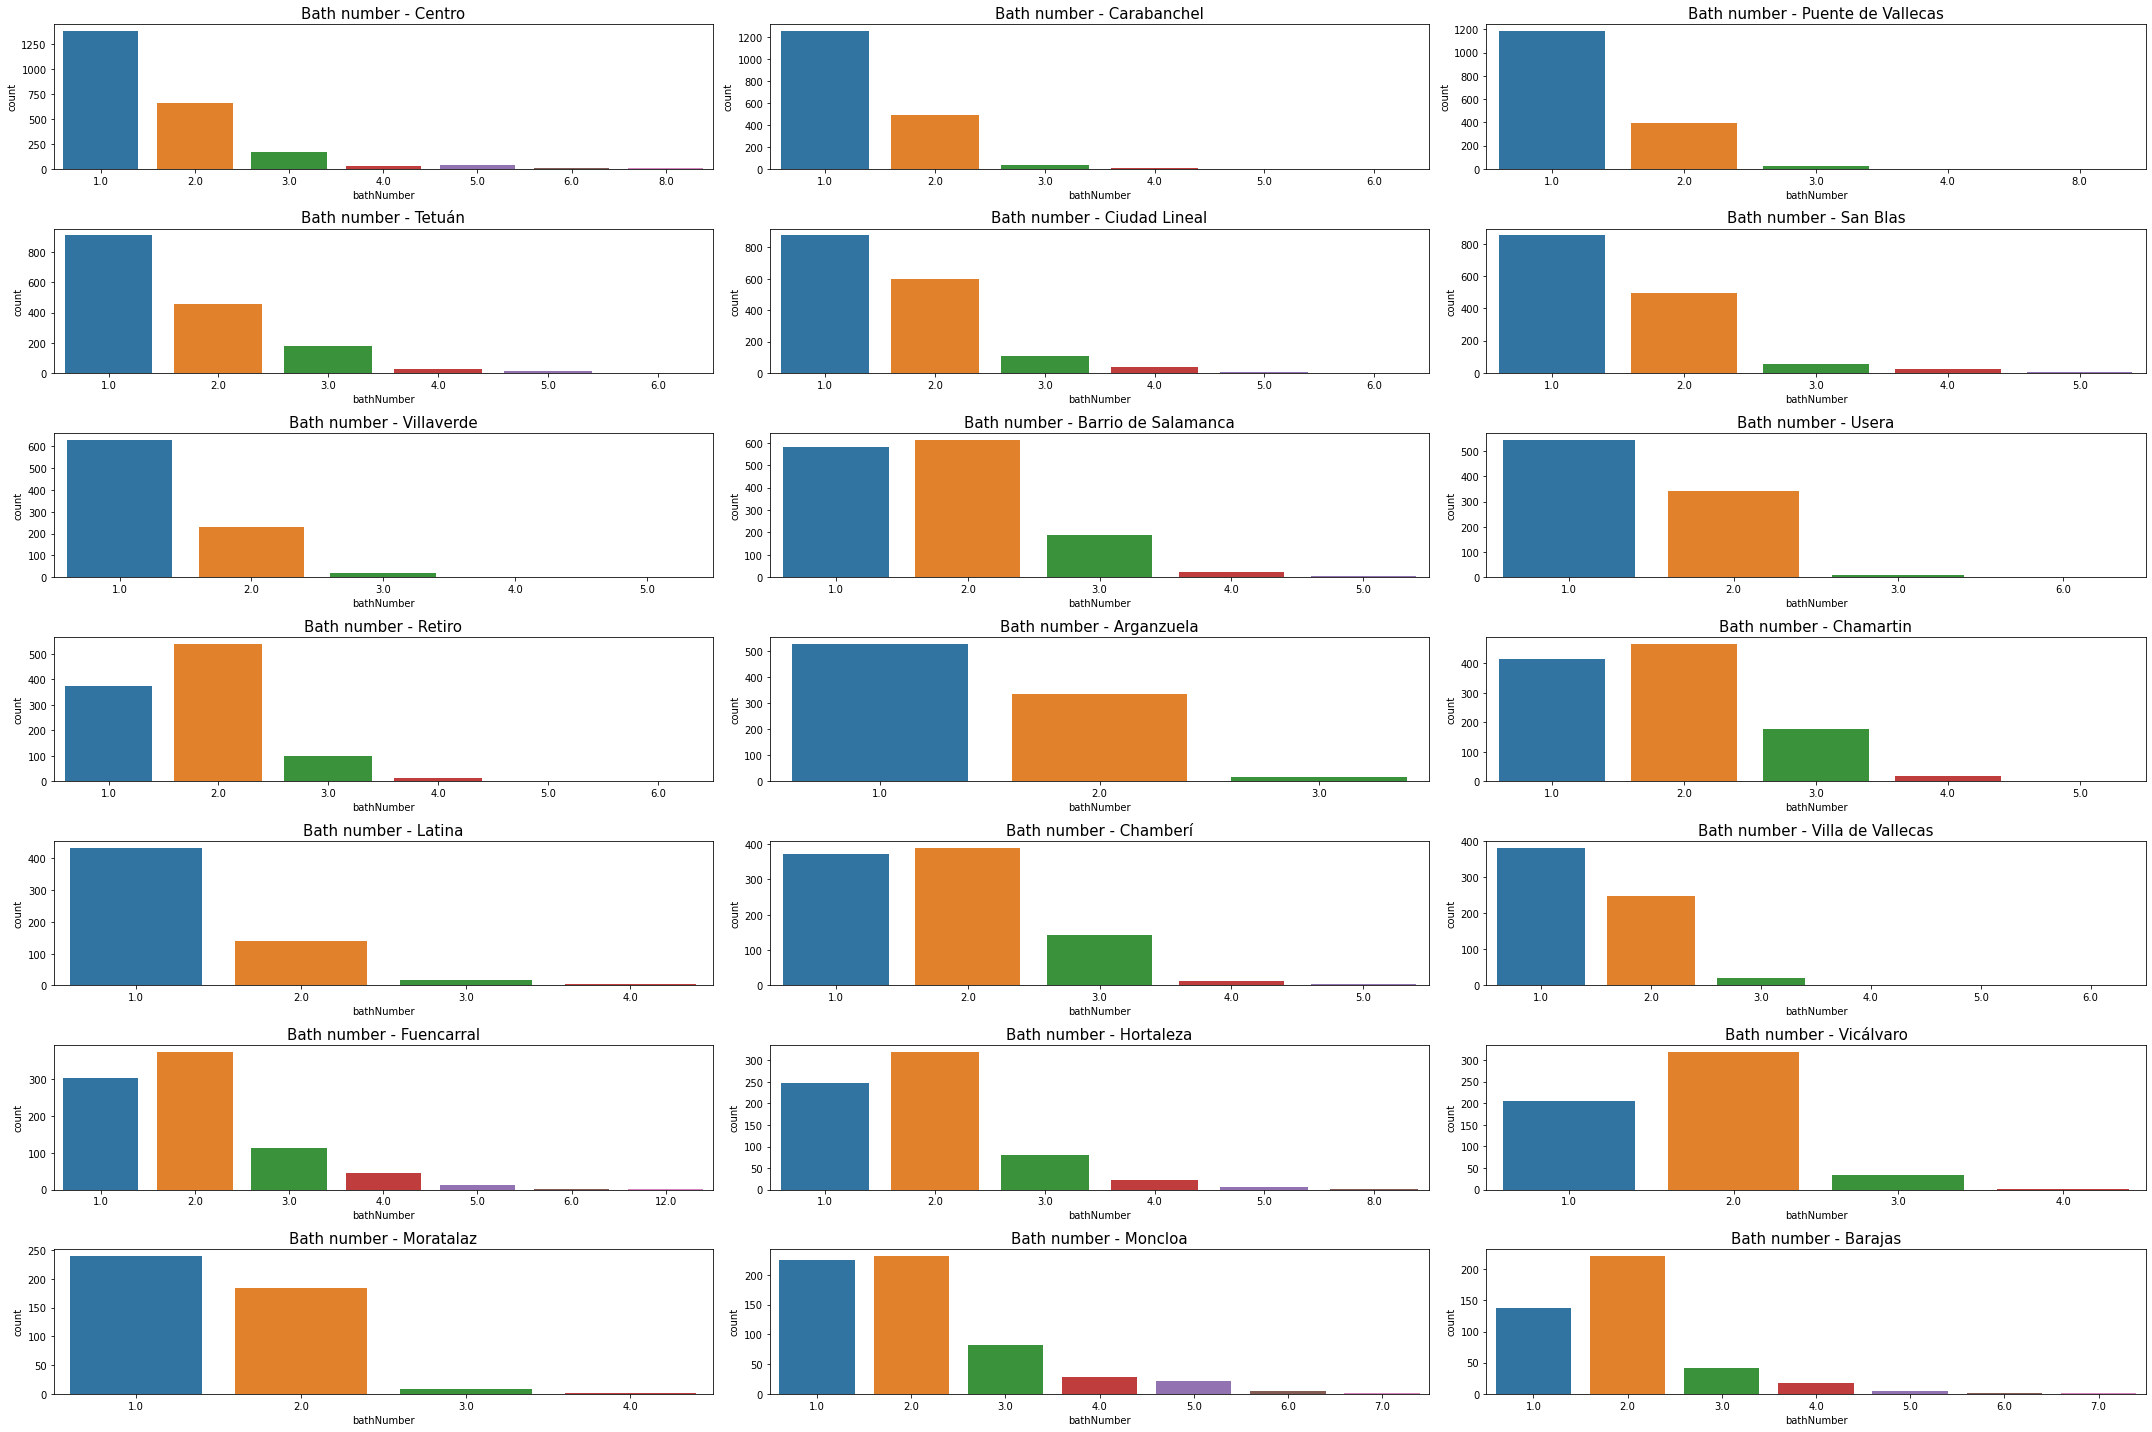

In [51]:
fig, axes = plt.subplots(7,3,figsize = (30,20))
fig.subplots_adjust(bottom=0.1)

for p, ax in enumerate(axes.flat):
  column = list(df_baths['district'].unique())[p]
  ax.set_title(f"Bath number - {column}",fontsize=15)
  sns.barplot(data=df_baths[df_baths['district'] == column], x='bathNumber', y='count', ax=ax)
  plt.tight_layout()

Having more than 5 bathooms seems to be a characteristic that belongs to properties aimed for investiments (students rental, hostels, etc.) so we should drop properties of that sort.

In [52]:
print(df.shape[0])
df = df[df['bathNumber']<=5]
print(df.shape[0])

22189
22157


### **Between price and roomNumber**

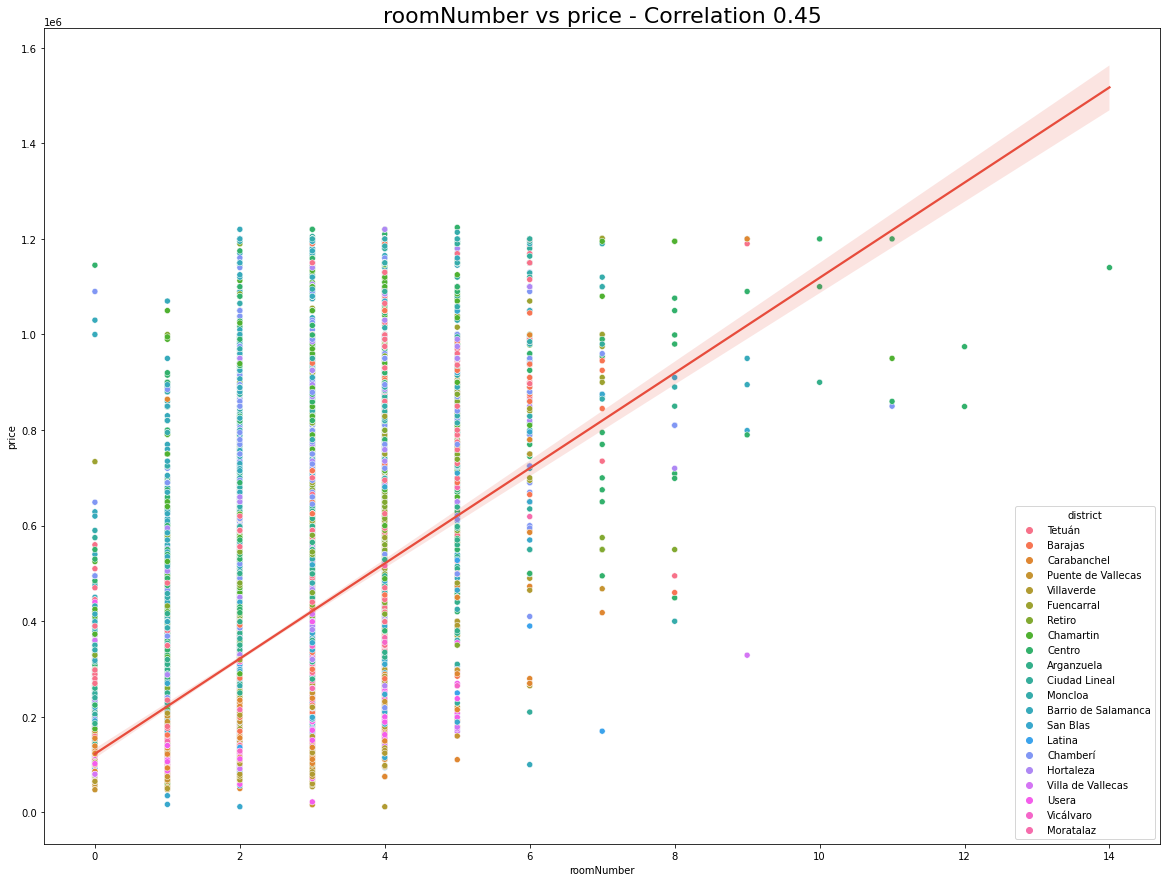

In [53]:
vf.regplot_correlations(df,'roomNumber','price',hue='district')

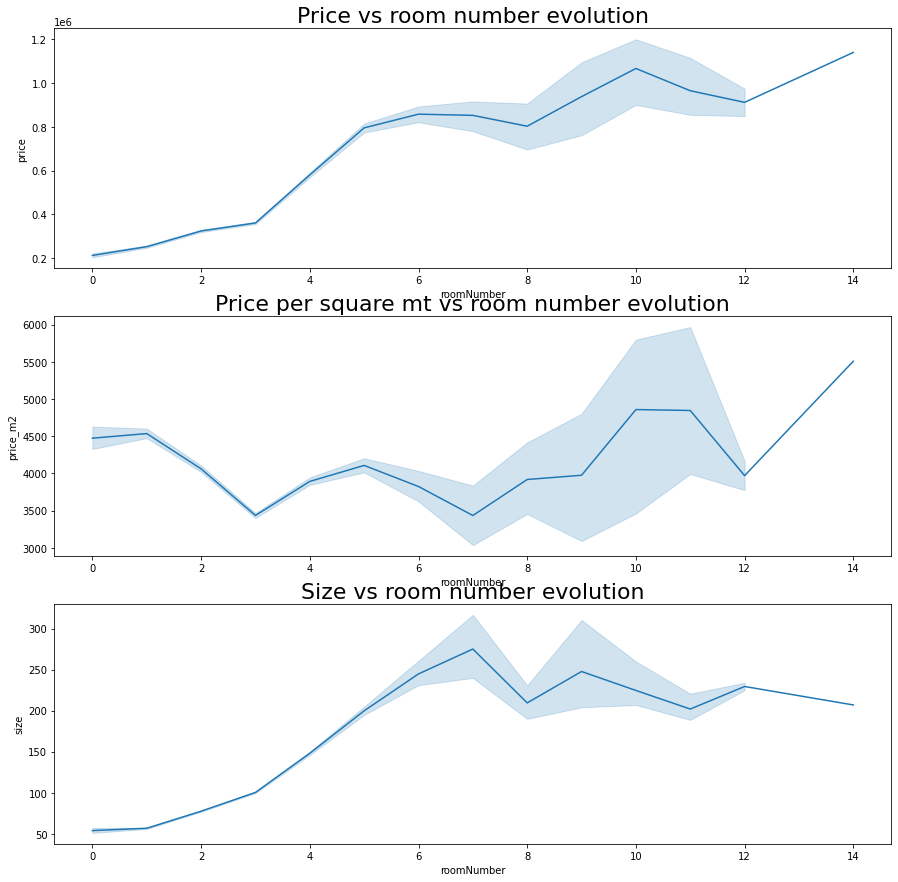

In [54]:
fig, axes = plt.subplots(3, 1, figsize=(15,15))

axes[0].set_title('Price vs room number evolution', fontsize=22)
sns.lineplot(data=df, x='roomNumber', y='price', ax=axes[0]);

axes[1].set_title('Price per square mt vs room number evolution', fontsize=22)
sns.lineplot(data=df, x='roomNumber', y='price_m2', ax=axes[1]);

axes[2].set_title('Size vs room number evolution', fontsize=22)
sns.lineplot(data=df, x='roomNumber', y='size', ax=axes[2]);

This looks pretty much like the bathNumber correlation. Of course a higher amount of rooms is an indicator of a higher price. Still, there is a slight intercorrelation between roomNumber and size, although in this case it is not as strong as between size and bathNumber

Now let's look at the distribution of rooms by district.

In [55]:
df_rooms = df[['district','roomNumber']].value_counts().reset_index().rename(columns={0:'count'})
df_rooms

district  roomNumber  count
0           Carabanchel         3.0    761
1                Centro         2.0    756
2                Centro         1.0    619
3         Ciudad Lineal         3.0    616
4    Puente de Vallecas         3.0    610
..                  ...         ...    ...
174              Tetuán         9.0      1
175              Tetuán         8.0      1
176              Centro        14.0      1
177              Latina         7.0      1
178            San Blas         9.0      1

[179 rows x 3 columns]

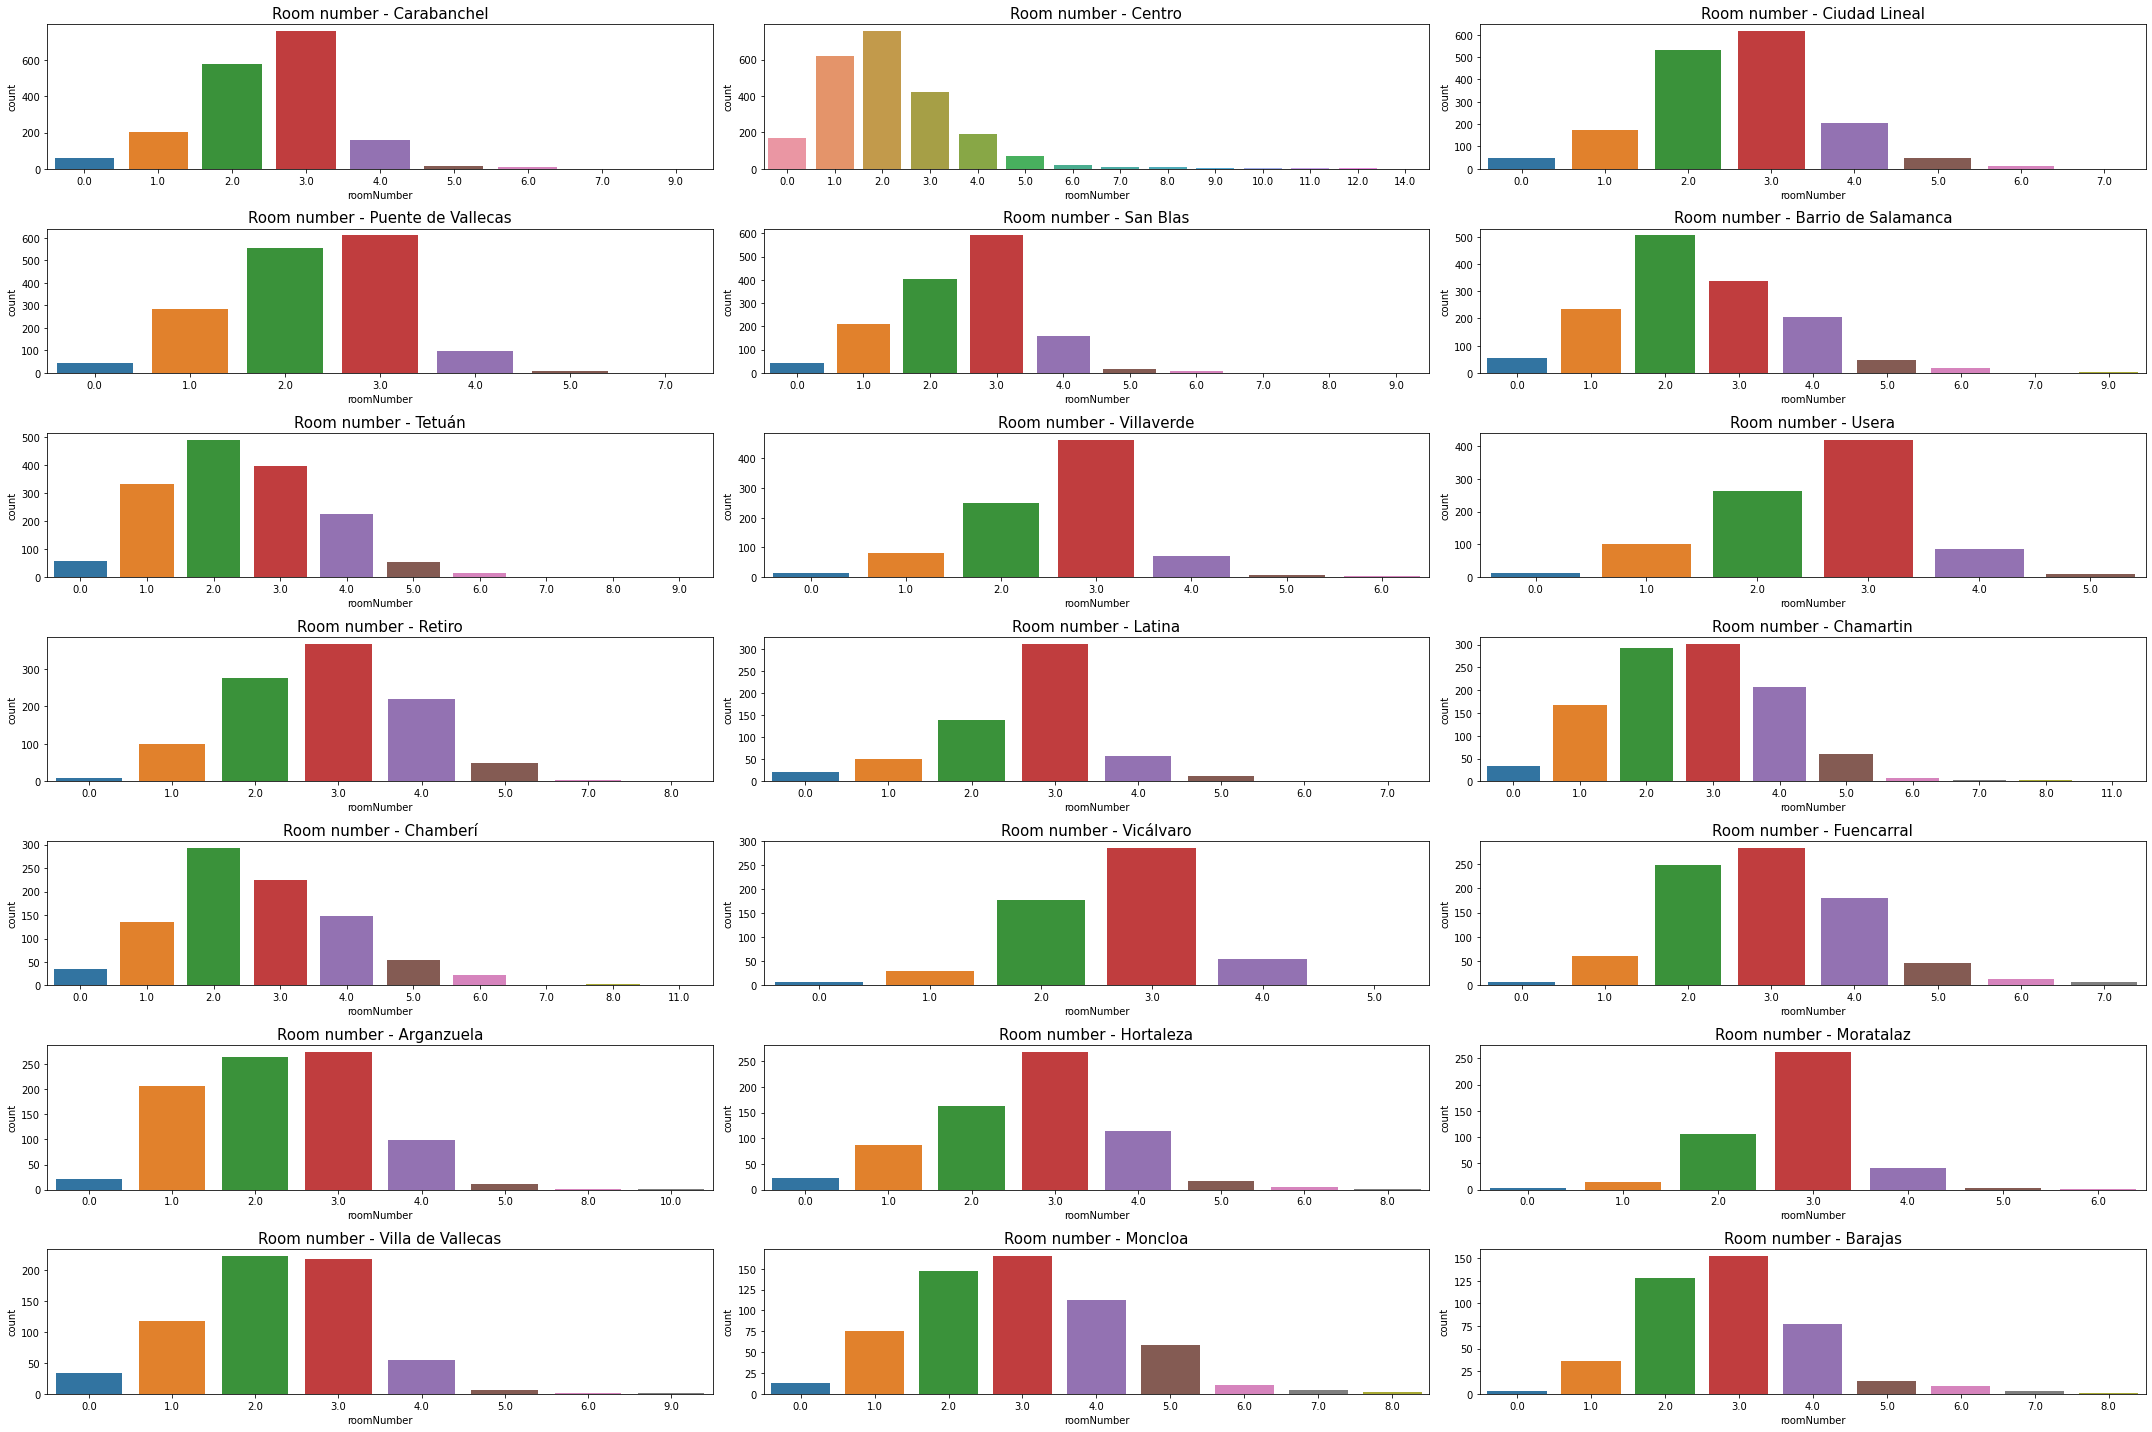

In [56]:
fig, axes = plt.subplots(7,3,figsize = (30,20))
fig.subplots_adjust(bottom=0.1)

for p, ax in enumerate(axes.flat):
  column = list(df_rooms['district'].unique())[p]
  ax.set_title(f"Room number - {column}",fontsize=15)
  sns.barplot(data=df_rooms[df_rooms['district'] == column], x='roomNumber', y='count', ax=ax)
  plt.tight_layout()

In [57]:
df_rooms[df_rooms['district'] == 'Centro']['roomNumber'].unique()

array([ 2.,  1.,  3.,  4.,  0.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       14.])

Here as well we can see that the properties having a high amount of bedrooms are more suitable for investiments than for living.

These are particular cases with properties for student rentals, coliving, hostels, to be refurbished in several flats...

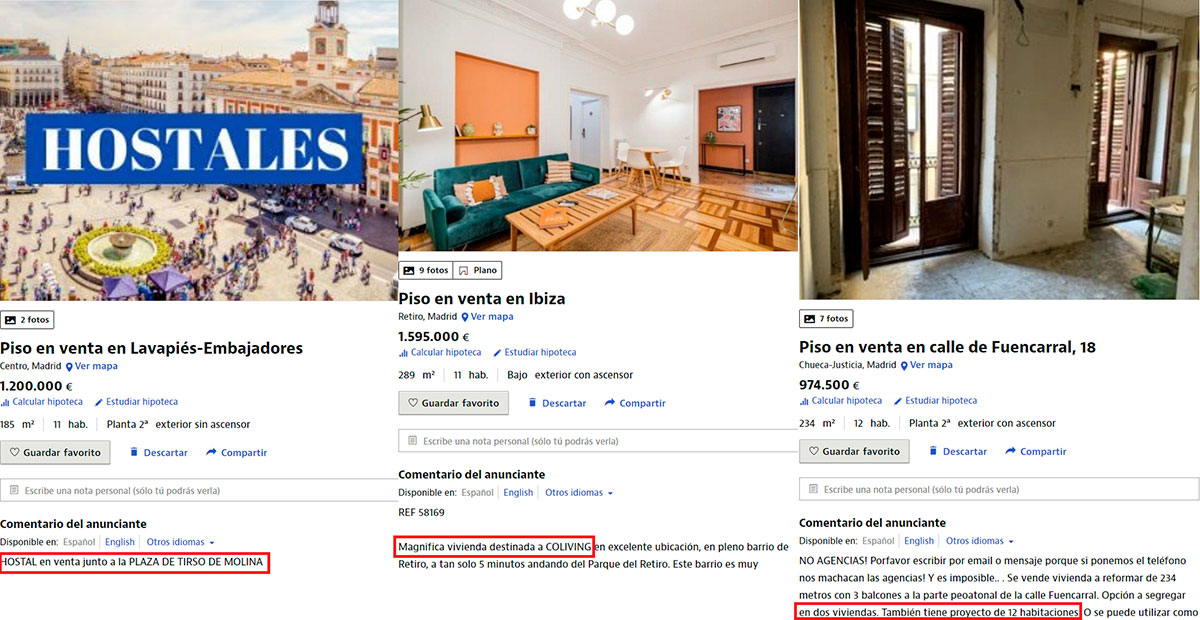

Hence, they are out of scope and should be dropped, always making sure that the amount of records that will be lost is affordable.

In [58]:
df['roomNumber'].quantile(0.99)

6.0

In [59]:
print(df.shape[0])
df = df[df['roomNumber']<=df['roomNumber'].quantile(0.99)]
print(df.shape[0])

22157
22078


### **Between price and hasParking**

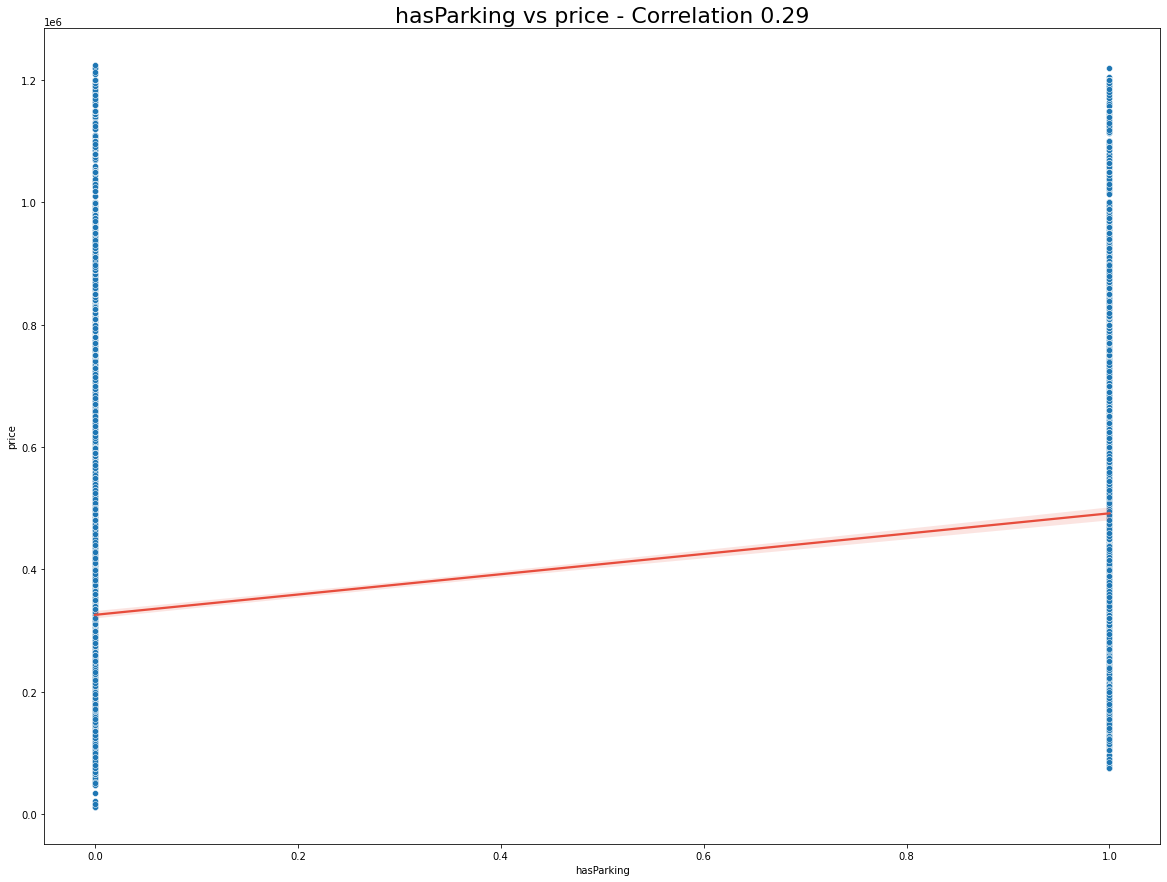

In [60]:
vf.regplot_correlations(df,'hasParking','price',hue=False)

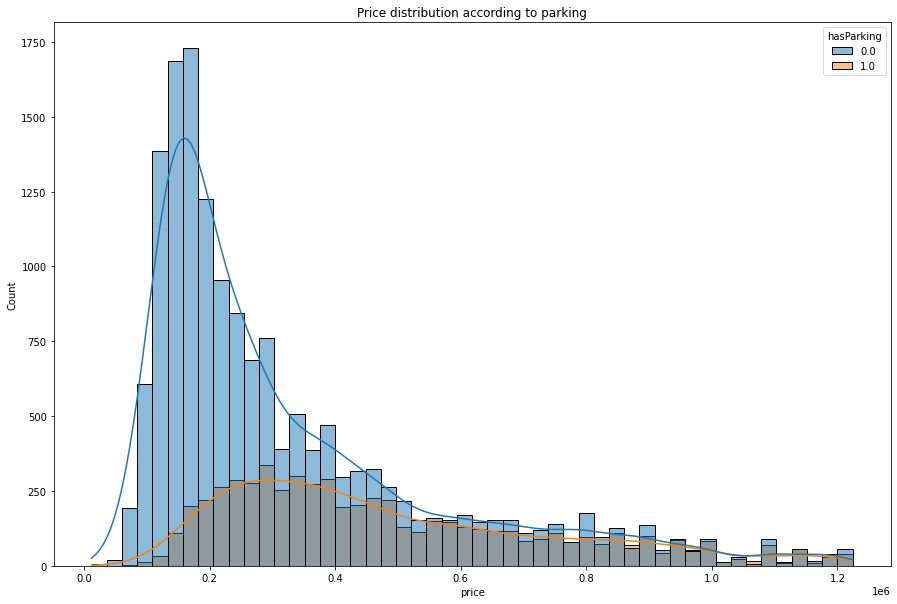

In [61]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to parking')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasParking');

### **Between price and hasTerrace**

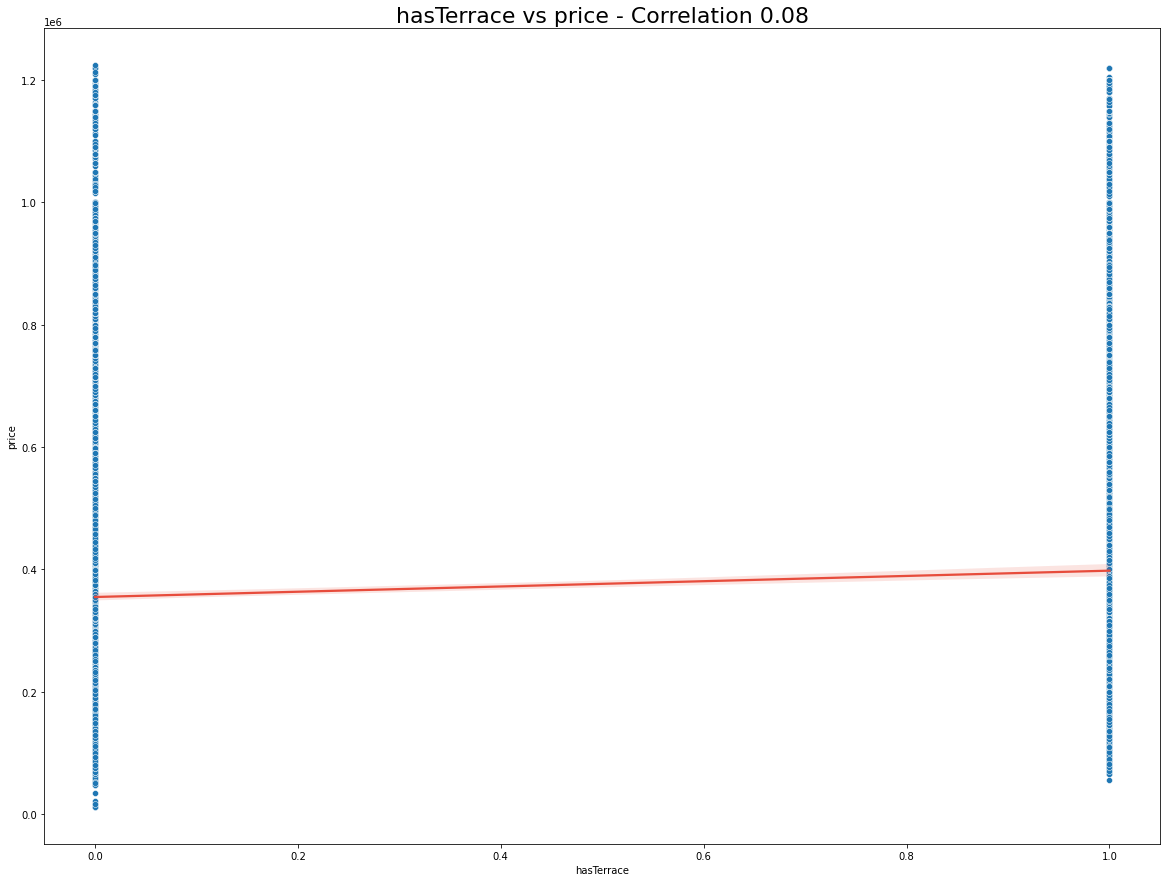

In [62]:
vf.regplot_correlations(df,'hasTerrace','price',hue=False)

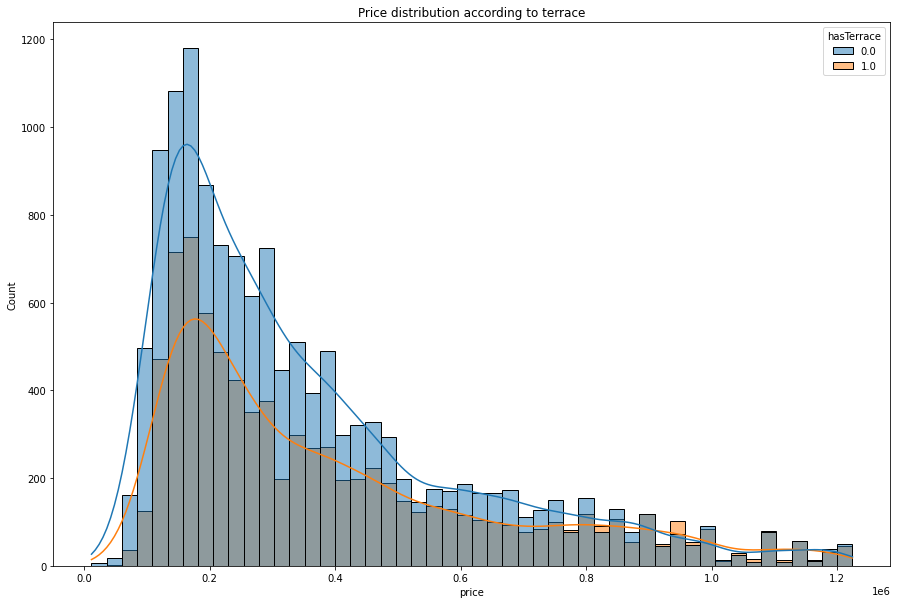

In [63]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to terrace')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasTerrace');

### **Between price and hasLift**



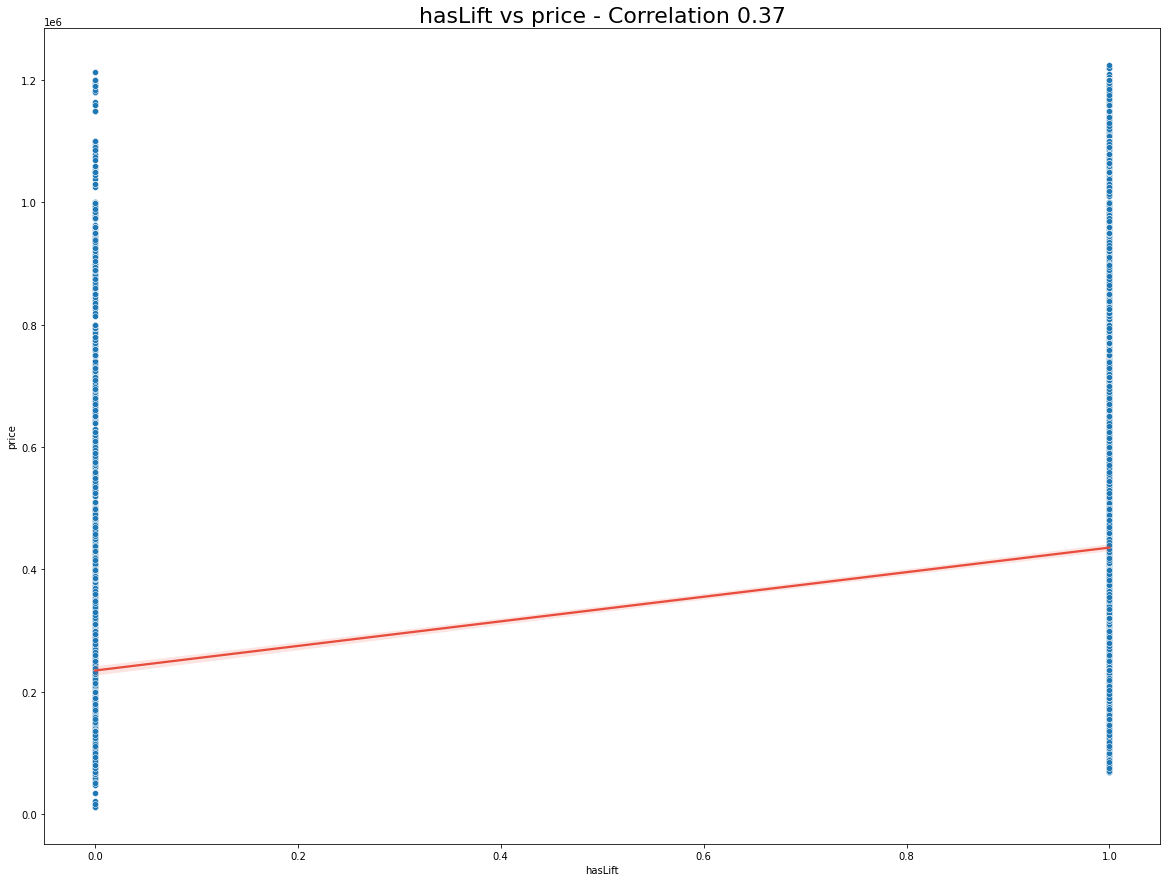

In [64]:
vf.regplot_correlations(df,'hasLift','price',hue=False)

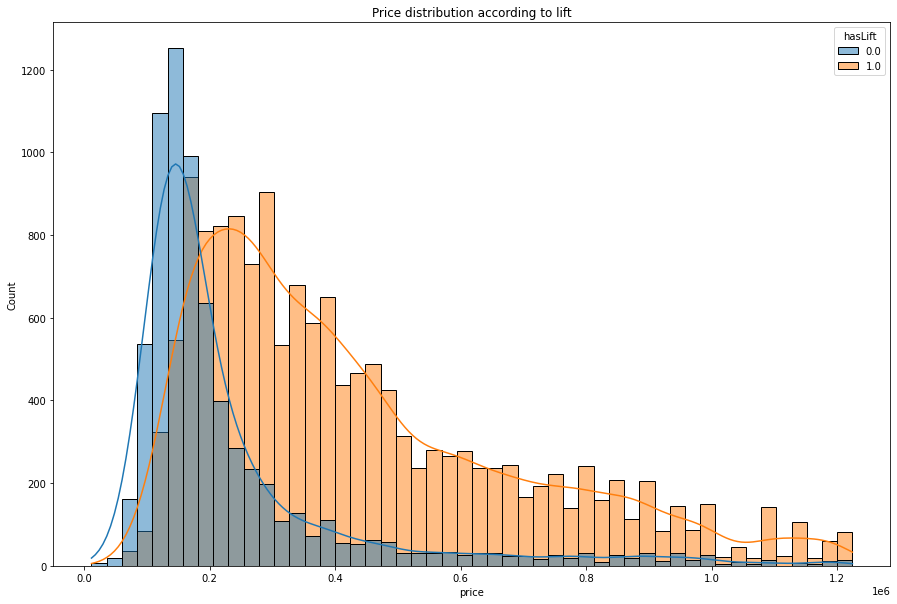

In [65]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to lift')
# removing chalets as this feature doesn't apply to them
sns.histplot(data = df[df['propertyType'] != 'chalets'].sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasLift');

### **Between price and hasAirco**



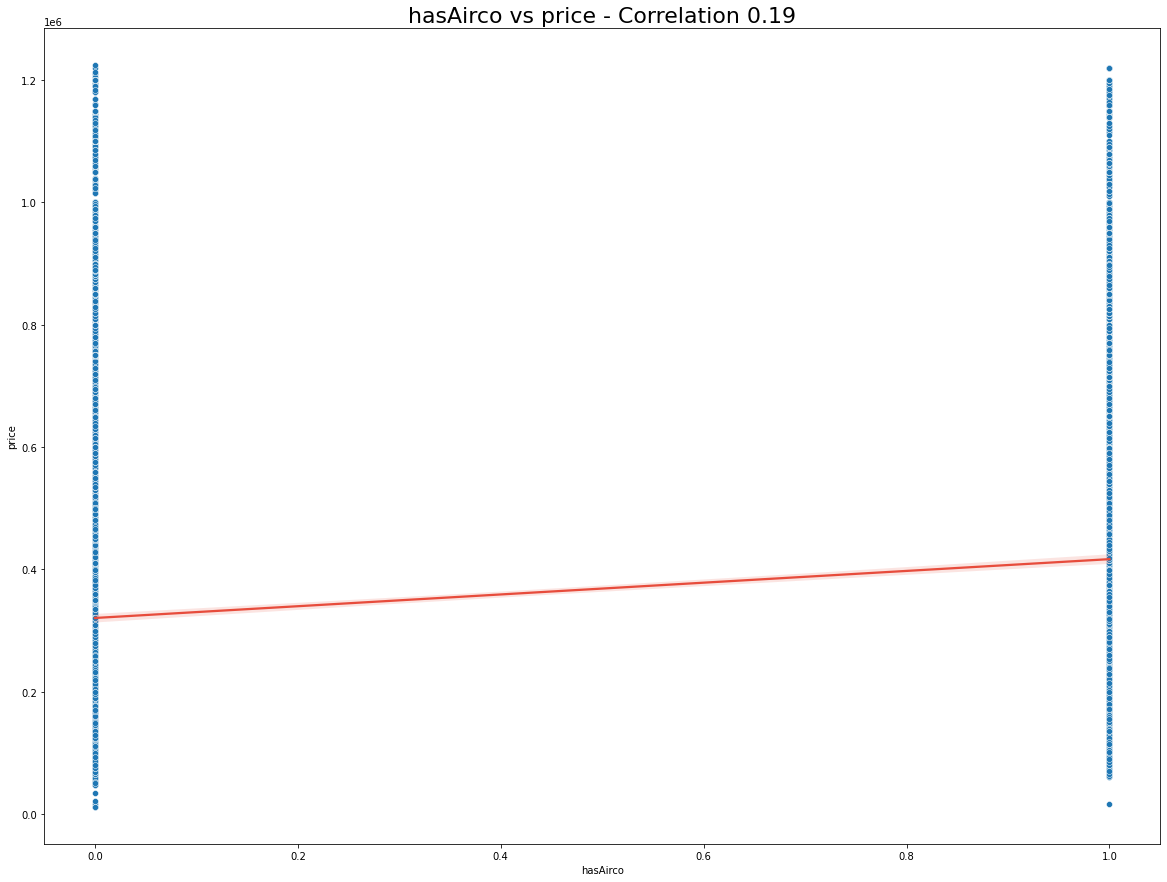

In [66]:
vf.regplot_correlations(df,'hasAirco','price',hue=False)

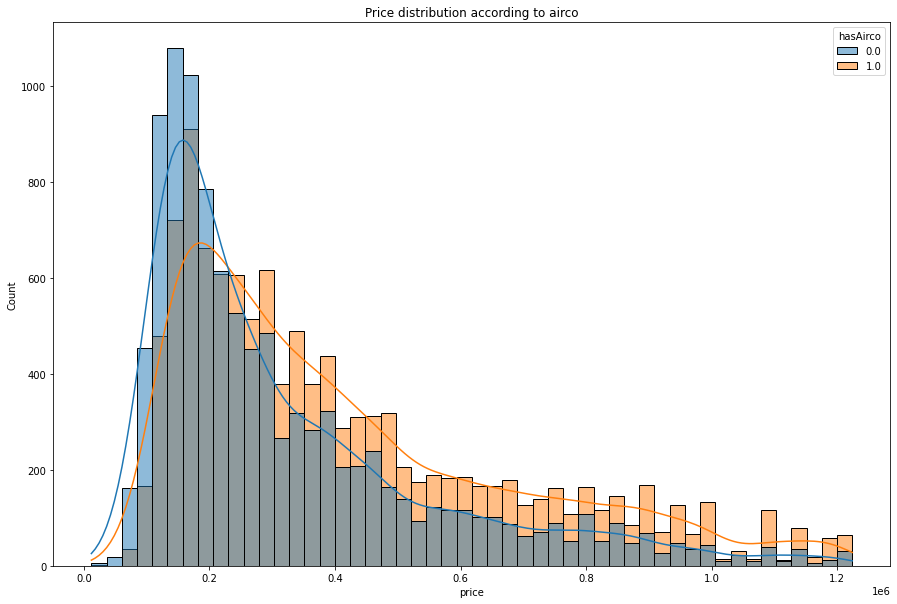

In [67]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to airco')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasAirco');

### **Between price and hasGarden**



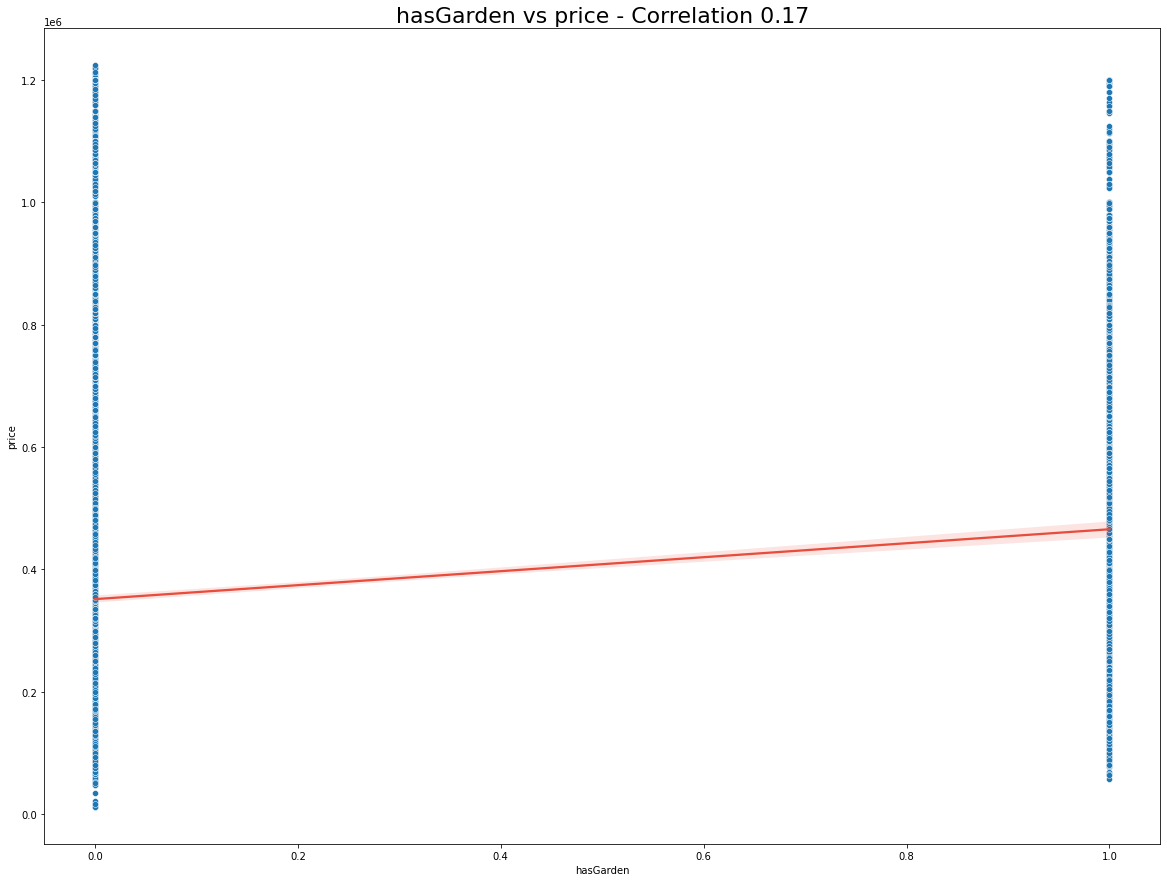

In [68]:
vf.regplot_correlations(df,'hasGarden','price',hue=False)

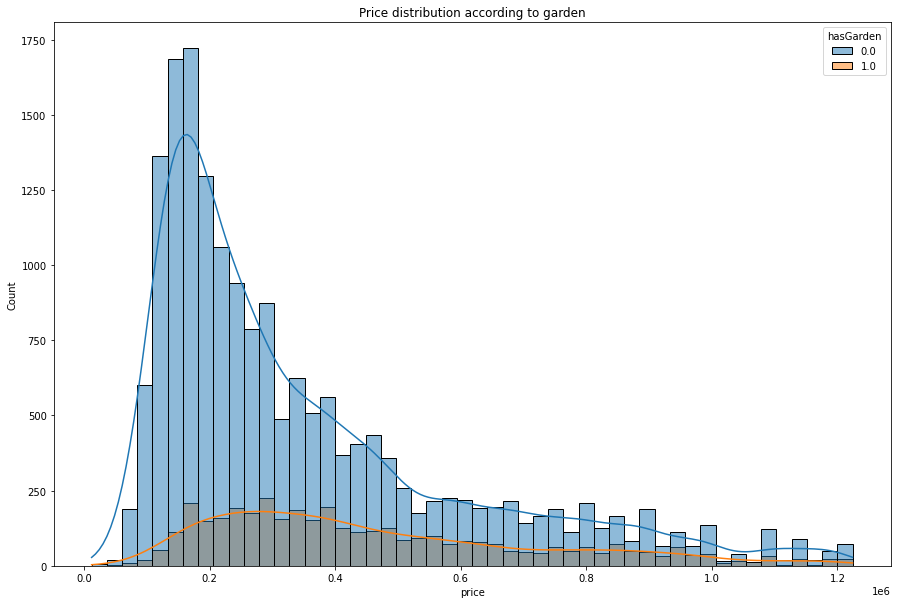

In [69]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to garden')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasGarden');

### **Between price and hasSwimmingPool**



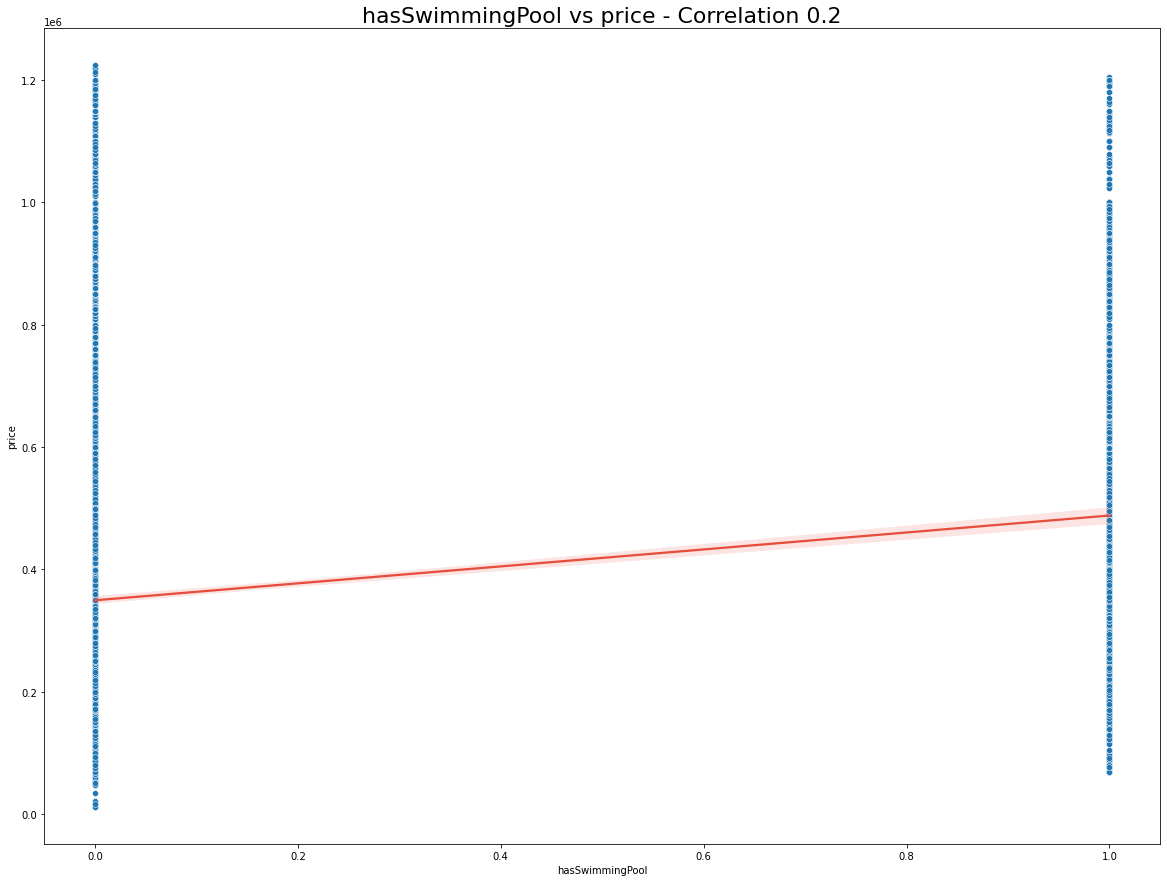

In [70]:
vf.regplot_correlations(df,'hasSwimmingPool','price',hue=False)

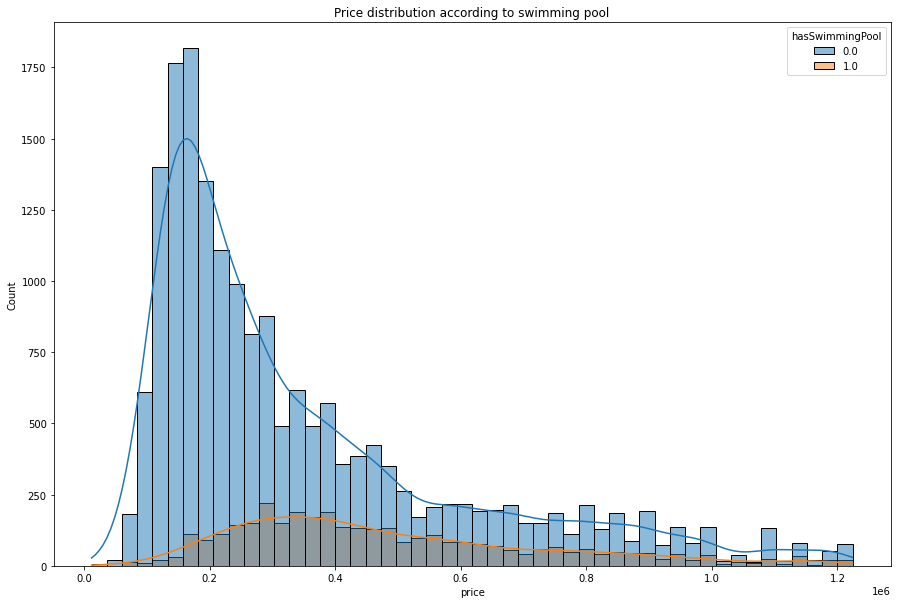

In [71]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to swimming pool')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasSwimmingPool');

### Between price and floor


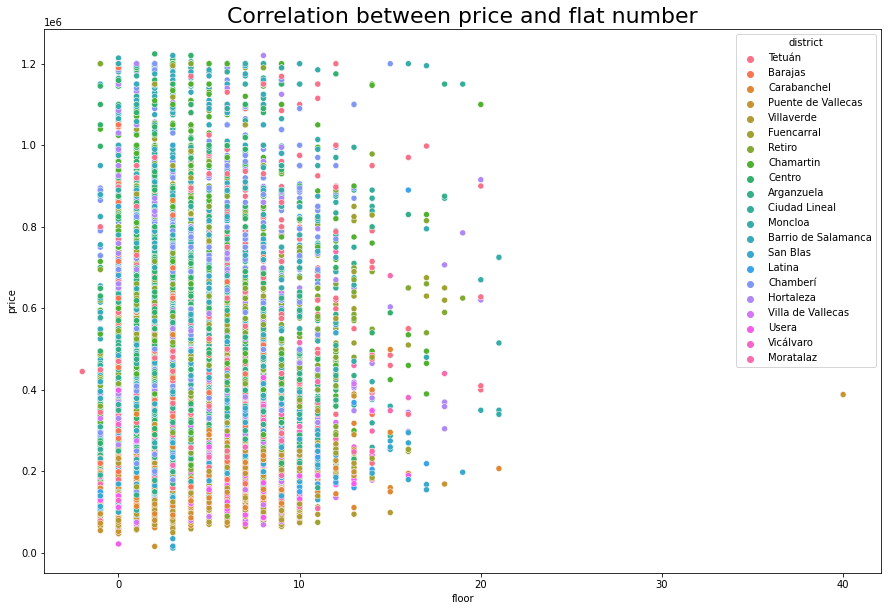

In [72]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

df_to_plot = df[df['propertyType'] != 'chalets'].copy()
df_to_plot['floor'] = df_to_plot['floor'].astype(int)

ax.set_title('Correlation between price and flat number',fontsize=22)
# removing chalets as this feature doesn't apply to them
sns.scatterplot(data = df_to_plot, x='floor',y='price',hue='district',ax=ax);

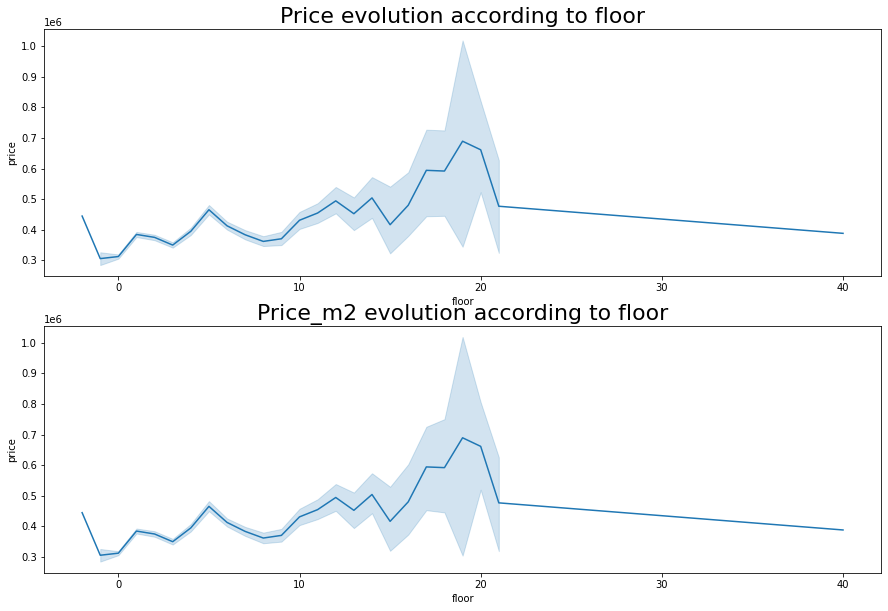

In [73]:
fig, axes = plt.subplots(2,1,figsize=(15,10))

axes[0].set_title('Price evolution according to floor',fontsize=22)
sns.lineplot(data=df_to_plot.sort_values('floor'), x='floor', y='price', ax=axes[0])

axes[1].set_title('Price_m2 evolution according to floor',fontsize=22)
sns.lineplot(data=df_to_plot.sort_values('floor'), x='floor', y='price', ax=axes[1]);

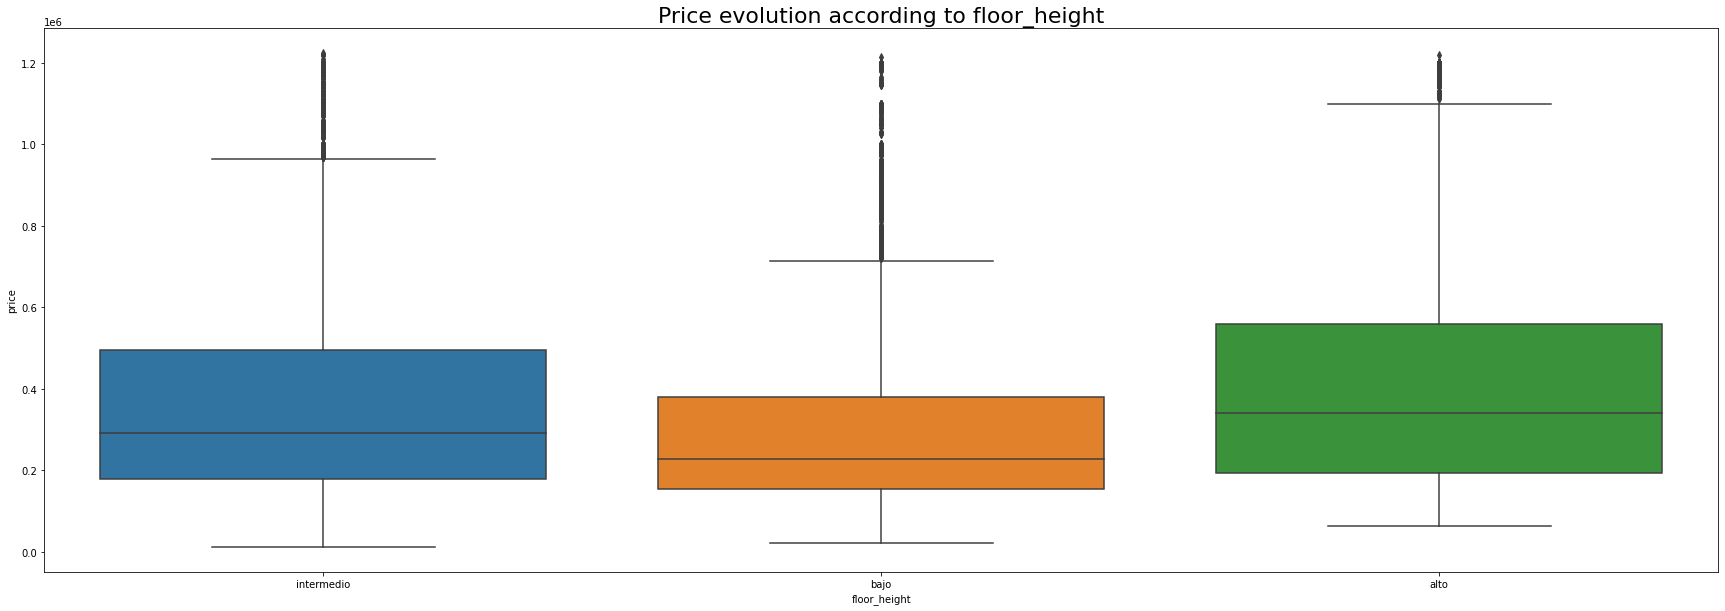

In [74]:
df['floor_height'] = df['floor']
df.loc[(df['floor'].astype(int) > 0) & (df['floor_height'].astype(int) < 5), 'floor_height'] = 'intermedio'
df.loc[(df['floor'].astype(int) >= 5), 'floor_height'] = 'alto'
df.loc[(df['floor'].astype(int) <= 0), 'floor_height'] = 'bajo'


fig, ax = plt.subplots(1, 1, figsize=(30,10))
ax.set_title('Price evolution according to floor_height', fontsize = 22)
sns.boxplot(data=df, x='floor_height', y='price')

In [75]:
del df_to_plot

### Between price and hasHeatingInfo

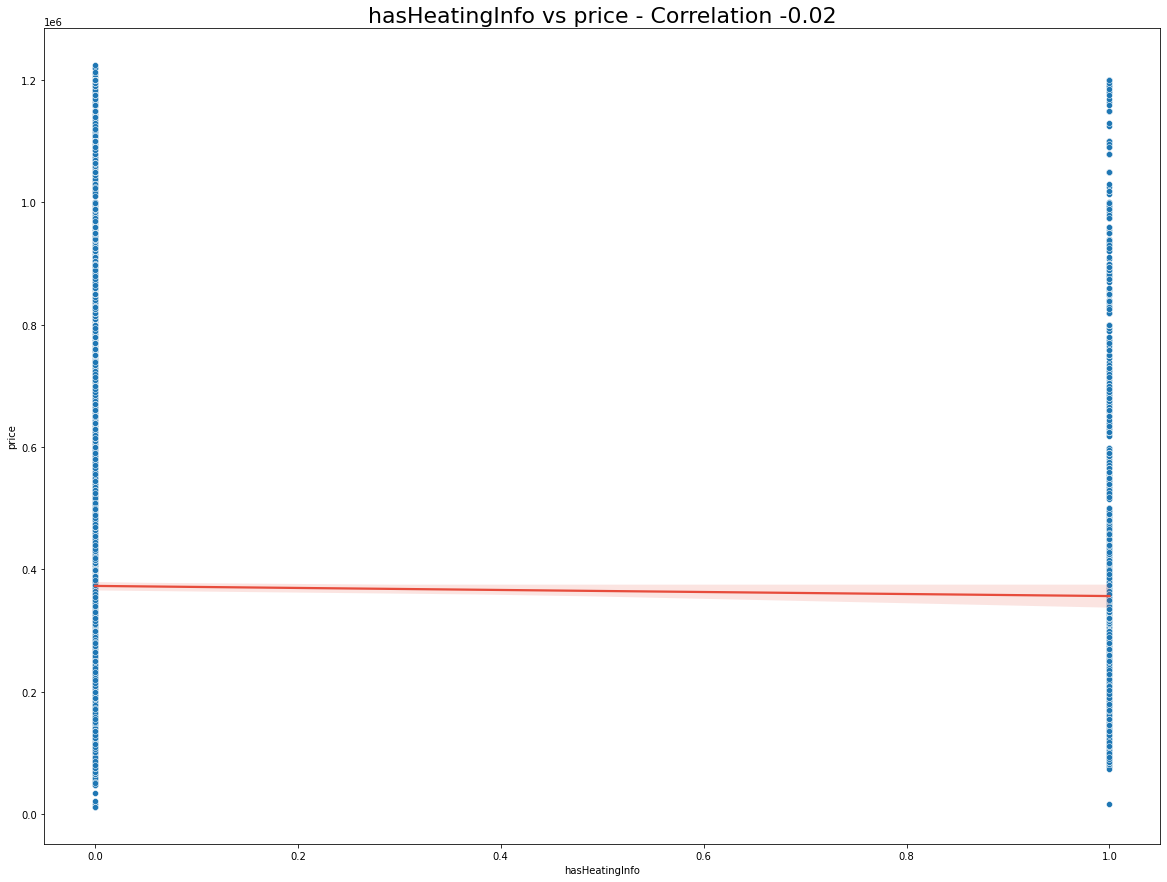

In [76]:
vf.regplot_correlations(df,'hasHeatingInfo','price',hue=False)

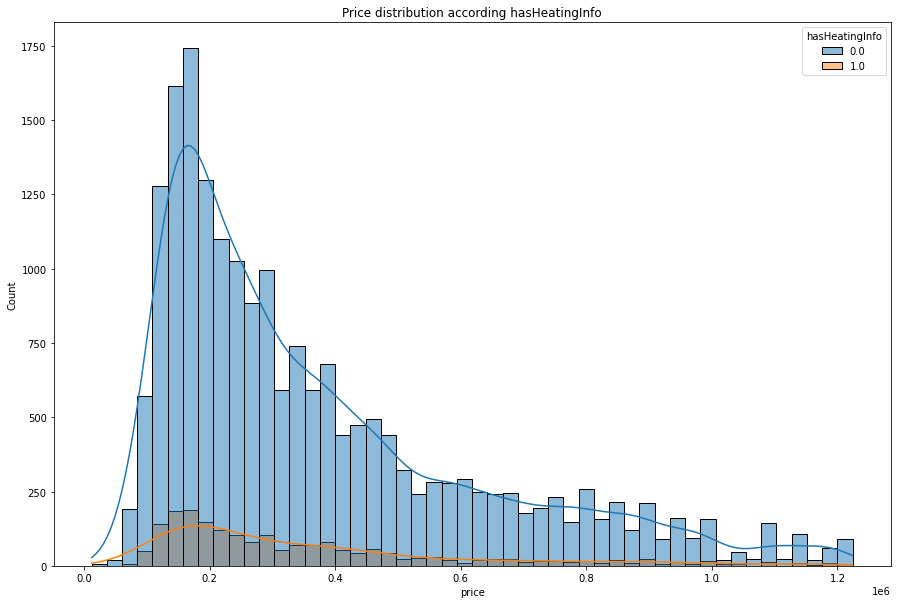

In [77]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according hasHeatingInfo')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='hasHeatingInfo');

In [78]:
print(f"Consider that only {df['hasHeatingInfo'].mean().round(4)*100}% of records have heating info.")

Consider that only 9.09% of records have heating info.


### Between price and isNeedsRenovating

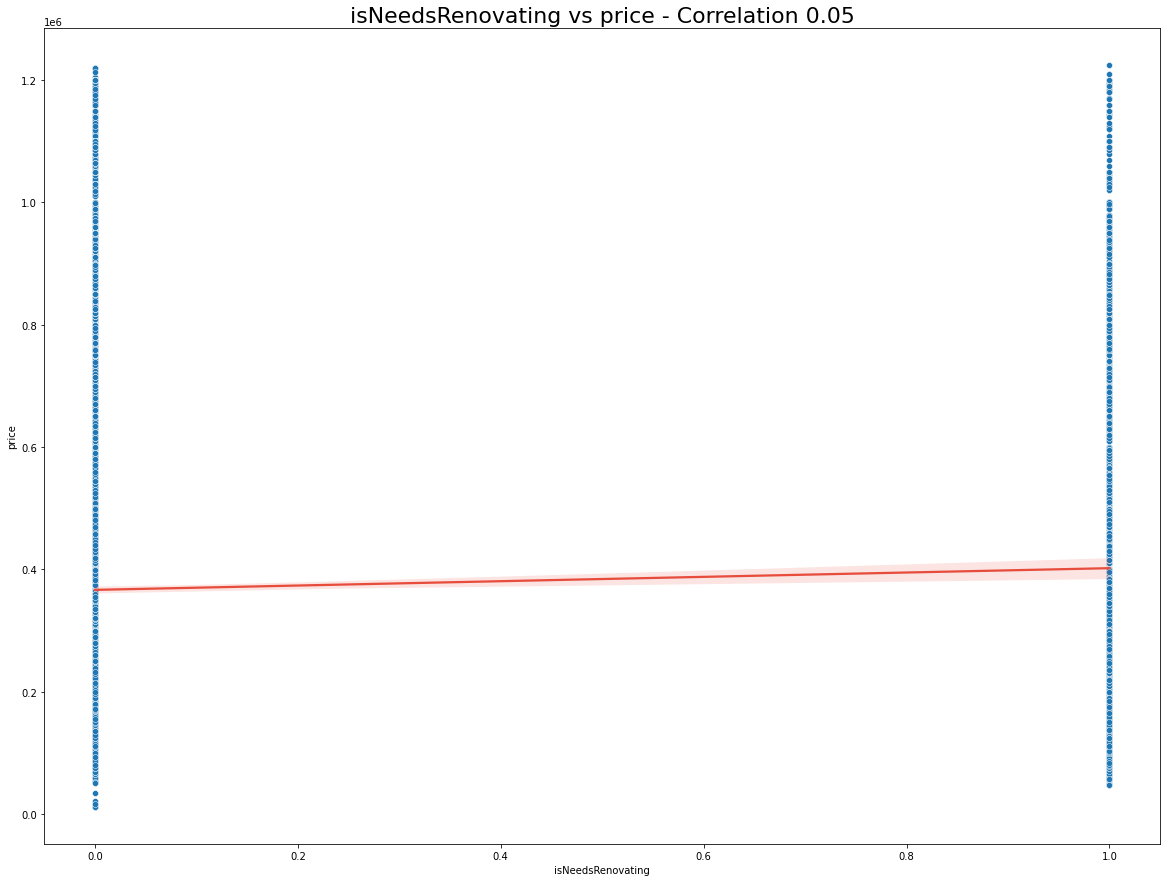

In [79]:
vf.regplot_correlations(df,'isNeedsRenovating','price',hue=False)

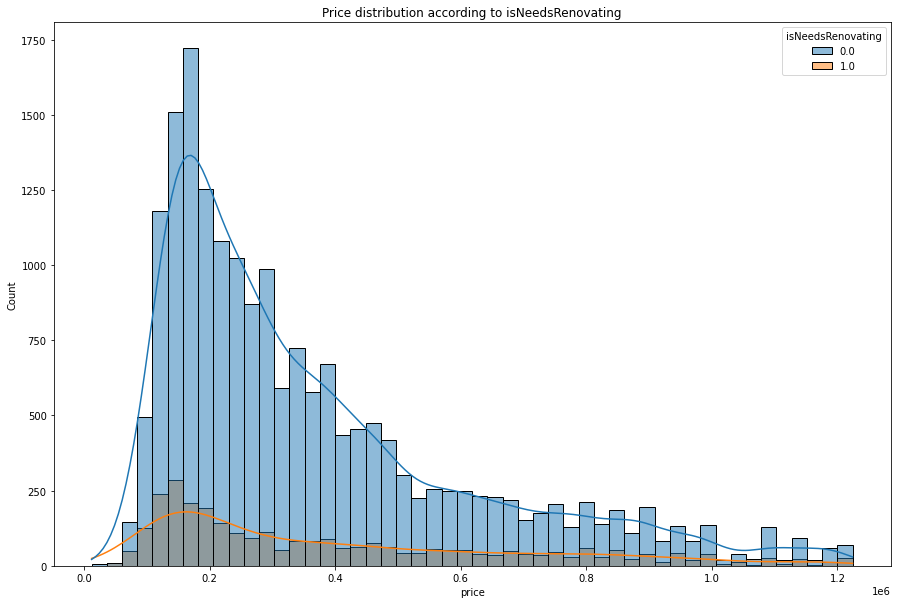

In [80]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to isNeedsRenovating')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='isNeedsRenovating');

### Between price and isGoodCondition

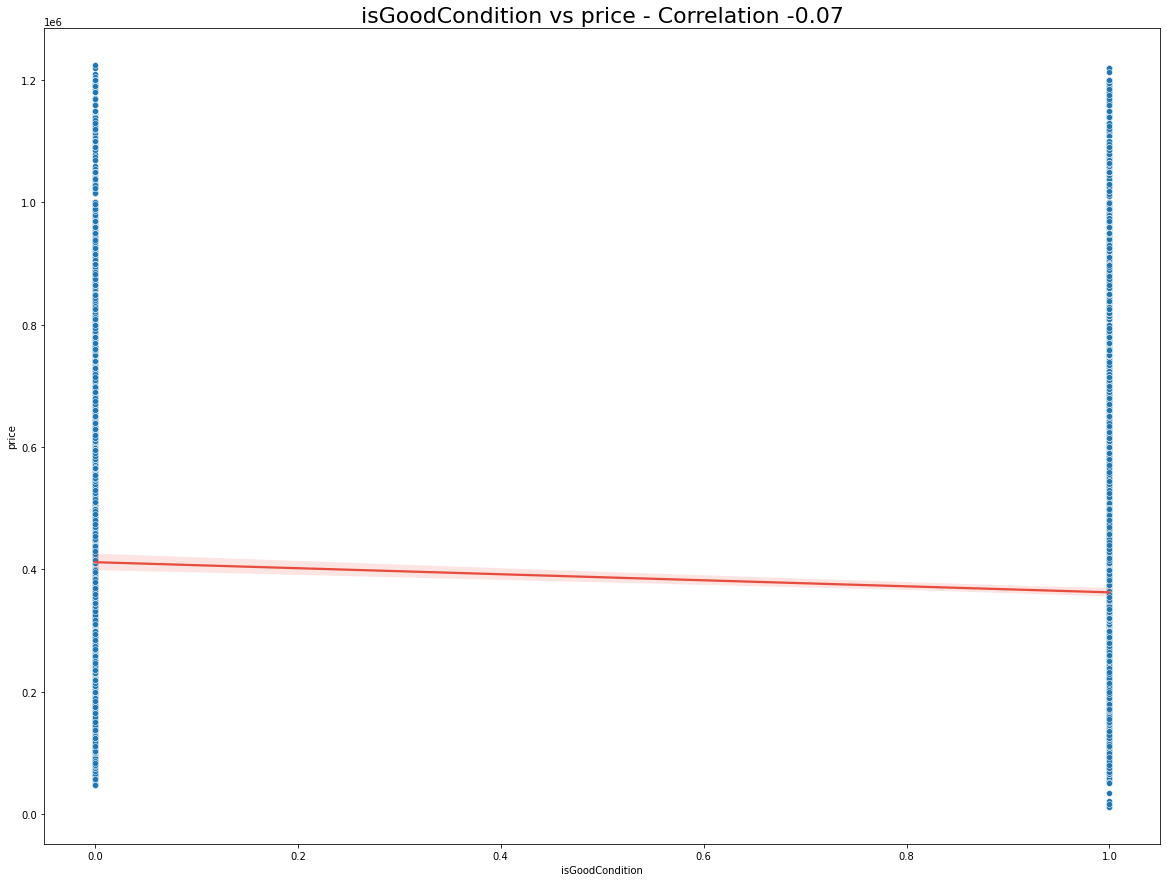

In [81]:
vf.regplot_correlations(df,'isGoodCondition','price',hue=False)

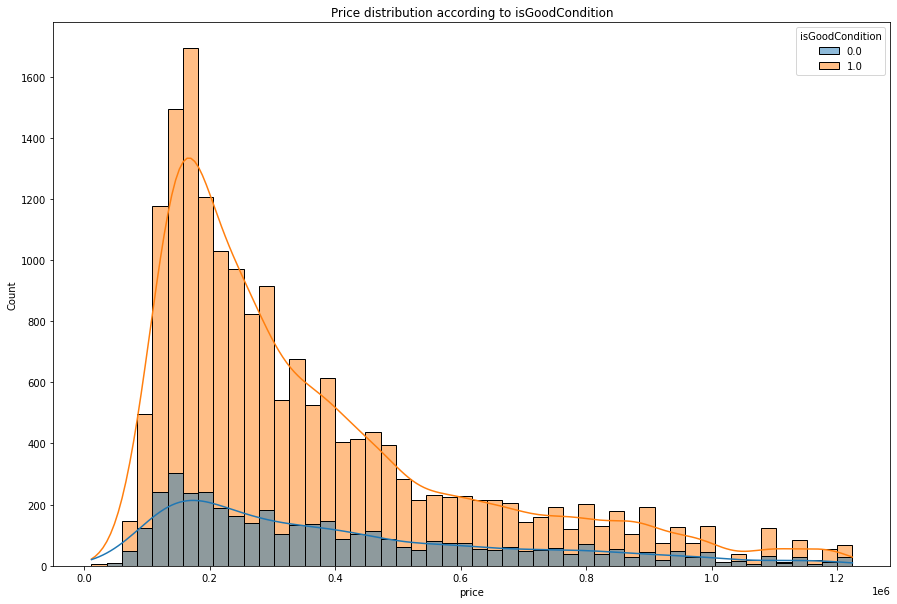

In [82]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to isGoodCondition')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='isGoodCondition');

### Between price and isNewDevelopment

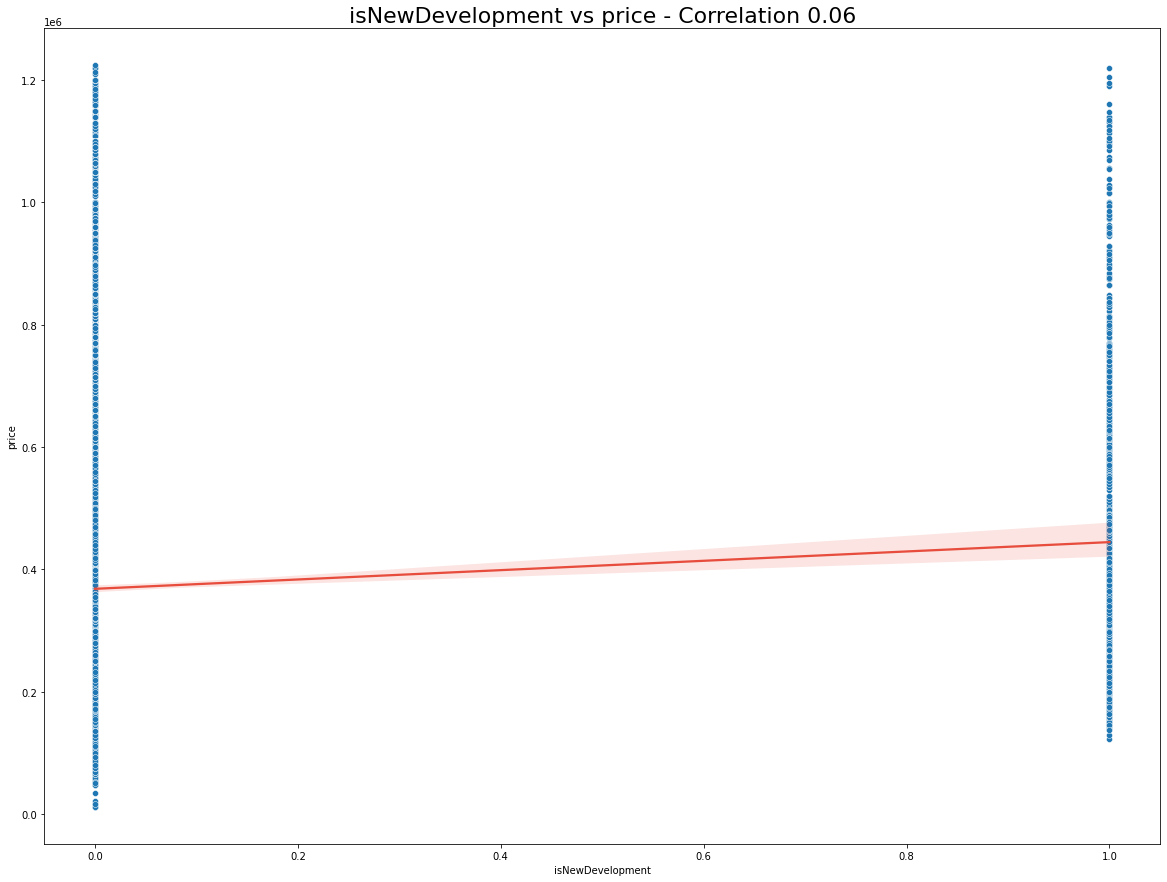

In [83]:
vf.regplot_correlations(df,'isNewDevelopment','price',hue=False)

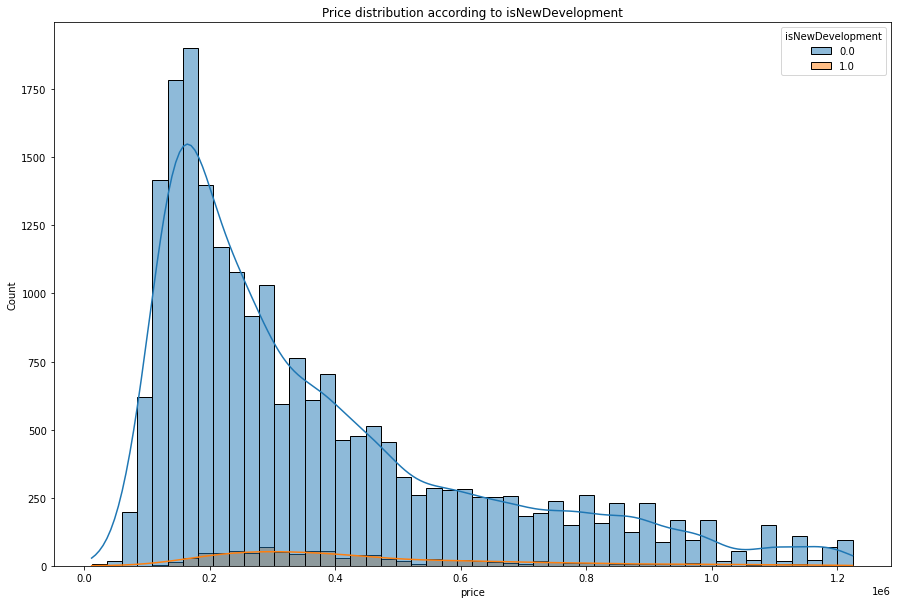

In [84]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to isNewDevelopment')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='isNewDevelopment');

In [85]:
df['propertyCondition'] = 0
df.loc[df['isGoodCondition']==1, 'propertyCondition'] = 1
df.loc[df['isNewDevelopment']==1, 'propertyCondition'] = 2

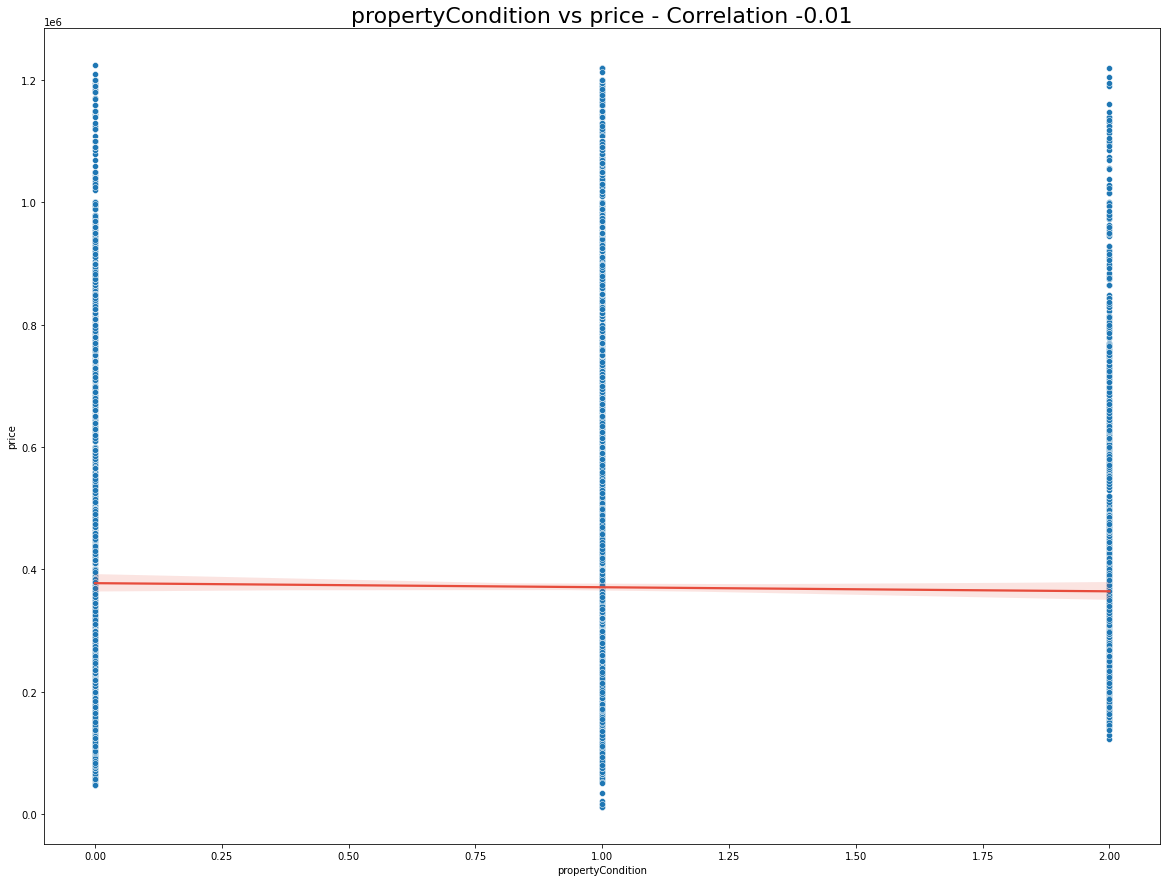

In [86]:
vf.regplot_correlations(df,'propertyCondition','price',hue=False)

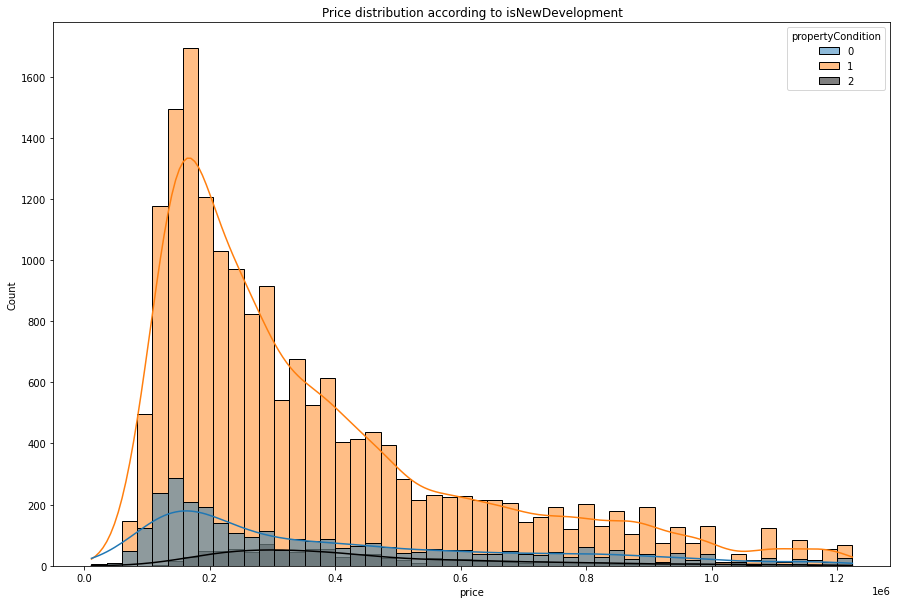

In [87]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.set_title('Price distribution according to isNewDevelopment')
sns.histplot(data = df.sort_values('price'), x = 'price' , bins = 50, kde=True, ax=ax, hue='propertyCondition', palette=["C0", "C1", "k"]);

## Correlation analysis of numerical features: conclusions

Most binary features work as expected: price rises if the feature's value is 1. Still there are some weird behaviours such as isGoodCondition for which the price decrease if its value is 1.
Plus, it looks like hasLift really has an important impact on pricing but this has to be limited somehow to properties that are not chalets, since it has no meaning for those.

Another weird behaviour is shown by the isNeedsRenovating feature that should work the opposite way: the price should decrease when such feature is set to 1. As a matter of fact, this feature showed an unexpected positive correlation with the price.

hasHeatingInfo, on the other hand, shows us that less than 10% of the records have heating information available, which is a very small number that makes this feature lose importance.

Now about the non-binary features. We can confirm the correlation between price and size, altough it needs further analysis based on districts, and we can see how bathNumber and roomNumber are correlated with price too but so they are with size itself, although bathNumber's correlation was lesser. Floor number, on the other hand, seems not to be very correlated with price, as the advantage or disadvantage of a specific floor might depend on other factors, such as if the property is bright or not, that cannot simply be inferred by the floor number.

## Correlation analysis: categorical features

### Between price and districts

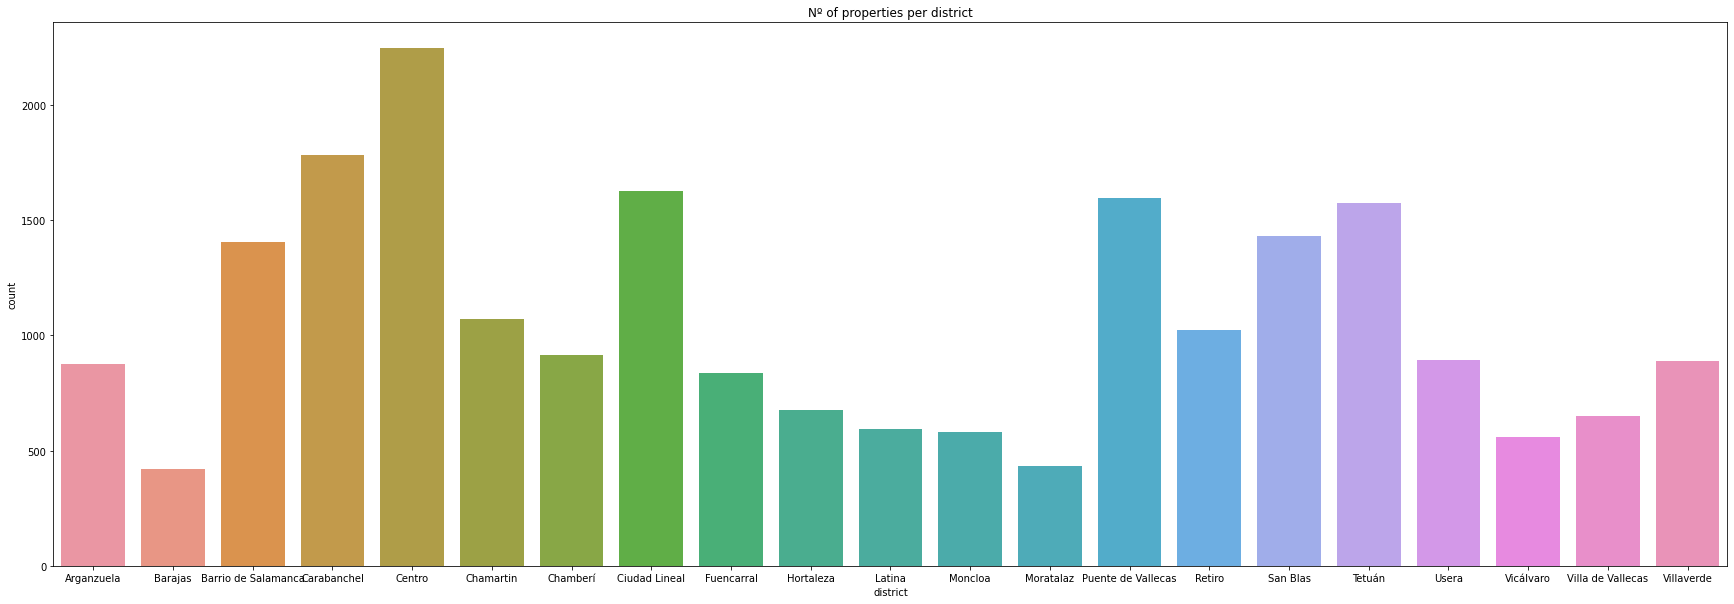

In [88]:
fig, ax = plt.subplots(1,1,figsize = (30,10))
ax.set_title('Nº of properties per district' )
sns.countplot(data=df.sort_values('district'), x="district",ax=ax);

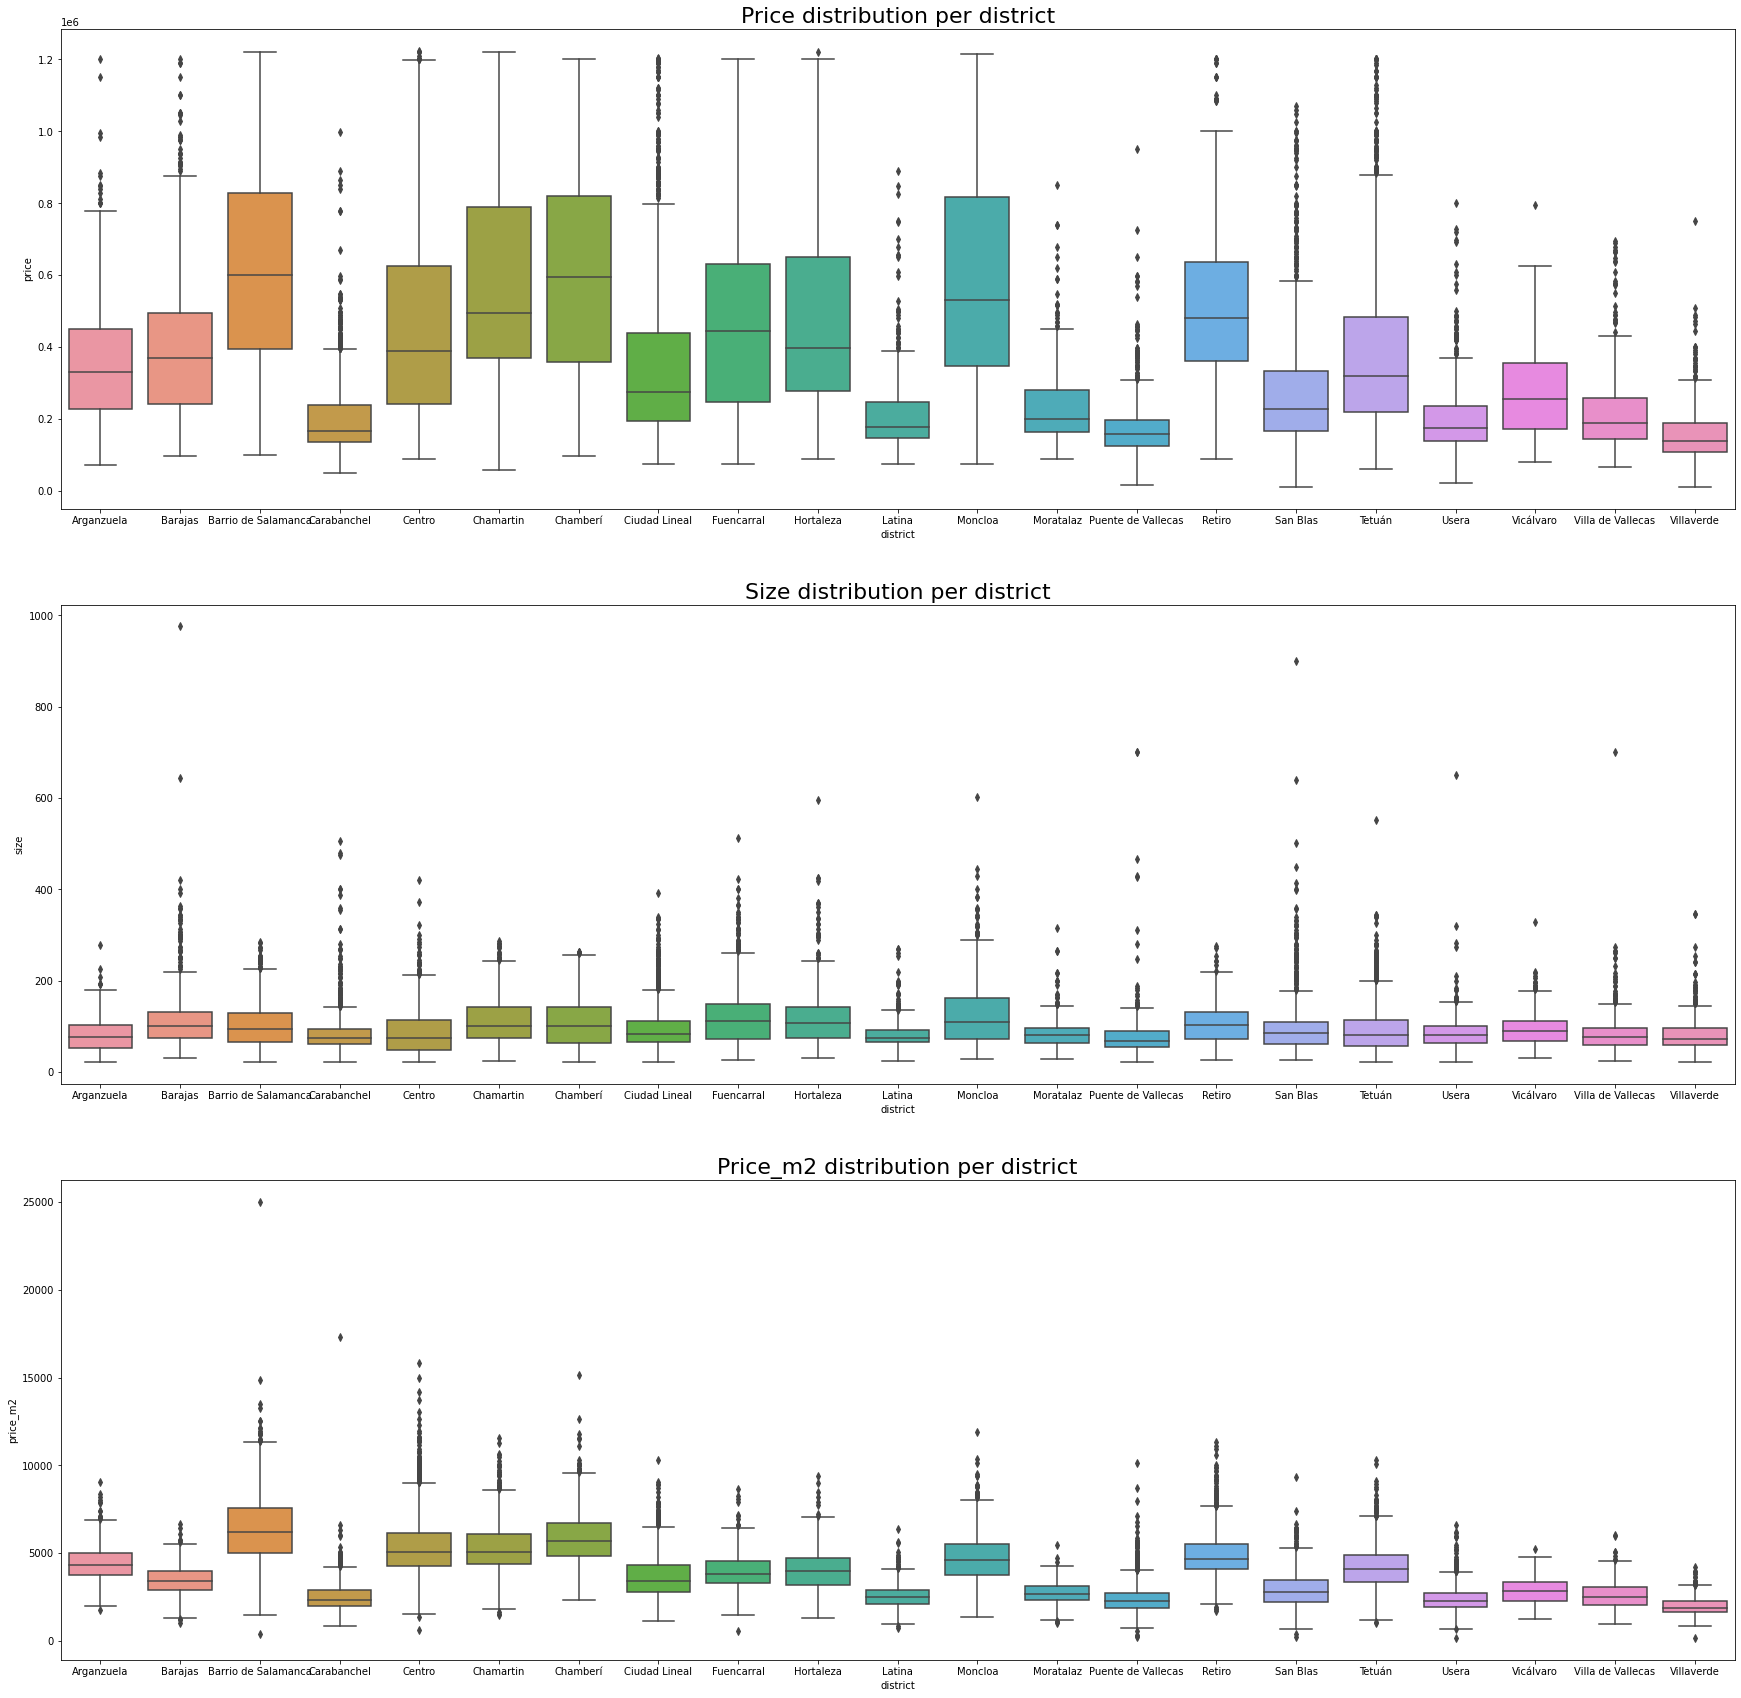

In [89]:
fig, axes = plt.subplots(3, 1, figsize = (30,30))
axes[0].set_title('Price distribution per district', fontsize = 22)
sns.boxplot(data = df.sort_values('district'), x = 'district', y = 'price', ax = axes[0])
axes[1].set_title('Size distribution per district', fontsize = 22)
sns.boxplot(data = df.sort_values('district'), x = 'district', y = 'size', ax = axes[1])
axes[2].set_title('Price_m2 distribution per district', fontsize = 22)
sns.boxplot(data = df.sort_values('district'), x = 'district', y = 'price_m2', ax = axes[2]);

When we see the price boxplot and the size boxplot we can't really see it, but when observing the price_m2 boxplot it starts to become clear: there are some districts that stack up for having a higher price_m2, and those are: Salamanca, Chamberí, Centro, Chamartín, Retiro and Moncloa.

In [90]:
df['price_m2'].describe()

count    22078.000000
mean      3904.494796
std       1781.199949
min        167.610000
25%       2513.352500
50%       3605.350000
75%       4904.110000
max      25000.000000
Name: price_m2, dtype: float64

In [91]:
bottom_75 = df[df['price_m2'] <= df['price_m2'].quantile(0.75)]
top_25 = df[df['price_m2'] > df['price_m2'].quantile(0.75)]

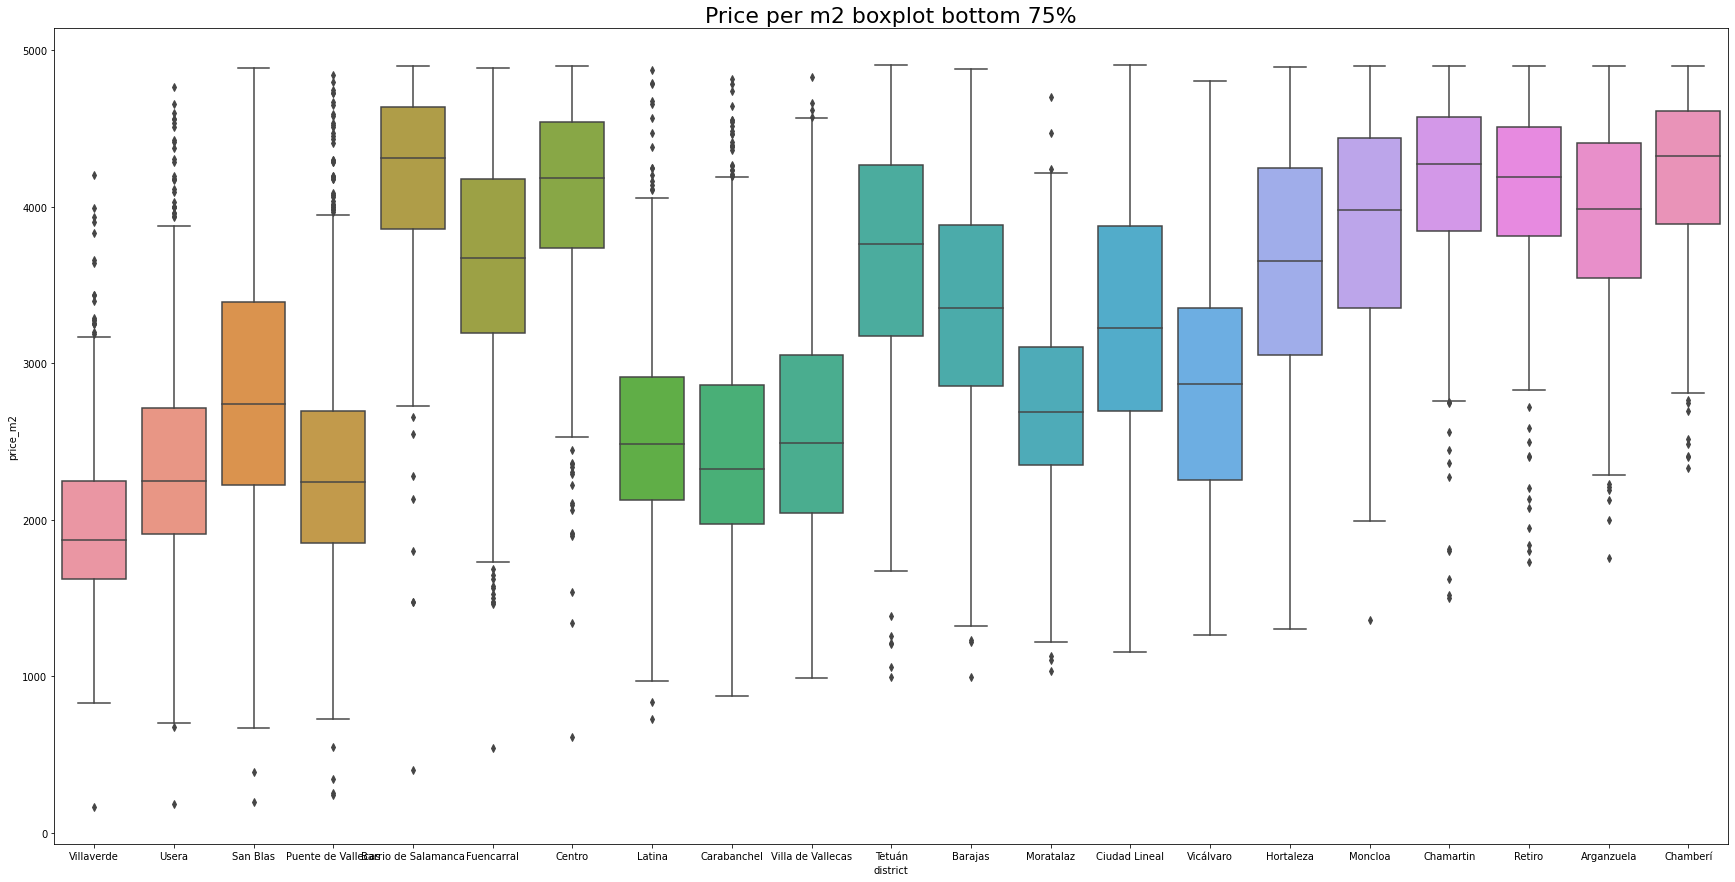

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(30,15))
ax.set_title('Price per m2 boxplot bottom 75%', fontsize = 22)
sns.boxplot(data=bottom_75.sort_values('price_m2'), x='district', y='price_m2');

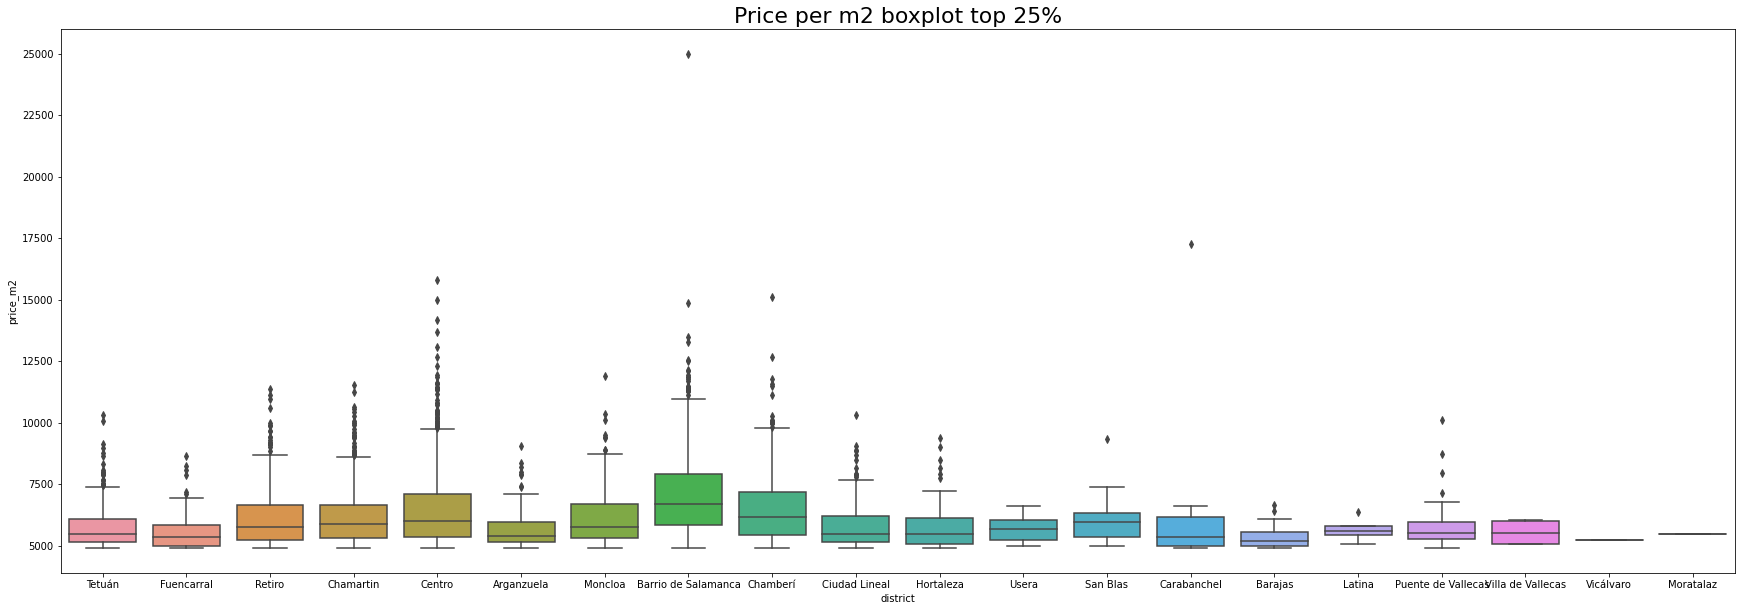

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(30,10))
ax.set_title('Price per m2 boxplot top 25%', fontsize = 22)
sns.boxplot(data=top_25, x='district', y='price_m2')

It is quite clear that the correlation between the price and the district exists although it is not linear. There are some districts like villaverde where you just cannot find properties with a high price_m2, but there are also others, e.g. Barrio de Salamanca, in which you can find all kind of properties with all kind of prices per square meter.

### Between price and energyCertification

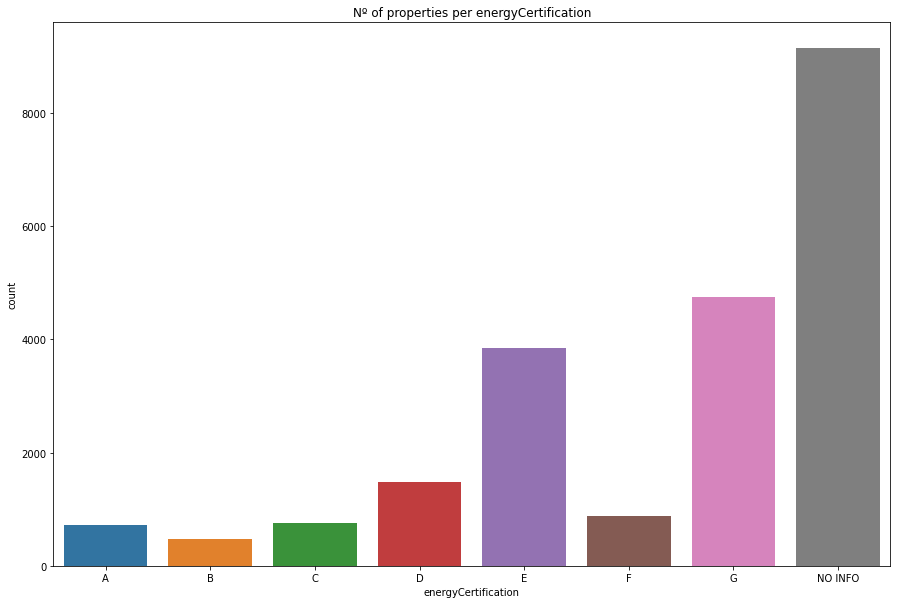

In [94]:
fig, ax = plt.subplots(1,1,figsize = (15,10))
ax.set_title('Nº of properties per energyCertification' )
sns.countplot(data=df.sort_values('energyCertification'), x="energyCertification",ax=ax);

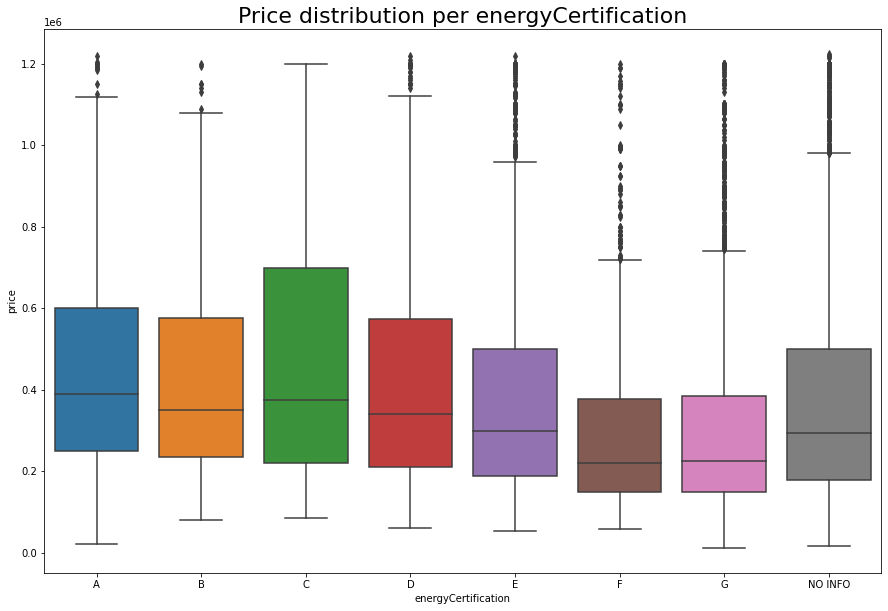

In [95]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
ax.set_title('Price distribution per energyCertification', fontsize = 22)
sns.boxplot(data = df.sort_values('energyCertification'), x = 'energyCertification', y = 'price', ax = ax);

In [96]:
pd.DataFrame([df['energyCertification'].value_counts(),(df['energyCertification'].value_counts(normalize=True)*100).round(2).astype(str)+'%']).T

energyCertification energyCertification
NO INFO                9148              41.43%
G                      4755              21.54%
E                      3857              17.47%
D                      1478               6.69%
F                       879               3.98%
C                       760               3.44%
A                       723               3.27%
B                       478               2.17%

### Between price and heatingType

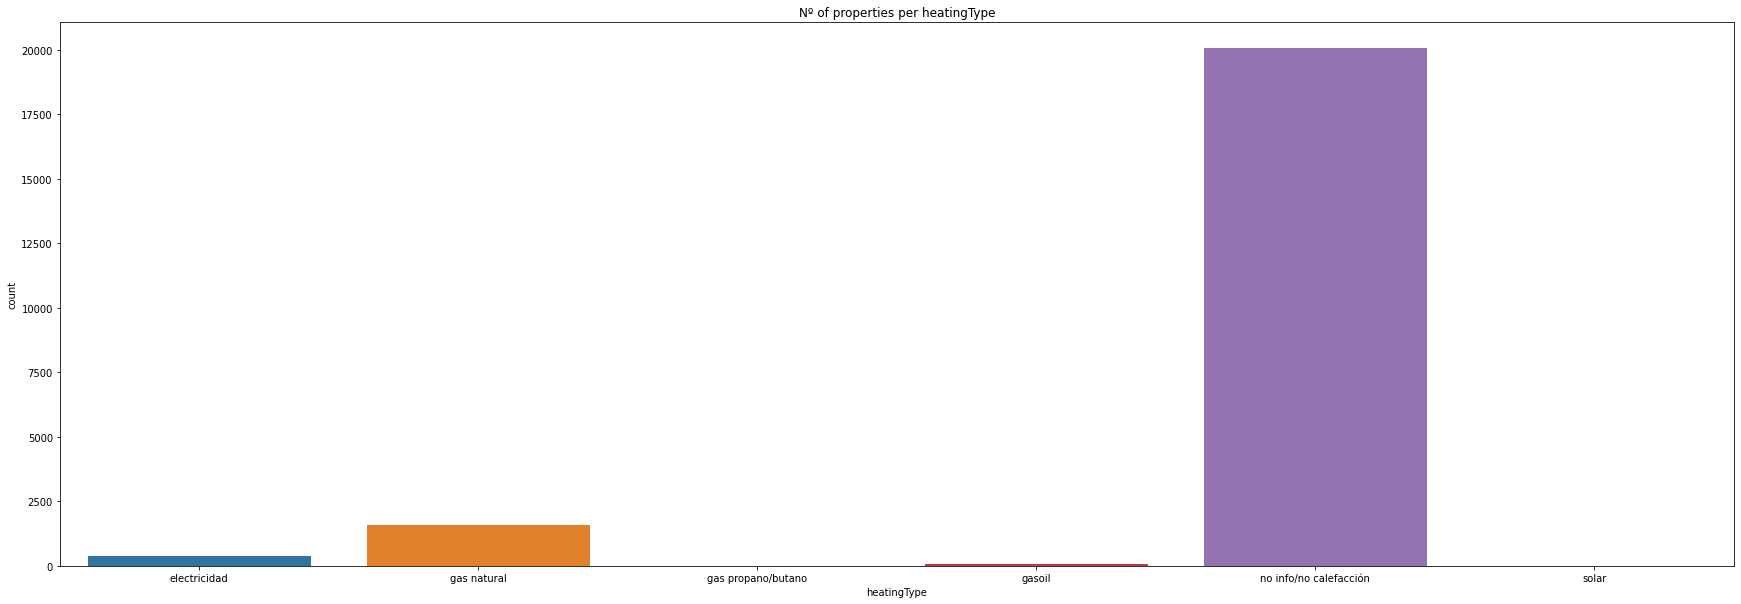

In [97]:
fig, ax = plt.subplots(1,1,figsize = (30,10))
ax.set_title('Nº of properties per heatingType' )
sns.countplot(data=df.sort_values('heatingType'), x="heatingType",ax=ax);

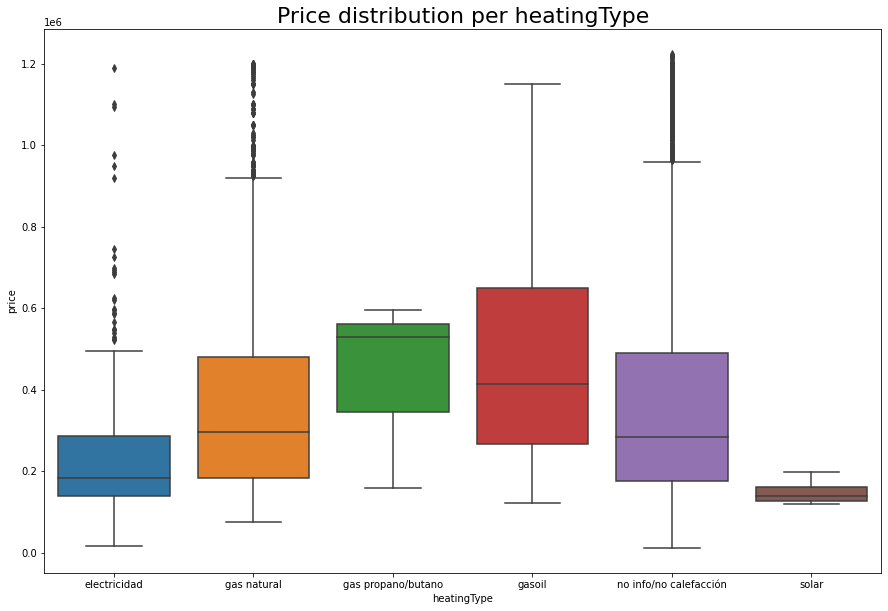

In [98]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))
ax.set_title('Price distribution per heatingType', fontsize = 22)
sns.boxplot(data = df.sort_values('heatingType'), x = 'heatingType', y = 'price', ax = ax);

In [99]:
pd.DataFrame([df['heatingType'].value_counts(),(df['heatingType'].value_counts(normalize=True)*100).round(2).astype(str)+'%']).T

heatingType heatingType
no info/no calefacción       20071      90.91%
gas natural                   1567        7.1%
electricidad                   370       1.68%
gasoil                          63       0.29%
solar                            4       0.02%
gas propano/butano               3       0.01%

### Between price and propertyType

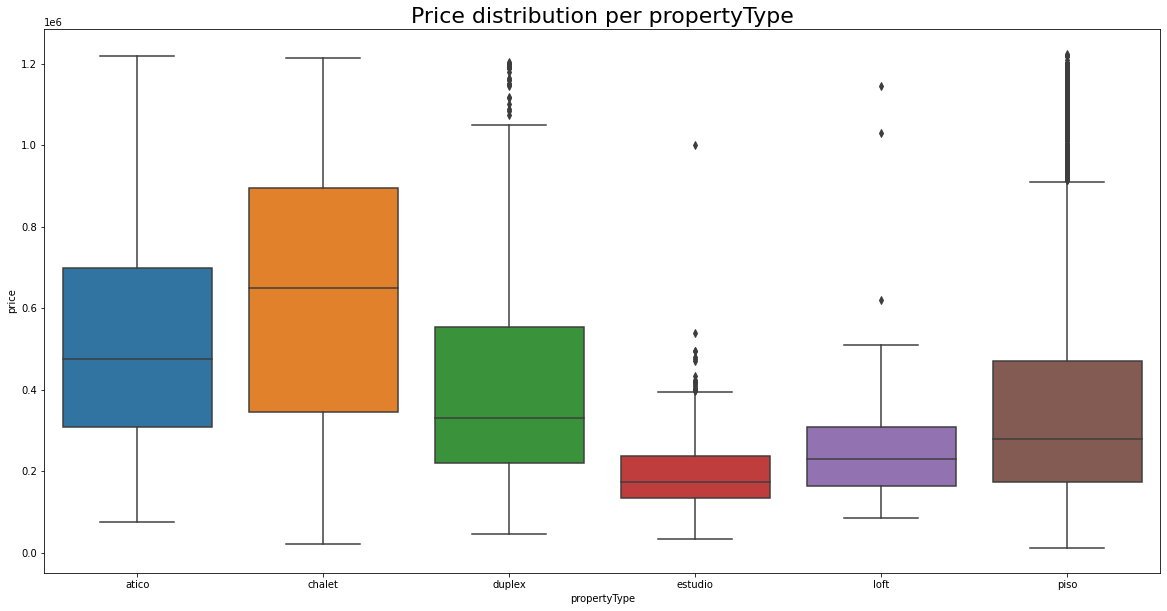

In [100]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.set_title('Price distribution per propertyType', fontsize = 22)
sns.boxplot(data=df.sort_values('propertyType'), x="propertyType",y='price',ax=ax);

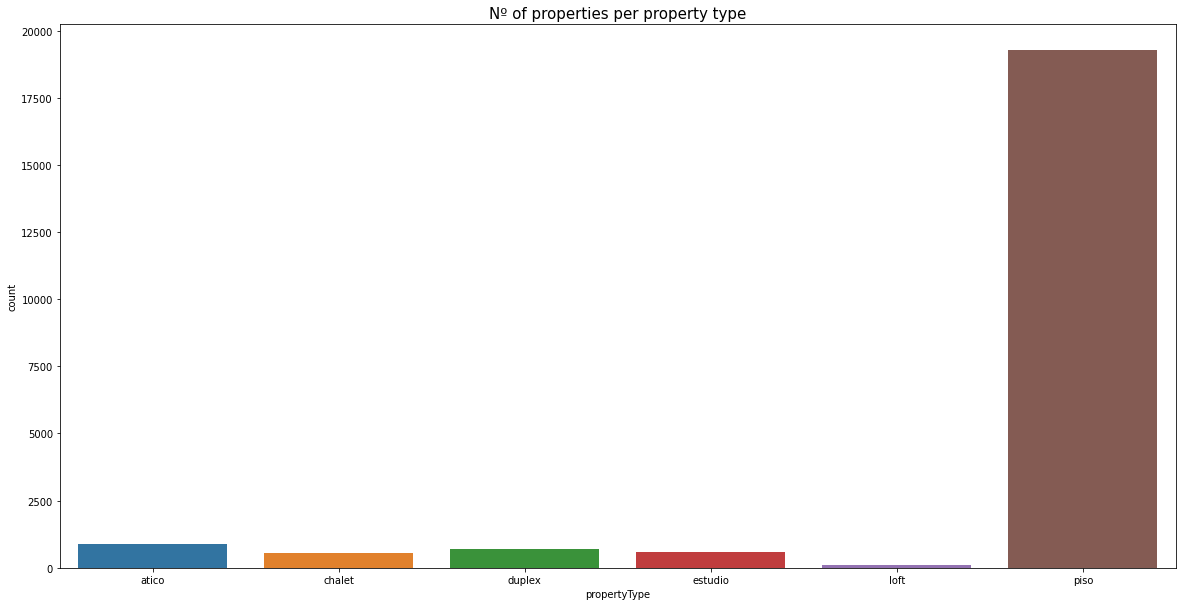

In [101]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
ax.set_title('Nº of properties per property type',fontsize=15)
sns.countplot(data=df.sort_values('propertyType'), x='propertyType',ax=ax);

In [102]:
df['propertyType'].value_counts()

piso       19272
atico        876
duplex       711
estudio      588
chalet       534
loft          97
Name: propertyType, dtype: int64

## Correlation analysis of categorical features: conclusions

It looks like price has a positive non-linear correlation with the district feature, which makes it important for the model. The property type shows an even easier-to-explain correlation: Chalets tend to have a higher price while penthouses (atico) and duplexes tend to have a price that is higher than flats, lofts and studio flats (estudio), the latter being the cheapest ones as they are also the smallest in size.

On the other hand we can see that energyCertificate and heatingType are features lacking significance as we have information respectively about the 40% and 9% of all the properties.

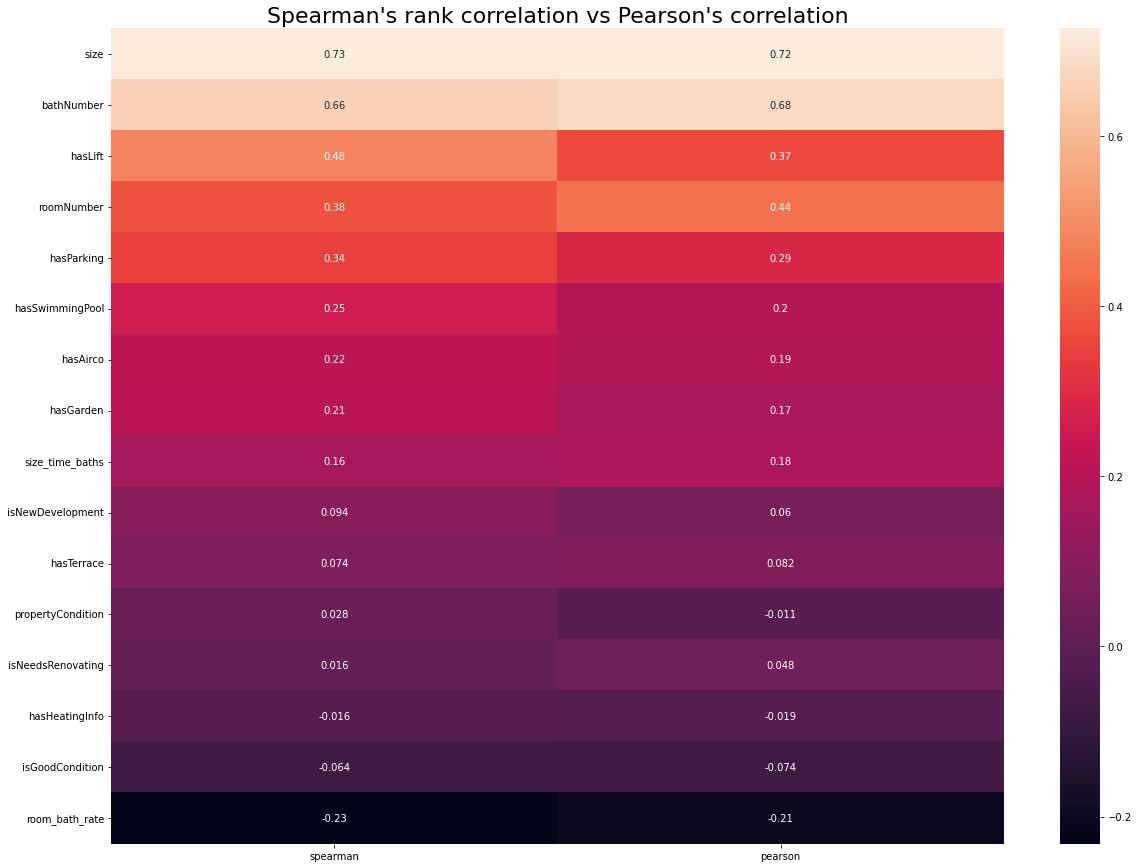

In [103]:
corr_with_price = df.corr('spearman')[['price']].sort_values('price',ascending=False)
corr_with_price = corr_with_price.drop([index for index in corr_with_price.index if 'price' in index])
corr_with_price.columns = ['spearman']
corr_with_price['pearson'] = df.corr()[['price']].drop([index for index in corr_with_price.index if 'price' in index])
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_title('Spearman\'s rank correlation vs Pearson\'s correlation', fontsize=22)
sns.heatmap(corr_with_price, annot=True, ax=ax);

## **Map visualizations**

Simply in order to get a better idea of the distribution of some of the features available, we have extracted the map from the Ayuntamiento de Madrid website.

In [104]:
vf.plot_choropletic_map(df)

In the map below we see the number of properties we have in each district, making it clear that most of them are in Centro (darker).

In [105]:
vf.plot_choropletic_map(df,'id')

The following map colours the districts according to average property prices, the most expensive being Barrio de Salamanca, Chamartín, Chamberí and Moncloa.

In [106]:
vf.plot_choropletic_map(df,'price')

The following map colours the districts according to the average size of the properties, the largest being in Moncloa and Fuencarral.

In [107]:
vf.plot_choropletic_map(df,'size')

# **Saving datasets**

In [108]:
datasets_folder = '/content/drive/MyDrive/Kschool_TFM/datasets'
df.to_csv(f'{datasets_folder}{os.sep}dataset-03-AV.csv',index=False)